<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
 

<strong>Objectives:</strong>
+ Variables significativas para el clustering de productos
    
    
<strong>Conclusions:</strong>

   
</div>

In [1]:
import os, sys

def get_root_path(search_word):
    """ Búsqueda hacia atrás de un directorio con nombre search_word. """
    cwd = os.getcwd()
    while str(os.getcwd()).split('/')[-1] != search_word:
        os.chdir("..")
        cwd = os.getcwd()
    return cwd

ROOT_DIR = get_root_path('TFM_StockForecast')

sys.path.insert(0, ROOT_DIR) # Poner en el primer lugar del PATH (evitar paquetes con mismos nombres en otros directorios)

In [2]:
import pandas as pd
import numpy as np
from src.load_data import load_clustering_data
from src.trainer_clustering import get_pca_components, plot_cluster, train_DBSCAN, search_best


In [3]:
df = load_clustering_data()
df.head()

===================  LOAD DATASET stock ====================
Reading CSV in data/raw/03_TablaStock.csv...
=============  CLEAN CSV  ==============
Set columns to lowcase.
Sort values by date.
Dropped duplicates. Rows dropped: 628.
============  CLEAN STOCK  =============
Dropped rows with data from products with no stock data or out-of-date (descatalogados). Rows dropped: 1784
[WARNING] Number of dates missings:                                83
[WARNING] Number of dates missings (droping sundays and festivos): 63
[WARNING] Stock data with different units for same product & data. Rows: 12666
Dataset stock loaded. Shape: (25518, 3)

===================  LOAD DATASET ventas ===================
Reading CSV in data/raw/01_TablaVentas.csv...
=============  CLEAN CSV  ==============
Set columns to lowcase.
Sort values by date.
Dropped duplicates. Rows dropped: 0.
============  CLEAN VENTAS  ============
Dropped rows with data from products with no stock data or out-of-date (descatalogados). 

/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/create_variables.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['missing'] = (ts.udsstock.isna()) * 1


Getting datetime variables: weekday, quarter, month, weekofyear
Getting deltaStock as the difference of Stock from today to tomorrow


/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/create_variables.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_data['deltaStock'] = prod_data.udsstock.diff(periods=-1)


Getting rolling windows of last 5 days by product and weekday for column udsventa


/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/create_variables.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_data[colname] = day_data[col].rolling(4, win_type='triang', min_periods=1).mean()


Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Assingning nulls in udsVenta as 0 [TEMPORARY]
Dropping dates from 23 to 26 March 20
================  BUILD VENTAS BY PRODUCTO  ================
Dataset ventas by product builded



producto  fecha_min  fecha_max  frecuencia  intermitencia  venta_min  \
0        1 2019-06-05 2020-03-21         224  112358.744395        0.0   
1       10 2019-06-05 2020-03-20         195  128709.278351        0.0   
2       11 2019-06-05 2020-03-21         227  110867.256637        0.0   
3       12 2019-06-05 2020-03-21         235  107076.923077        0.0   
4       13 2019-06-05 2020-03-20         195  128709.278351        0.0   

   venta_q5  venta_q25  venta_median  venta_q75  venta_q95  venta_max  \
0       0.0      472.0        1889.0    6140.00   12232.80    41564.0   
1       0.0        0.0        1792.5    3032.50    5186.75     9490.0   
2       0.0      551.0        1653.0    2755.00    4408.00    22041.0   
3       0.0      469.5         870.0    1283.75    1833.05     5057.0   
4       0.0        0.0        1549.0    2442.50    3856.00     5421.0   

   venta_iqr   venta_mean    venta_std  venta_CV  venta_skew  venta_kurtosis  \
0    5668.00  4014.339041  5951.822563  1.480100    3.428471       15.050234   
1    3032.50  1878.434932  1730.163792  0.919488    0.760667        0.586530   
2    2204.00  2058.712329  2431.126410  1.178873    4.854331       34.470112   
3     814.25   899.684932   698.482255  0.775033    1.546503        6.426522   
4    2442.50  1507.482877  1322.287707  0.875646    0.435647       -0.589084   

     venta_mad  
0  3784.991603  
1  1398.386400  
2  1393.291518  
3   504.840683  
4  1091.281174

In [4]:
df.describe()

frecuencia  intermitencia  venta_min  venta_q5    venta_q25  \
count   72.000000      72.000000       72.0      72.0    72.000000   
mean   220.347222  117861.250426        0.0       0.0   249.138889   
std     31.030725   32244.230676        0.0       0.0   405.502108   
min     78.000000  103966.804979        0.0       0.0     0.000000   
25%    209.500000  106508.330328        0.0       0.0     0.000000   
50%    234.500000  107166.047745        0.0       0.0    87.125000   
75%    236.250000  115676.161762        0.0       0.0   297.562500   
max    242.000000  319792.207792        0.0       0.0  2067.750000   

       venta_median    venta_q75     venta_q95     venta_max    venta_iqr  \
count     72.000000    72.000000     72.000000     72.000000    72.000000   
mean     799.812500  1229.253472   1956.709028   5557.652778   980.114583   
std      767.929824  1217.494145   2001.825187   8408.764072  1001.939088   
min        0.000000     3.750000     44.000000     66.000000     3.750000   
25%      290.750000   426.937500    733.150000   1544.250000   367.937500   
50%      553.000000   837.000000   1332.325000   2561.500000   676.125000   
75%     1006.000000  1430.937500   2020.875000   5295.750000  1036.187500   
max     4132.000000  6140.000000  12232.800000  41564.000000  5668.000000   

        venta_mean    venta_std   venta_CV  venta_skew  venta_kurtosis  \
count    72.000000    72.000000  72.000000   72.000000       72.000000   
mean    843.649068   786.930076   0.943653    1.318037        6.462266   
std     841.731760   945.586440   0.398300    1.532109       14.017756   
min      17.270548    15.456138   0.597458   -0.305244       -1.314003   
25%     291.979452   257.949611   0.761951    0.440521        0.254472   
50%     566.832192   505.846456   0.842732    0.871292        1.690436   
75%     972.037671   891.297237   0.965535    1.420597        5.433563   
max    4212.236301  5951.822563   2.706029    7.195982       79.935774   

         venta_mad  
count    72.000000  
mean    567.246600  
std     604.043908  
min      12.728162  
25%     210.589909  
50%     379.032042  
75%     553.079881  
max    3784.991603

In [5]:
data = df[["producto","intermitencia","venta_median", "venta_q95", "venta_iqr", "venta_CV"]].set_index("producto")

In [6]:
data.head()

intermitencia  venta_median  venta_q95  venta_iqr  venta_CV
producto                                                             
1         112358.744395        1889.0   12232.80    5668.00  1.480100
10        128709.278351        1792.5    5186.75    3032.50  0.919488
11        110867.256637        1653.0    4408.00    2204.00  1.178873
12        107076.923077         870.0    1833.05     814.25  0.775033
13        128709.278351        1549.0    3856.00    2442.50  0.875646

In [46]:
import json

config = {}
base = {"tags":{"base_model":"random_forest"},
        "params":{},
        "variables":[],
        "productos":[]}


clusters = {"0": ['11', '14', '17', '18', '19', '24', '5', '9'],
            "1": ['12', '21', '22', '26', '30', '31', '32', '35', 
            '36', '38', '40', '42', '43', '45', '46', '48', '49', 
            '50', '52', '53', '55', '59', '60', '61', '62', '63',
             '64', '66', '67', '68', '69', '72', '77', '79', '84',
              '87', '94', '96', '98'],
            "2": ['37', '57', '58', '73', '78', '85', '88', '89', '91', '97'] }

all_products = ['1','10','11','12','13','14','15','17','18','19',
                '2','20','21','22','23','24','26','28','29',
                '3','30','31','32','35','36','37','38',
                '4','40','42','43','45','46','48','49',
                '5','50','52','53','55','57','58','59',
                '60','61','62','63','64','66','67','68','69',
                '72','73','74','77','78','79',
                '80','84','85','87','88','89',
                '9','91','94','95','96','97','98','99']
for cluster in list(clusters):
    key = "CL_" + cluster
    new = base.copy()
    new["productos"] = clusters[cluster]
    new["tags"]["type"] = "cluster"
    config[key] = new
 


for product in all_products:
    key = "PR_" + product
    new = base.copy()
    new["productos"] = [product]
    new["tags"]["type"] = "monoproducto"
    config[key] = new


    
config

{'CL_0': {'tags': {'base_model': 'random_forest', 'type': 'monoproducto'},
  'params': {},
  'variables': [],
  'productos': ['11', '14', '17', '18', '19', '24', '5', '9']},
 'CL_1': {'tags': {'base_model': 'random_forest', 'type': 'monoproducto'},
  'params': {},
  'variables': [],
  'productos': ['12',
   '21',
   '22',
   '26',
   '30',
   '31',
   '32',
   '35',
   '36',
   '38',
   '40',
   '42',
   '43',
   '45',
   '46',
   '48',
   '49',
   '50',
   '52',
   '53',
   '55',
   '59',
   '60',
   '61',
   '62',
   '63',
   '64',
   '66',
   '67',
   '68',
   '69',
   '72',
   '77',
   '79',
   '84',
   '87',
   '94',
   '96',
   '98']},
 'CL_2': {'tags': {'base_model': 'random_forest', 'type': 'monoproducto'},
  'params': {},
  'variables': [],
  'productos': ['37', '57', '58', '73', '78', '85', '88', '89', '91', '97']},
 'PR_1': {'tags': {'base_model': 'random_forest', 'type': 'monoproducto'},
  'params': {},
  'variables': [],
  'productos': ['1']},
 'PR_10': {'tags': {'base_mod

In [ ]:
products= clusters[]
# CREATE CLUSTER MODELS
for cluster in ["0"]:#list(clusters):
    key = "CL_" + cluster
    base["productos"] = clusters[cluster]
    base["tags"]["type"] = "cluster"
    config[key] = base

#CREATE MONOPRODUCT MODELS
for product in ["87"]: #data.producto.unique():
    key = "PR_" + product
    base["productos"] = [product]
    base["tags"]["type"] = "monoproducto"
    config[key] = base


with open("config/model_stock.json", "w") as config_file: 
    json.dump(config, config_file)

In [7]:
# Get the number of PCA compontents for 0.9999 explanation
n = get_pca_components(data, variance_limit=0.9999)
n

3

/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Metrics:
{'n_features': 2, 'epsilon': 0.1, 'min_samples': 2, 'n_clusters': 7, 'n_noise': 24, 'silhouette': 0.1559309294910261, 'silouette_nonoise': 0.32631486514723196, 'silouette_originaldata': -0.055548212247013465, 'explained_pca_variance': 0.9997911528198771}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Metrics:
{'n_features': 2, 'epsilon': 0.1, 'min_samples': 3, 'n_clusters': 4, 'n_noise': 30, 'silhouette': 0.16300629095976932, 'silouette_nonoise': 0.30012632303342235, 'silouette_originaldata': -0.14230952232734964, 'explained_pca_variance': 0.9998955639103352}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when 

Metrics:
{'n_features': 2, 'epsilon': 0.1, 'min_samples': 4, 'n_clusters': 3, 'n_noise': 33, 'silhouette': 0.17235005230825917, 'silouette_nonoise': 0.27323868138403157, 'silouette_originaldata': -0.18274139651147103, 'explained_pca_variance': 0.9999303742130277}
Metrics:
{'n_features': 2, 'epsilon': 0.1, 'min_samples': 5, 'n_clusters': 3, 'n_noise': 37, 'silhouette': 0.09182050214947043, 'silouette_nonoise': 0.13315251810669587, 'silouette_originaldata': -0.15095715161571394, 'explained_pca_variance': 0.9999477797930623}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when 

Metrics:
{'n_features': 2, 'epsilon': 0.2, 'min_samples': 2, 'n_clusters': 3, 'n_noise': 15, 'silhouette': 0.3652254529195924, 'silouette_nonoise': 0.4532537403113365, 'silouette_originaldata': 0.21423177774222282, 'explained_pca_variance': 0.9999582233435793}
Metrics:
{'n_features': 2, 'epsilon': 0.2, 'min_samples': 3, 'n_clusters': 3, 'n_noise': 15, 'silhouette': 0.36522546145662144, 'silouette_nonoise': 0.4532537401407282, 'silouette_originaldata': 0.21431517139829592, 'explained_pca_variance': 0.9999651859806835}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Metrics:
{'n_features': 2, 'epsilon': 0.2, 'min_samples': 4, 'n_clusters': 4, 'n_noise': 15, 'silhouette': 0.33334316095446664, 'silouette_nonoise': 0.3357866627719744, 'silouette_originaldata': 0.11973626445029713, 'explained_pca_variance': 0.9999701592594077}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when 

Metrics:
{'n_features': 2, 'epsilon': 0.2, 'min_samples': 5, 'n_clusters': 2, 'n_noise': 25, 'silhouette': 0.3162076478792833, 'silouette_nonoise': 0.8611276255123465, 'silouette_originaldata': 0.3151593623312616, 'explained_pca_variance': 0.9999738891917545}
Metrics:
{'n_features': 2, 'epsilon': 0.30000000000000004, 'min_samples': 2, 'n_clusters': 2, 'n_noise': 8, 'silhouette': 0.5440398487834065, 'silouette_nonoise': -0.06232471714074819, 'silouette_originaldata': -0.10500780483977473, 'explained_pca_variance': 0.9999767903969672}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when 

Metrics:
{'n_features': 2, 'epsilon': 0.30000000000000004, 'min_samples': 3, 'n_clusters': 2, 'n_noise': 8, 'silhouette': 0.544039850795472, 'silouette_nonoise': -0.062324717711331974, 'silouette_originaldata': -0.105016798872079, 'explained_pca_variance': 0.9999791113426691}
Metrics:
{'n_features': 2, 'epsilon': 0.30000000000000004, 'min_samples': 4, 'n_clusters': 2, 'n_noise': 10, 'silhouette': 0.525897910743211, 'silouette_nonoise': -0.09555051291045176, 'silouette_originaldata': -0.1501967397457152, 'explained_pca_variance': 0.9999810102741005}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when 

Metrics:
{'n_features': 2, 'epsilon': 0.30000000000000004, 'min_samples': 5, 'n_clusters': 2, 'n_noise': 11, 'silhouette': 0.5196509176960392, 'silouette_nonoise': -0.11082648139383479, 'silouette_originaldata': -0.1731173052968531, 'explained_pca_variance': 0.9999825927162036}
Metrics:
{'n_features': 2, 'epsilon': 0.4, 'min_samples': 2, 'n_clusters': 2, 'n_noise': 6, 'silhouette': 0.6876662133879266, 'silouette_nonoise': 0.9180292176838526, 'silouette_originaldata': 0.6788035107339024, 'explained_pca_variance': 0.9999839317132954}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when 


[ERROR] Problem training model with pca_components: 2, eps 0.4 and min samples 3


[ERROR] Problem training model with pca_components: 2, eps 0.4 and min samples 4


[ERROR] Problem training model with pca_components: 2, eps 0.4 and min samples 5

Metrics:
{'n_features': 2, 'epsilon': 0.5, 'min_samples': 2, 'n_clusters': 2, 'n_noise': 6, 'silhouette': 0.6876662157375618, 'silouette_nonoise': 0.9180292177893761, 'silouette_originaldata': 0.6788109515220716, 'explained_pca_variance': 0.99998771245014}

[ERROR] Problem training model with pca_components: 2, eps 0.5 and min samples 3


[ERROR] Problem training model with pca_components: 2, eps 0.5 and min samples 4



/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when 


[ERROR] Problem training model with pca_components: 2, eps 0.5 and min samples 5

Metrics:
{'n_features': 2, 'epsilon': 0.6, 'min_samples': 2, 'n_clusters': 2, 'n_noise': 5, 'silhouette': 0.7067225400941708, 'silouette_nonoise': 0.9154677230692461, 'silouette_originaldata': 0.7131652257246786, 'explained_pca_variance': 0.9999900529129879}

[ERROR] Problem training model with pca_components: 2, eps 0.6 and min samples 3



/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when 


[ERROR] Problem training model with pca_components: 2, eps 0.6 and min samples 4


[ERROR] Problem training model with pca_components: 2, eps 0.6 and min samples 5

Metrics:
{'n_features': 2, 'epsilon': 0.7000000000000001, 'min_samples': 2, 'n_clusters': 2, 'n_noise': 3, 'silhouette': 0.7225922417598051, 'silouette_nonoise': 0.9131524579325567, 'silouette_originaldata': 0.8072123830126393, 'explained_pca_variance': 0.9999916444342914}

[ERROR] Problem training model with pca_components: 2, eps 0.7000000000000001 and min samples 3


[ERROR] Problem training model with pca_components: 2, eps 0.7000000000000001 and min samples 4


[ERROR] Problem training model with pca_components: 2, eps 0.7000000000000001 and min samples 5



/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Metrics:
{'n_features': 2, 'epsilon': 0.8, 'min_samples': 2, 'n_clusters': 2, 'n_noise': 3, 'silhouette': 0.7225922423317582, 'silouette_nonoise': 0.9131524579714533, 'silouette_originaldata': 0.8072139343412587, 'explained_pca_variance': 0.9999927969184703}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when 


[ERROR] Problem training model with pca_components: 2, eps 0.8 and min samples 3


[ERROR] Problem training model with pca_components: 2, eps 0.8 and min samples 4


[ERROR] Problem training model with pca_components: 2, eps 0.8 and min samples 5

Metrics:
{'n_features': 2, 'epsilon': 0.9, 'min_samples': 2, 'n_clusters': 2, 'n_noise': 3, 'silhouette': 0.7225922427642124, 'silouette_nonoise': 0.9131524580015314, 'silouette_originaldata': 0.807215126279637, 'explained_pca_variance': 0.9999936700137856}

[ERROR] Problem training model with pca_components: 2, eps 0.9 and min samples 3



/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when 


[ERROR] Problem training model with pca_components: 2, eps 0.9 and min samples 4


[ERROR] Problem training model with pca_components: 2, eps 0.9 and min samples 5

Metrics:
{'n_features': 2, 'epsilon': 1.0, 'min_samples': 2, 'n_clusters': 2, 'n_noise': 3, 'silhouette': 0.7225922431028119, 'silouette_nonoise': 0.9131524580254496, 'silouette_originaldata': 0.8072160710210505, 'explained_pca_variance': 0.9999943543328972}

[ERROR] Problem training model with pca_components: 2, eps 1.0 and min samples 3



/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when 


[ERROR] Problem training model with pca_components: 2, eps 1.0 and min samples 4


[ERROR] Problem training model with pca_components: 2, eps 1.0 and min samples 5

Metrics:
{'n_features': 3, 'epsilon': 0.1, 'min_samples': 2, 'n_clusters': 7, 'n_noise': 47, 'silhouette': -0.13836065044809892, 'silouette_nonoise': -0.03944147730051366, 'silouette_originaldata': -0.5166668562230387, 'explained_pca_variance': 0.9999987270221483}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python

Metrics:
{'n_features': 3, 'epsilon': 0.1, 'min_samples': 3, 'n_clusters': 3, 'n_noise': 55, 'silhouette': -0.20511399597663432, 'silouette_nonoise': 0.03786061963928195, 'silouette_originaldata': -0.4250166997595002, 'explained_pca_variance': 0.9999987572390465}
Metrics:
{'n_features': 3, 'epsilon': 0.1, 'min_samples': 4, 'n_clusters': 3, 'n_noise': 56, 'silhouette': -0.21607191631674505, 'silouette_nonoise': 0.0932927631867905, 'silouette_originaldata': -0.4254637407530424, 'explained_pca_variance': 0.9999987862129539}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figu


[ERROR] Problem training model with pca_components: 3, eps 0.1 and min samples 5

Metrics:
{'n_features': 3, 'epsilon': 0.2, 'min_samples': 2, 'n_clusters': 4, 'n_noise': 32, 'silhouette': -0.01594447123802625, 'silouette_nonoise': 0.09789052303003173, 'silouette_originaldata': -0.29182631242085666, 'explained_pca_variance': 0.9999988401866186}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python

Metrics:
{'n_features': 3, 'epsilon': 0.2, 'min_samples': 3, 'n_clusters': 2, 'n_noise': 36, 'silhouette': 0.1005518709985645, 'silouette_nonoise': 0.8644422943097043, 'silouette_originaldata': 0.06762637204451526, 'explained_pca_variance': 0.9999988653692287}
Metrics:
{'n_features': 3, 'epsilon': 0.2, 'min_samples': 4, 'n_clusters': 2, 'n_noise': 36, 'silhouette': 0.10055188804307524, 'silouette_nonoise': 0.8644392346962898, 'silouette_originaldata': 0.06763333542872615, 'explained_pca_variance': 0.999998889539905}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python

Metrics:
{'n_features': 3, 'epsilon': 0.2, 'min_samples': 5, 'n_clusters': 2, 'n_noise': 37, 'silhouette': 0.08552393675734554, 'silouette_nonoise': 0.864208053028751, 'silouette_originaldata': 0.0439037023387758, 'explained_pca_variance': 0.9999989126773069}
Metrics:
{'n_features': 3, 'epsilon': 0.30000000000000004, 'min_samples': 2, 'n_clusters': 5, 'n_noise': 19, 'silhouette': 0.08088560547904061, 'silouette_nonoise': -0.36748154162317037, 'silouette_originaldata': -0.44816799697499804, 'explained_pca_variance': 0.9999989348701188}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python

Metrics:
{'n_features': 3, 'epsilon': 0.30000000000000004, 'min_samples': 3, 'n_clusters': 3, 'n_noise': 23, 'silhouette': 0.04548157445095565, 'silouette_nonoise': -0.25968653933378383, 'silouette_originaldata': -0.3803984130589907, 'explained_pca_variance': 0.9999989561623228}

[ERROR] Problem training model with pca_components: 3, eps 0.30000000000000004 and min samples 4



/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python

Metrics:
{'n_features': 3, 'epsilon': 0.30000000000000004, 'min_samples': 5, 'n_clusters': 2, 'n_noise': 29, 'silhouette': 0.16971382116306077, 'silouette_nonoise': 0.8286651887283627, 'silouette_originaldata': 0.20797866436474666, 'explained_pca_variance': 0.9999989963325354}
Metrics:
{'n_features': 3, 'epsilon': 0.4, 'min_samples': 2, 'n_clusters': 3, 'n_noise': 17, 'silhouette': 0.34996493678365476, 'silouette_nonoise': -0.29791768362207416, 'silouette_originaldata': -0.376423531167907, 'explained_pca_variance': 0.9999990152689515}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python

Metrics:
{'n_features': 3, 'epsilon': 0.4, 'min_samples': 3, 'n_clusters': 2, 'n_noise': 19, 'silhouette': 0.3303177542675081, 'silouette_nonoise': -0.010479301061913214, 'silouette_originaldata': -0.16887971899427925, 'explained_pca_variance': 0.9999990335062007}

[ERROR] Problem training model with pca_components: 3, eps 0.4 and min samples 4


[ERROR] Problem training model with pca_components: 3, eps 0.4 and min samples 5

Metrics:
{'n_features': 3, 'epsilon': 0.5, 'min_samples': 2, 'n_clusters': 4, 'n_noise': 11, 'silhouette': 0.3857535745869533, 'silouette_nonoise': -0.2765600882431486, 'silouette_originaldata': -0.3494005676202147, 'explained_pca_variance': 0.9999990843843739}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python

Metrics:
{'n_features': 3, 'epsilon': 0.5, 'min_samples': 3, 'n_clusters': 2, 'n_noise': 15, 'silhouette': 0.34341838287000814, 'silouette_nonoise': -0.050026927942265965, 'silouette_originaldata': -0.16954997252361967, 'explained_pca_variance': 0.9999991001684058}
Metrics:
{'n_features': 3, 'epsilon': 0.5, 'min_samples': 4, 'n_clusters': 2, 'n_noise': 16, 'silhouette': 0.3479499207385547, 'silouette_nonoise': -0.053991523669912875, 'silouette_originaldata': -0.1823512155966443, 'explained_pca_variance': 0.9999991154252047}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python

Metrics:
{'n_features': 3, 'epsilon': 0.5, 'min_samples': 5, 'n_clusters': 2, 'n_noise': 16, 'silhouette': 0.34794991942680575, 'silouette_nonoise': -0.053995129038916886, 'silouette_originaldata': -0.18235083946148206, 'explained_pca_variance': 0.999999130168967}
Metrics:
{'n_features': 3, 'epsilon': 0.6, 'min_samples': 2, 'n_clusters': 3, 'n_noise': 9, 'silhouette': 0.49854369324815667, 'silouette_nonoise': -0.2057234555980448, 'silouette_originaldata': -0.27730113967123005, 'explained_pca_variance': 0.9999991444299668}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when 


[ERROR] Problem training model with pca_components: 3, eps 0.6 and min samples 3


[ERROR] Problem training model with pca_components: 3, eps 0.6 and min samples 4


[ERROR] Problem training model with pca_components: 3, eps 0.6 and min samples 5

Metrics:
{'n_features': 3, 'epsilon': 0.7000000000000001, 'min_samples': 2, 'n_clusters': 3, 'n_noise': 9, 'silhouette': 0.4985436990438473, 'silouette_nonoise': -0.20538352437325583, 'silouette_originaldata': -0.27700288721472666, 'explained_pca_variance': 0.9999991970876029}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when 


[ERROR] Problem training model with pca_components: 3, eps 0.7000000000000001 and min samples 3


[ERROR] Problem training model with pca_components: 3, eps 0.7000000000000001 and min samples 4


[ERROR] Problem training model with pca_components: 3, eps 0.7000000000000001 and min samples 5

Metrics:
{'n_features': 3, 'epsilon': 0.8, 'min_samples': 2, 'n_clusters': 4, 'n_noise': 6, 'silhouette': 0.5015476303940635, 'silouette_nonoise': -0.2174272994469325, 'silouette_originaldata': -0.2706612874610554, 'explained_pca_variance': 0.9999992436377484}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when 


[ERROR] Problem training model with pca_components: 3, eps 0.8 and min samples 3


[ERROR] Problem training model with pca_components: 3, eps 0.8 and min samples 4


[ERROR] Problem training model with pca_components: 3, eps 0.8 and min samples 5

Metrics:
{'n_features': 3, 'epsilon': 0.9, 'min_samples': 2, 'n_clusters': 3, 'n_noise': 6, 'silhouette': 0.5043813262609835, 'silouette_nonoise': -0.11305525072277367, 'silouette_originaldata': -0.17497521947543787, 'explained_pca_variance': 0.9999992850857545}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when 


[ERROR] Problem training model with pca_components: 3, eps 0.9 and min samples 3


[ERROR] Problem training model with pca_components: 3, eps 0.9 and min samples 4


[ERROR] Problem training model with pca_components: 3, eps 0.9 and min samples 5

Metrics:
{'n_features': 3, 'epsilon': 1.0, 'min_samples': 2, 'n_clusters': 3, 'n_noise': 5, 'silhouette': 0.5070367366581413, 'silouette_nonoise': -0.11971005191892425, 'silouette_originaldata': -0.1704944809719706, 'explained_pca_variance': 0.9999993222271881}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when 


[ERROR] Problem training model with pca_components: 3, eps 1.0 and min samples 3


[ERROR] Problem training model with pca_components: 3, eps 1.0 and min samples 4


[ERROR] Problem training model with pca_components: 3, eps 1.0 and min samples 5

Metrics:
{'n_features': 4, 'epsilon': 0.1, 'min_samples': 2, 'n_clusters': 3, 'n_noise': 65, 'silhouette': -0.38874682787554177, 'silouette_nonoise': 0.6752735926087118, 'silouette_originaldata': -0.49415166836110913, 'explained_pca_variance': 0.9999999999980425}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figu


[ERROR] Problem training model with pca_components: 4, eps 0.1 and min samples 3


[ERROR] Problem training model with pca_components: 4, eps 0.1 and min samples 4


[ERROR] Problem training model with pca_components: 4, eps 0.1 and min samples 5

Metrics:
{'n_features': 4, 'epsilon': 0.2, 'min_samples': 2, 'n_clusters': 5, 'n_noise': 44, 'silhouette': -0.05458860911813076, 'silouette_nonoise': 0.11729529713265743, 'silouette_originaldata': -0.42537487257491313, 'explained_pca_variance': 0.9999999999987434}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python

Metrics:
{'n_features': 4, 'epsilon': 0.2, 'min_samples': 3, 'n_clusters': 3, 'n_noise': 48, 'silhouette': -0.08033399571095172, 'silouette_nonoise': 0.37631847570627236, 'silouette_originaldata': -0.37283576803151636, 'explained_pca_variance': 0.9999999999766244}
Metrics:
{'n_features': 4, 'epsilon': 0.2, 'min_samples': 4, 'n_clusters': 2, 'n_noise': 52, 'silhouette': -0.09937303933012044, 'silouette_nonoise': 0.8881631478061763, 'silouette_originaldata': -0.28322242900689376, 'explained_pca_variance': 0.9999999999882374}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python

Metrics:
{'n_features': 4, 'epsilon': 0.2, 'min_samples': 5, 'n_clusters': 3, 'n_noise': 56, 'silhouette': -0.2093305338583984, 'silouette_nonoise': 0.5062027469035582, 'silouette_originaldata': -0.47075014645692814, 'explained_pca_variance': 0.999999999993053}
Metrics:
{'n_features': 4, 'epsilon': 0.30000000000000004, 'min_samples': 2, 'n_clusters': 9, 'n_noise': 33, 'silhouette': 0.042642363590024414, 'silouette_nonoise': 0.054463748972752746, 'silouette_originaldata': -0.3444858430192172, 'explained_pca_variance': 0.9999999999895436}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python

Metrics:
{'n_features': 4, 'epsilon': 0.30000000000000004, 'min_samples': 3, 'n_clusters': 4, 'n_noise': 43, 'silhouette': -0.04981692500742798, 'silouette_nonoise': 0.2489541366556798, 'silouette_originaldata': -0.36207054801735583, 'explained_pca_variance': 0.999999999938664}
Metrics:
{'n_features': 4, 'epsilon': 0.30000000000000004, 'min_samples': 4, 'n_clusters': 2, 'n_noise': 50, 'silhouette': -0.07416218678619106, 'silouette_nonoise': 0.8902746325876922, 'silouette_originaldata': -0.23895891266718777, 'explained_pca_variance': 0.9999999999827106}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python

Metrics:
{'n_features': 4, 'epsilon': 0.30000000000000004, 'min_samples': 5, 'n_clusters': 2, 'n_noise': 50, 'silhouette': -0.07416218779494924, 'silouette_nonoise': 0.8902732390780514, 'silouette_originaldata': -0.23895473815802568, 'explained_pca_variance': 0.9999999999929327}
Metrics:
{'n_features': 4, 'epsilon': 0.4, 'min_samples': 2, 'n_clusters': 4, 'n_noise': 27, 'silhouette': -0.02451515849888236, 'silouette_nonoise': -0.2146796731269431, 'silouette_originaldata': -0.3863110624062463, 'explained_pca_variance': 0.9999999999930473}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python

Metrics:
{'n_features': 4, 'epsilon': 0.4, 'min_samples': 3, 'n_clusters': 3, 'n_noise': 29, 'silhouette': -0.02233199834771198, 'silouette_nonoise': -0.24220919507589173, 'silouette_originaldata': -0.40390177586597537, 'explained_pca_variance': 0.9999999999867015}
Metrics:
{'n_features': 4, 'epsilon': 0.4, 'min_samples': 4, 'n_clusters': 2, 'n_noise': 34, 'silhouette': 0.0003545513213445274, 'silouette_nonoise': -0.1758190008582529, 'silouette_originaldata': -0.3801223947506848, 'explained_pca_variance': 0.9999999999922929}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python

Metrics:
{'n_features': 4, 'epsilon': 0.4, 'min_samples': 5, 'n_clusters': 2, 'n_noise': 34, 'silhouette': 0.00035456276696547843, 'silouette_nonoise': -0.1758101152137457, 'silouette_originaldata': -0.3801144146724755, 'explained_pca_variance': 0.999999999991512}
Metrics:
{'n_features': 4, 'epsilon': 0.5, 'min_samples': 2, 'n_clusters': 2, 'n_noise': 24, 'silhouette': 0.2525509542132324, 'silouette_nonoise': -0.23564740612659307, 'silouette_originaldata': -0.36605654150484035, 'explained_pca_variance': 0.9999999999914886}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when 


[ERROR] Problem training model with pca_components: 4, eps 0.5 and min samples 3


[ERROR] Problem training model with pca_components: 4, eps 0.5 and min samples 4


[ERROR] Problem training model with pca_components: 4, eps 0.5 and min samples 5

Metrics:
{'n_features': 4, 'epsilon': 0.6, 'min_samples': 2, 'n_clusters': 2, 'n_noise': 22, 'silhouette': 0.29035307282481015, 'silouette_nonoise': -0.20808355296108424, 'silouette_originaldata': -0.33830535672914486, 'explained_pca_variance': 0.9999999999965453}
Metrics:
{'n_features': 4, 'epsilon': 0.6, 'min_samples': 3, 'n_clusters': 2, 'n_noise': 22, 'silhouette': 0.29035307907310404, 'silouette_nonoise': -0.20807426021585035, 'silouette_originaldata': -0.33829431253237896, 'explained_pca_variance': 0.9999999999962622}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when 


[ERROR] Problem training model with pca_components: 4, eps 0.6 and min samples 4


[ERROR] Problem training model with pca_components: 4, eps 0.6 and min samples 5

Metrics:
{'n_features': 4, 'epsilon': 0.7000000000000001, 'min_samples': 2, 'n_clusters': 2, 'n_noise': 20, 'silhouette': 0.2916800143682545, 'silouette_nonoise': -0.23336014989171178, 'silouette_originaldata': -0.3550216136914442, 'explained_pca_variance': 0.9999999999971555}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python

Metrics:
{'n_features': 4, 'epsilon': 0.7000000000000001, 'min_samples': 3, 'n_clusters': 2, 'n_noise': 20, 'silhouette': 0.29168002312886543, 'silouette_nonoise': -0.23335246992543054, 'silouette_originaldata': -0.35501189364718994, 'explained_pca_variance': 0.9999999999967383}

[ERROR] Problem training model with pca_components: 4, eps 0.7000000000000001 and min samples 4


[ERROR] Problem training model with pca_components: 4, eps 0.7000000000000001 and min samples 5

Metrics:
{'n_features': 4, 'epsilon': 0.8, 'min_samples': 2, 'n_clusters': 3, 'n_noise': 16, 'silhouette': 0.3386348539074529, 'silouette_nonoise': -0.34158649581478173, 'silouette_originaldata': -0.4251076270928357, 'explained_pca_variance': 0.9999999999975244}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python

Metrics:
{'n_features': 4, 'epsilon': 0.8, 'min_samples': 3, 'n_clusters': 3, 'n_noise': 16, 'silhouette': 0.3386349052600133, 'silouette_nonoise': -0.3415769596692355, 'silouette_originaldata': -0.4250969442374768, 'explained_pca_variance': 0.9999999999964151}

[ERROR] Problem training model with pca_components: 4, eps 0.8 and min samples 4


[ERROR] Problem training model with pca_components: 4, eps 0.8 and min samples 5

Metrics:
{'n_features': 4, 'epsilon': 0.9, 'min_samples': 2, 'n_clusters': 3, 'n_noise': 15, 'silhouette': 0.3427005851551963, 'silouette_nonoise': -0.3333837477635941, 'silouette_originaldata': -0.4143454711664547, 'explained_pca_variance': 0.9999999999978592}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python

Metrics:
{'n_features': 4, 'epsilon': 0.9, 'min_samples': 3, 'n_clusters': 3, 'n_noise': 15, 'silhouette': 0.34270060703385624, 'silouette_nonoise': -0.333375868533785, 'silouette_originaldata': -0.41433628344036055, 'explained_pca_variance': 0.999999999995854}

[ERROR] Problem training model with pca_components: 4, eps 0.9 and min samples 4



/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when 


[ERROR] Problem training model with pca_components: 4, eps 0.9 and min samples 5

Metrics:
{'n_features': 4, 'epsilon': 1.0, 'min_samples': 2, 'n_clusters': 3, 'n_noise': 13, 'silhouette': 0.32948819696803233, 'silouette_nonoise': -0.3369564273048483, 'silouette_originaldata': -0.40149603995021715, 'explained_pca_variance': 0.9999999999979965}
Metrics:
{'n_features': 4, 'epsilon': 1.0, 'min_samples': 3, 'n_clusters': 3, 'n_noise': 13, 'silhouette': 0.32948820633108666, 'silouette_nonoise': -0.3369473871907828, 'silouette_originaldata': -0.4014866790930629, 'explained_pca_variance': 0.9999999999960724}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python


[ERROR] Problem training model with pca_components: 4, eps 1.0 and min samples 4


[ERROR] Problem training model with pca_components: 4, eps 1.0 and min samples 5

Metrics:
{'n_features': 5, 'epsilon': 0.1, 'min_samples': 2, 'n_clusters': 2, 'n_noise': 67, 'silhouette': -0.36720340840665444, 'silouette_nonoise': 0.5706582298617209, 'silouette_originaldata': -0.46494470852515035, 'explained_pca_variance': 0.9999999999994312}


/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python


[ERROR] Problem training model with pca_components: 5, eps 0.1 and min samples 3


[ERROR] Problem training model with pca_components: 5, eps 0.1 and min samples 4


[ERROR] Problem training model with pca_components: 5, eps 0.1 and min samples 5

Metrics:
{'n_features': 5, 'epsilon': 0.2, 'min_samples': 2, 'n_clusters': 7, 'n_noise': 44, 'silhouette': -0.04927870066981735, 'silouette_nonoise': 0.25294306807200534, 'silouette_originaldata': -0.37302208625302036, 'explained_pca_variance': 0.9999999999997925}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python

Metrics:
{'n_features': 5, 'epsilon': 0.2, 'min_samples': 3, 'n_clusters': 4, 'n_noise': 51, 'silhouette': -0.04737704375752304, 'silouette_nonoise': 0.4947288215202481, 'silouette_originaldata': -0.395681446925943, 'explained_pca_variance': 0.9999999999954214}
Metrics:
{'n_features': 5, 'epsilon': 0.2, 'min_samples': 4, 'n_clusters': 2, 'n_noise': 58, 'silhouette': -0.1372476531558421, 'silouette_nonoise': 0.9266151820349696, 'silouette_originaldata': -0.4114919234746732, 'explained_pca_variance': 0.9999999999924829}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figu


[ERROR] Problem training model with pca_components: 5, eps 0.2 and min samples 5

Metrics:
{'n_features': 5, 'epsilon': 0.30000000000000004, 'min_samples': 2, 'n_clusters': 12, 'n_noise': 35, 'silhouette': 0.0947956578967576, 'silouette_nonoise': 0.14550742590975424, 'silouette_originaldata': -0.3235558511044073, 'explained_pca_variance': 0.9999999999982998}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python

Metrics:
{'n_features': 5, 'epsilon': 0.30000000000000004, 'min_samples': 3, 'n_clusters': 4, 'n_noise': 51, 'silhouette': -0.05915814079212292, 'silouette_nonoise': 0.49475762833492837, 'silouette_originaldata': -0.3956594710212464, 'explained_pca_variance': 0.9999999999816521}
Metrics:
{'n_features': 5, 'epsilon': 0.30000000000000004, 'min_samples': 4, 'n_clusters': 2, 'n_noise': 57, 'silhouette': -0.12633746759080136, 'silouette_nonoise': 0.9301460680475064, 'silouette_originaldata': -0.3889061268401244, 'explained_pca_variance': 0.9999999999919147}


/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub

Metrics:
{'n_features': 5, 'epsilon': 0.30000000000000004, 'min_samples': 5, 'n_clusters': 2, 'n_noise': 57, 'silhouette': -0.1255924387984232, 'silouette_nonoise': 0.9301453223517849, 'silouette_originaldata': -0.3889039054327667, 'explained_pca_variance': 0.9999999999956202}
Metrics:
{'n_features': 5, 'epsilon': 0.4, 'min_samples': 2, 'n_clusters': 13, 'n_noise': 32, 'silhouette': 0.17792022363668203, 'silouette_nonoise': 0.08245842861240071, 'silouette_originaldata': -0.3164233492053276, 'explained_pca_variance': 0.9999999999957497}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python

Metrics:
{'n_features': 5, 'epsilon': 0.4, 'min_samples': 3, 'n_clusters': 4, 'n_noise': 48, 'silhouette': -0.03664430566549084, 'silouette_nonoise': 0.3156982190930243, 'silouette_originaldata': -0.4007158431086112, 'explained_pca_variance': 0.9999999999849339}
Metrics:
{'n_features': 5, 'epsilon': 0.4, 'min_samples': 4, 'n_clusters': 2, 'n_noise': 54, 'silhouette': -0.09371251913990752, 'silouette_nonoise': 0.8934043477868018, 'silouette_originaldata': -0.3254630122898565, 'explained_pca_variance': 0.9999999999915548}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))


Metrics:
{'n_features': 5, 'epsilon': 0.4, 'min_samples': 5, 'n_clusters': 2, 'n_noise': 55, 'silhouette': -0.10593851682560612, 'silouette_nonoise': 0.9213627307551944, 'silouette_originaldata': -0.3469967715438488, 'explained_pca_variance': 0.9999999999954837}
Metrics:
{'n_features': 5, 'epsilon': 0.5, 'min_samples': 2, 'n_clusters': 12, 'n_noise': 29, 'silhouette': 0.19355068609082768, 'silouette_nonoise': -0.09222553226784713, 'silouette_originaldata': -0.37524407516080244, 'explained_pca_variance': 0.9999999999955885}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python

Metrics:
{'n_features': 5, 'epsilon': 0.5, 'min_samples': 3, 'n_clusters': 6, 'n_noise': 39, 'silhouette': 0.07873986268502847, 'silouette_nonoise': 0.13970011963432216, 'silouette_originaldata': -0.34645092404893885, 'explained_pca_variance': 0.9999999999962164}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python

Metrics:
{'n_features': 5, 'epsilon': 0.5, 'min_samples': 4, 'n_clusters': 4, 'n_noise': 45, 'silhouette': 0.047856340960383825, 'silouette_nonoise': 0.2588252943673957, 'silouette_originaldata': -0.37446890160741636, 'explained_pca_variance': 0.9999999999918555}
Metrics:
{'n_features': 5, 'epsilon': 0.5, 'min_samples': 5, 'n_clusters': 3, 'n_noise': 49, 'silhouette': -0.01759491723610431, 'silouette_nonoise': 0.41700650519351096, 'silouette_originaldata': -0.3754833630570917, 'explained_pca_variance': 0.9999999999956172}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python

Metrics:
{'n_features': 5, 'epsilon': 0.6, 'min_samples': 2, 'n_clusters': 9, 'n_noise': 25, 'silhouette': 0.1940336260945003, 'silouette_nonoise': -0.19294705948010793, 'silouette_originaldata': -0.4010228762033423, 'explained_pca_variance': 0.999999999994499}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python

Metrics:
{'n_features': 5, 'epsilon': 0.6, 'min_samples': 3, 'n_clusters': 6, 'n_noise': 31, 'silhouette': 0.12534185746236456, 'silouette_nonoise': -0.04679840438854564, 'silouette_originaldata': -0.3568650013582191, 'explained_pca_variance': 0.999999999983964}
Metrics:
{'n_features': 5, 'epsilon': 0.6, 'min_samples': 4, 'n_clusters': 4, 'n_noise': 37, 'silhouette': 0.04294548115627967, 'silouette_nonoise': -0.14357606953710103, 'silouette_originaldata': -0.46363741346976955, 'explained_pca_variance': 0.9999999999854526}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python

Metrics:
{'n_features': 5, 'epsilon': 0.6, 'min_samples': 5, 'n_clusters': 3, 'n_noise': 43, 'silhouette': 0.06642665293716107, 'silouette_nonoise': 0.25483244841206176, 'silouette_originaldata': -0.32292542428323073, 'explained_pca_variance': 0.9999999999936189}
Metrics:
{'n_features': 5, 'epsilon': 0.7000000000000001, 'min_samples': 2, 'n_clusters': 7, 'n_noise': 24, 'silhouette': 0.2060755286307224, 'silouette_nonoise': -0.3185636612077804, 'silouette_originaldata': -0.47467427040089494, 'explained_pca_variance': 0.9999999999964286}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python

Metrics:
{'n_features': 5, 'epsilon': 0.7000000000000001, 'min_samples': 3, 'n_clusters': 4, 'n_noise': 30, 'silhouette': 0.16221507796809145, 'silouette_nonoise': -0.2271601895917814, 'silouette_originaldata': -0.4390122379585418, 'explained_pca_variance': 0.9999999999958028}
Metrics:
{'n_features': 5, 'epsilon': 0.7000000000000001, 'min_samples': 4, 'n_clusters': 3, 'n_noise': 34, 'silhouette': 0.164055553829525, 'silouette_nonoise': 0.15121907122836215, 'silouette_originaldata': -0.25492595533719914, 'explained_pca_variance': 0.9999999999959011}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python

Metrics:
{'n_features': 5, 'epsilon': 0.7000000000000001, 'min_samples': 5, 'n_clusters': 3, 'n_noise': 35, 'silhouette': 0.15192787607332028, 'silouette_nonoise': 0.14130460262509886, 'silouette_originaldata': -0.27008220047118137, 'explained_pca_variance': 0.999999999996307}
Metrics:
{'n_features': 5, 'epsilon': 0.8, 'min_samples': 2, 'n_clusters': 7, 'n_noise': 19, 'silhouette': 0.23452913225306915, 'silouette_nonoise': -0.3811857774312951, 'silouette_originaldata': -0.48465862457804776, 'explained_pca_variance': 0.9999999999962536}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python

Metrics:
{'n_features': 5, 'epsilon': 0.8, 'min_samples': 3, 'n_clusters': 4, 'n_noise': 25, 'silhouette': 0.195005524000805, 'silouette_nonoise': -0.30921830327946975, 'silouette_originaldata': -0.43479753231162244, 'explained_pca_variance': 0.9999999999922501}
Metrics:
{'n_features': 5, 'epsilon': 0.8, 'min_samples': 4, 'n_clusters': 3, 'n_noise': 30, 'silhouette': 0.2001765734006674, 'silouette_nonoise': 0.008340718833456757, 'silouette_originaldata': -0.27445751433103865, 'explained_pca_variance': 0.9999999999981446}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python

Metrics:
{'n_features': 5, 'epsilon': 0.8, 'min_samples': 5, 'n_clusters': 3, 'n_noise': 31, 'silhouette': 0.19598853467862776, 'silouette_nonoise': 0.03558842101316163, 'silouette_originaldata': -0.2748063053192905, 'explained_pca_variance': 0.9999999999967071}
Metrics:
{'n_features': 5, 'epsilon': 0.9, 'min_samples': 2, 'n_clusters': 7, 'n_noise': 16, 'silhouette': 0.26592896326594095, 'silouette_nonoise': -0.3479870717225165, 'silouette_originaldata': -0.43859817824207614, 'explained_pca_variance': 0.9999999999964472}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python

Metrics:
{'n_features': 5, 'epsilon': 0.9, 'min_samples': 3, 'n_clusters': 6, 'n_noise': 18, 'silhouette': 0.2503104862300366, 'silouette_nonoise': -0.2906974827528644, 'silouette_originaldata': -0.4003909546694925, 'explained_pca_variance': 0.9999999999943581}
Metrics:
{'n_features': 5, 'epsilon': 0.9, 'min_samples': 4, 'n_clusters': 3, 'n_noise': 29, 'silhouette': 0.21377521552554357, 'silouette_nonoise': -0.013777151870813763, 'silouette_originaldata': -0.2732379318929451, 'explained_pca_variance': 0.9999999999956197}


/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub

Metrics:
{'n_features': 5, 'epsilon': 0.9, 'min_samples': 5, 'n_clusters': 3, 'n_noise': 30, 'silhouette': 0.2071862277082899, 'silouette_nonoise': 0.008340654124122191, 'silouette_originaldata': -0.2744523705246714, 'explained_pca_variance': 0.9999999999972216}
Metrics:
{'n_features': 5, 'epsilon': 1.0, 'min_samples': 2, 'n_clusters': 4, 'n_noise': 14, 'silhouette': 0.3073037958195432, 'silouette_nonoise': -0.3032939193934157, 'silouette_originaldata': -0.38220906950526223, 'explained_pca_variance': 0.9999999999968721}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python

Metrics:
{'n_features': 5, 'epsilon': 1.0, 'min_samples': 3, 'n_clusters': 4, 'n_noise': 14, 'silhouette': 0.30906406789952645, 'silouette_nonoise': -0.3032894545589321, 'silouette_originaldata': -0.3822041887847905, 'explained_pca_variance': 0.9999999999966654}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python

Metrics:
{'n_features': 5, 'epsilon': 1.0, 'min_samples': 4, 'n_clusters': 2, 'n_noise': 22, 'silhouette': 0.30973451850873907, 'silouette_nonoise': 0.143682096948523, 'silouette_originaldata': -0.07983132706130276, 'explained_pca_variance': 0.9999999999958853}
Metrics:
{'n_features': 5, 'epsilon': 1.0, 'min_samples': 5, 'n_clusters': 2, 'n_noise': 23, 'silhouette': 0.3035625638716323, 'silouette_nonoise': 0.13291990356499828, 'silouette_originaldata': -0.09766012610636982, 'explained_pca_variance': 0.9999999999984768}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python

Metrics:
{'n_features': 6, 'epsilon': 0.1, 'min_samples': 2, 'n_clusters': 2, 'n_noise': 67, 'silhouette': -0.12934324436434017, 'silouette_nonoise': 0.5724893014248964, 'silouette_originaldata': -0.4647084608826839, 'explained_pca_variance': 0.9999999999994164}

[ERROR] Problem training model with pca_components: 6, eps 0.1 and min samples 3


[ERROR] Problem training model with pca_components: 6, eps 0.1 and min samples 4


[ERROR] Problem training model with pca_components: 6, eps 0.1 and min samples 5

Metrics:
{'n_features': 6, 'epsilon': 0.2, 'min_samples': 2, 'n_clusters': 6, 'n_noise': 47, 'silhouette': 0.04456192157174182, 'silouette_nonoise': 0.44880208829031404, 'silouette_originaldata': -0.3358944858078103, 'explained_pca_variance': 0.999999999999821}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python

Metrics:
{'n_features': 6, 'epsilon': 0.2, 'min_samples': 3, 'n_clusters': 4, 'n_noise': 51, 'silhouette': -0.0036149245552504297, 'silouette_nonoise': 0.49495579807327544, 'silouette_originaldata': -0.3955092548029157, 'explained_pca_variance': 0.9999999999967024}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python

Metrics:
{'n_features': 6, 'epsilon': 0.2, 'min_samples': 4, 'n_clusters': 2, 'n_noise': 62, 'silhouette': -0.13200634131947384, 'silouette_nonoise': 0.9076075650506981, 'silouette_originaldata': -0.5045432748792396, 'explained_pca_variance': 0.9999999999956061}

[ERROR] Problem training model with pca_components: 6, eps 0.2 and min samples 5

Metrics:
{'n_features': 6, 'epsilon': 0.30000000000000004, 'min_samples': 2, 'n_clusters': 12, 'n_noise': 39, 'silhouette': 0.1322515828447215, 'silouette_nonoise': 0.19151572974320583, 'silouette_originaldata': -0.3614649803929396, 'explained_pca_variance': 0.9999999999994115}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python

Metrics:
{'n_features': 6, 'epsilon': 0.30000000000000004, 'min_samples': 3, 'n_clusters': 5, 'n_noise': 53, 'silhouette': -0.08313574959154225, 'silouette_nonoise': 0.23881151974187598, 'silouette_originaldata': -0.5102963669806715, 'explained_pca_variance': 0.9999999999904612}
Metrics:
{'n_features': 6, 'epsilon': 0.30000000000000004, 'min_samples': 4, 'n_clusters': 2, 'n_noise': 62, 'silhouette': 0.11534717691640767, 'silouette_nonoise': 0.9076066311880204, 'silouette_originaldata': -0.5045377015760555, 'explained_pca_variance': 0.9999999999969726}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figu


[ERROR] Problem training model with pca_components: 6, eps 0.30000000000000004 and min samples 5

Metrics:
{'n_features': 6, 'epsilon': 0.4, 'min_samples': 2, 'n_clusters': 14, 'n_noise': 34, 'silhouette': 0.19120756136744677, 'silouette_nonoise': 0.09005726861794898, 'silouette_originaldata': -0.34005280992321996, 'explained_pca_variance': 0.9999999999992436}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))


Metrics:
{'n_features': 6, 'epsilon': 0.4, 'min_samples': 3, 'n_clusters': 6, 'n_noise': 50, 'silhouette': -0.0665400660808391, 'silouette_nonoise': 0.12426709325015323, 'silouette_originaldata': -0.5074500730159942, 'explained_pca_variance': 0.9999999999893563}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python

Metrics:
{'n_features': 6, 'epsilon': 0.4, 'min_samples': 4, 'n_clusters': 2, 'n_noise': 62, 'silhouette': 0.09118547831250451, 'silouette_nonoise': 0.9076057408703679, 'silouette_originaldata': -0.5045323805553436, 'explained_pca_variance': 0.9999999999926806}

[ERROR] Problem training model with pca_components: 6, eps 0.4 and min samples 5

Metrics:
{'n_features': 6, 'epsilon': 0.5, 'min_samples': 2, 'n_clusters': 14, 'n_noise': 31, 'silhouette': 0.2176919761452685, 'silouette_nonoise': -0.05009544009695943, 'silouette_originaldata': -0.3737700763433438, 'explained_pca_variance': 0.9999999999991203}


/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub

Metrics:
{'n_features': 6, 'epsilon': 0.5, 'min_samples': 3, 'n_clusters': 8, 'n_noise': 43, 'silhouette': 0.03330385508294567, 'silouette_nonoise': -0.06942974702405445, 'silouette_originaldata': -0.49726169281271493, 'explained_pca_variance': 0.9999999999935639}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python

Metrics:
{'n_features': 6, 'epsilon': 0.5, 'min_samples': 4, 'n_clusters': 3, 'n_noise': 55, 'silhouette': 0.09999991518524193, 'silouette_nonoise': 0.3787079161418042, 'silouette_originaldata': -0.46457668851088463, 'explained_pca_variance': 0.9999999999903391}

[ERROR] Problem training model with pca_components: 6, eps 0.5 and min samples 5

Metrics:
{'n_features': 6, 'epsilon': 0.6, 'min_samples': 2, 'n_clusters': 13, 'n_noise': 27, 'silhouette': 0.23325760360268236, 'silouette_nonoise': -0.18622148120804105, 'silouette_originaldata': -0.4169916972656033, 'explained_pca_variance': 0.9999999999989444}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))


Metrics:
{'n_features': 6, 'epsilon': 0.6, 'min_samples': 3, 'n_clusters': 7, 'n_noise': 39, 'silhouette': 0.07492946508575307, 'silouette_nonoise': -0.08472153129511265, 'silouette_originaldata': -0.4614757520654553, 'explained_pca_variance': 0.9999999999847359}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python

Metrics:
{'n_features': 6, 'epsilon': 0.6, 'min_samples': 4, 'n_clusters': 4, 'n_noise': 49, 'silhouette': -0.0043457556255618495, 'silouette_nonoise': 0.06265581094959446, 'silouette_originaldata': -0.5047158419046076, 'explained_pca_variance': 0.9999999999882354}

[ERROR] Problem training model with pca_components: 6, eps 0.6 and min samples 5

Metrics:
{'n_features': 6, 'epsilon': 0.7000000000000001, 'min_samples': 2, 'n_clusters': 10, 'n_noise': 27, 'silhouette': 0.2191954161155198, 'silouette_nonoise': -0.25809588767870706, 'silouette_originaldata': -0.461147079062763, 'explained_pca_variance': 0.999999999998727}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))


Metrics:
{'n_features': 6, 'epsilon': 0.7000000000000001, 'min_samples': 3, 'n_clusters': 5, 'n_noise': 35, 'silhouette': 0.14229135524847586, 'silouette_nonoise': -0.16942329570092596, 'silouette_originaldata': -0.45687386614015246, 'explained_pca_variance': 0.9999999999972927}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python

Metrics:
{'n_features': 6, 'epsilon': 0.7000000000000001, 'min_samples': 4, 'n_clusters': 4, 'n_noise': 40, 'silhouette': 0.13638772465425059, 'silouette_nonoise': 0.0018354904906091596, 'silouette_originaldata': -0.4102100256707274, 'explained_pca_variance': 0.9999999999972459}
Metrics:
{'n_features': 6, 'epsilon': 0.7000000000000001, 'min_samples': 5, 'n_clusters': 3, 'n_noise': 49, 'silhouette': -0.0002570977870843631, 'silouette_nonoise': -0.06507669470560185, 'silouette_originaldata': -0.4128578785564203, 'explained_pca_variance': 0.999999999997479}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))


Metrics:
{'n_features': 6, 'epsilon': 0.8, 'min_samples': 2, 'n_clusters': 10, 'n_noise': 21, 'silhouette': 0.29773999322141553, 'silouette_nonoise': -0.25963544455598353, 'silouette_originaldata': -0.4136987212750241, 'explained_pca_variance': 0.9999999999951354}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))


Metrics:
{'n_features': 6, 'epsilon': 0.8, 'min_samples': 3, 'n_clusters': 6, 'n_noise': 29, 'silhouette': 0.2028190438117405, 'silouette_nonoise': -0.24720368963048558, 'silouette_originaldata': -0.4548149845249649, 'explained_pca_variance': 0.9999999999942575}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python

Metrics:
{'n_features': 6, 'epsilon': 0.8, 'min_samples': 4, 'n_clusters': 4, 'n_noise': 36, 'silhouette': 0.19304451492509309, 'silouette_nonoise': -0.12088545093149256, 'silouette_originaldata': -0.42628574149591425, 'explained_pca_variance': 0.9999999999965155}
Metrics:
{'n_features': 6, 'epsilon': 0.8, 'min_samples': 5, 'n_clusters': 3, 'n_noise': 45, 'silhouette': 0.05214435887981905, 'silouette_nonoise': -0.017297334176116366, 'silouette_originaldata': -0.3509317868792571, 'explained_pca_variance': 0.9999999999973711}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))


Metrics:
{'n_features': 6, 'epsilon': 0.9, 'min_samples': 2, 'n_clusters': 10, 'n_noise': 18, 'silhouette': 0.3234198475758661, 'silouette_nonoise': -0.24152097322545632, 'silouette_originaldata': -0.3750388732298169, 'explained_pca_variance': 0.9999999999950319}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))


Metrics:
{'n_features': 6, 'epsilon': 0.9, 'min_samples': 3, 'n_clusters': 8, 'n_noise': 22, 'silhouette': 0.26046186290492, 'silouette_nonoise': -0.1974792571817449, 'silouette_originaldata': -0.38128128879760914, 'explained_pca_variance': 0.9999999999954035}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))


Metrics:
{'n_features': 6, 'epsilon': 0.9, 'min_samples': 4, 'n_clusters': 4, 'n_noise': 36, 'silhouette': 0.19367194375966496, 'silouette_nonoise': -0.12088394869484292, 'silouette_originaldata': -0.42628203952529314, 'explained_pca_variance': 0.9999999999936168}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python

Metrics:
{'n_features': 6, 'epsilon': 0.9, 'min_samples': 5, 'n_clusters': 3, 'n_noise': 40, 'silhouette': 0.11230124938981133, 'silouette_nonoise': -0.16599366284765568, 'silouette_originaldata': -0.39522132496655327, 'explained_pca_variance': 0.9999999999974245}
Metrics:
{'n_features': 6, 'epsilon': 1.0, 'min_samples': 2, 'n_clusters': 9, 'n_noise': 16, 'silhouette': 0.313635756514157, 'silouette_nonoise': -0.253278981694674, 'silouette_originaldata': -0.36557066173676367, 'explained_pca_variance': 0.999999999995141}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))


Metrics:
{'n_features': 6, 'epsilon': 1.0, 'min_samples': 3, 'n_clusters': 8, 'n_noise': 18, 'silhouette': 0.2714072687016899, 'silouette_nonoise': -0.2556639817010667, 'silouette_originaldata': -0.3865525689927352, 'explained_pca_variance': 0.9999999999970652}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))


Metrics:
{'n_features': 6, 'epsilon': 1.0, 'min_samples': 4, 'n_clusters': 5, 'n_noise': 29, 'silhouette': 0.2368791187201627, 'silouette_nonoise': -0.2355078504258863, 'silouette_originaldata': -0.43980408885806893, 'explained_pca_variance': 0.9999999999945685}


/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/trainer_clustering.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
/home/plombao/miniconda3/envs/ds/lib/python

Metrics:
{'n_features': 6, 'epsilon': 1.0, 'min_samples': 5, 'n_clusters': 3, 'n_noise': 38, 'silhouette': 0.13353377748838535, 'silouette_nonoise': -0.19692201259255931, 'silouette_originaldata': -0.40601285722865754, 'explained_pca_variance': 0.9999999999969094}


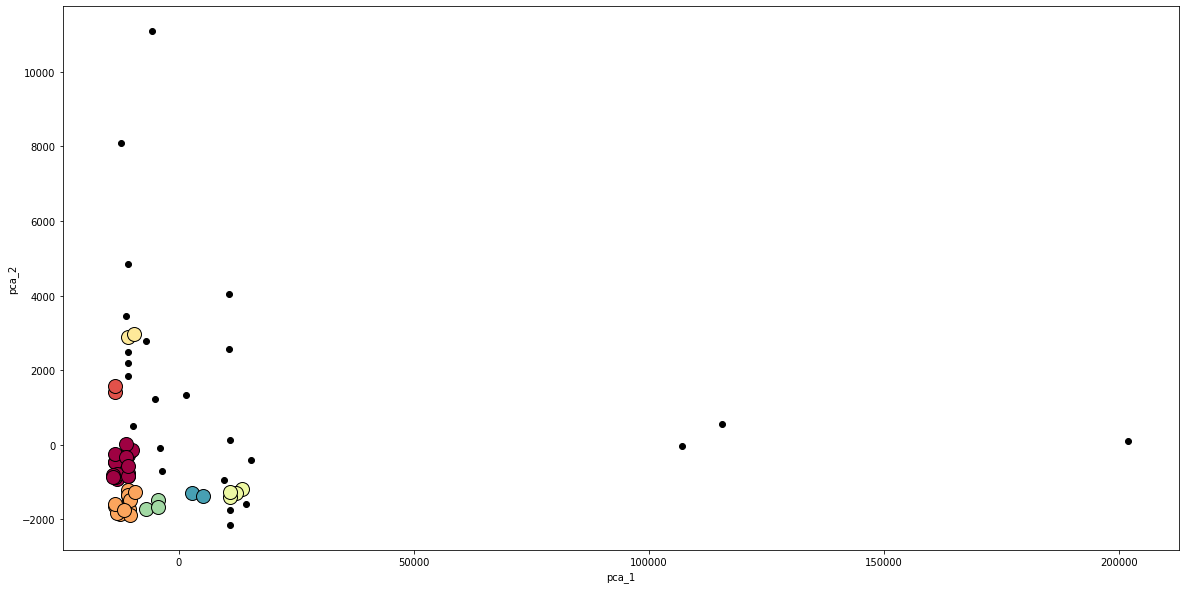

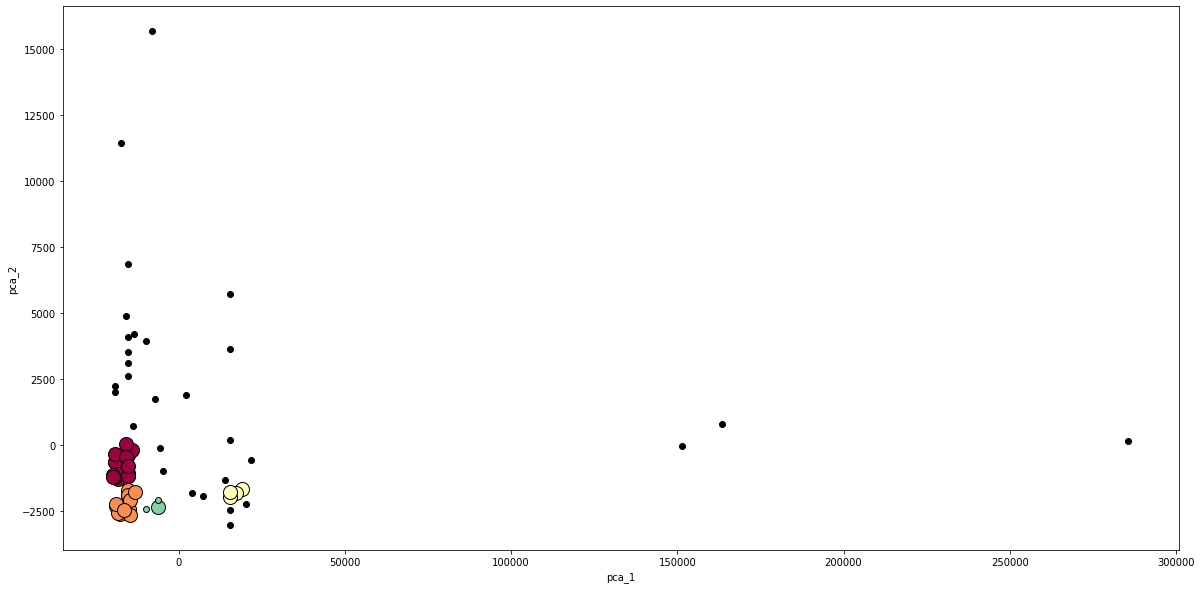

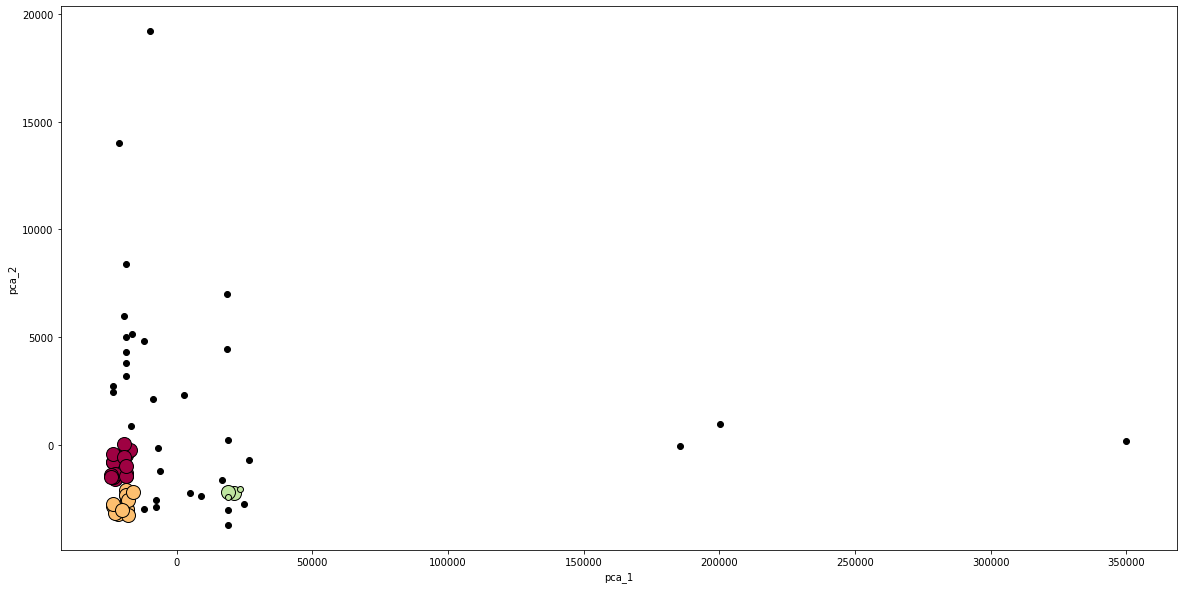

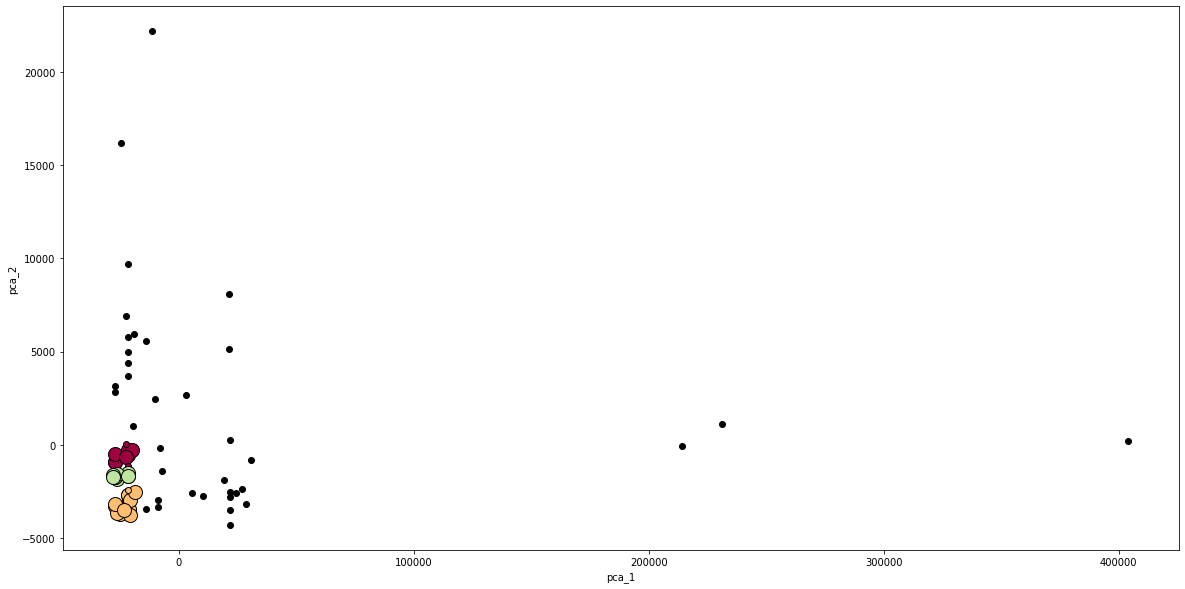

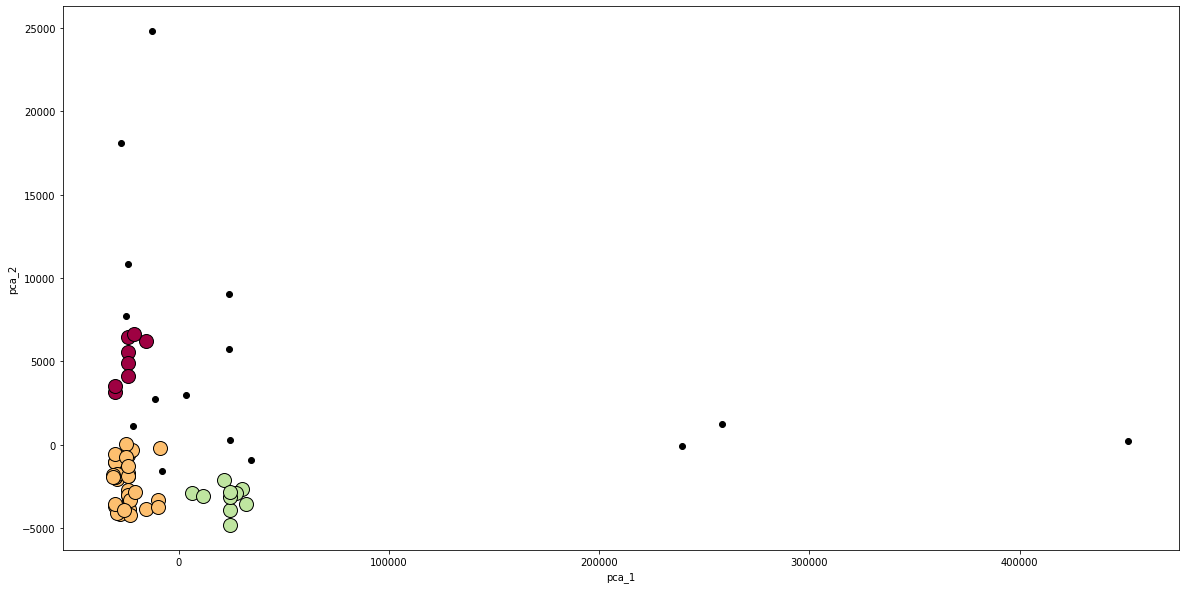

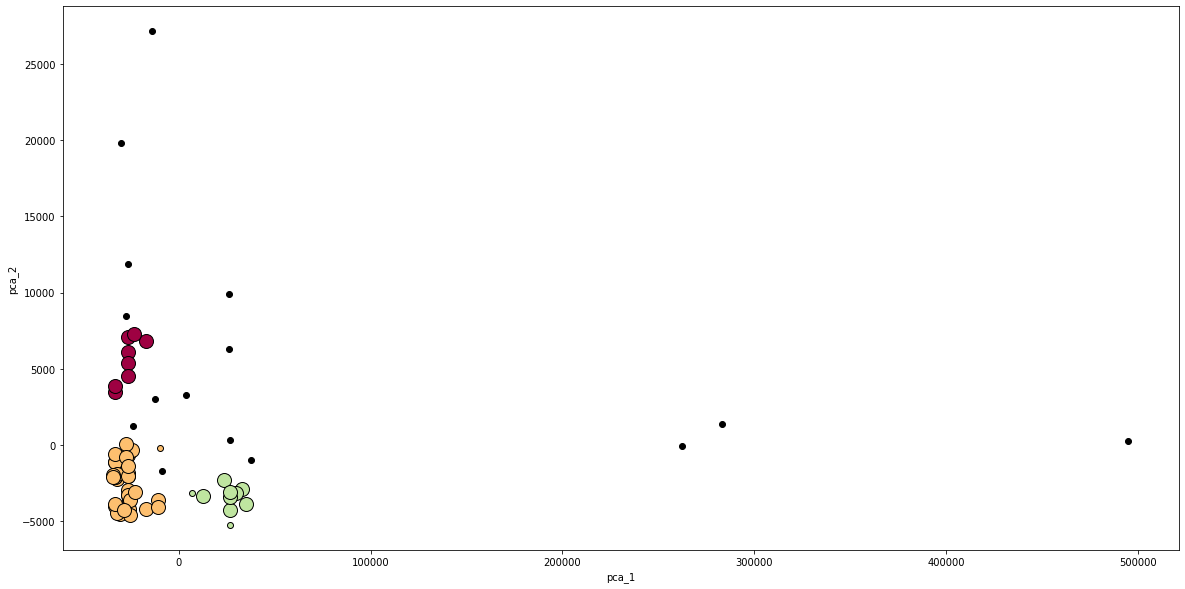

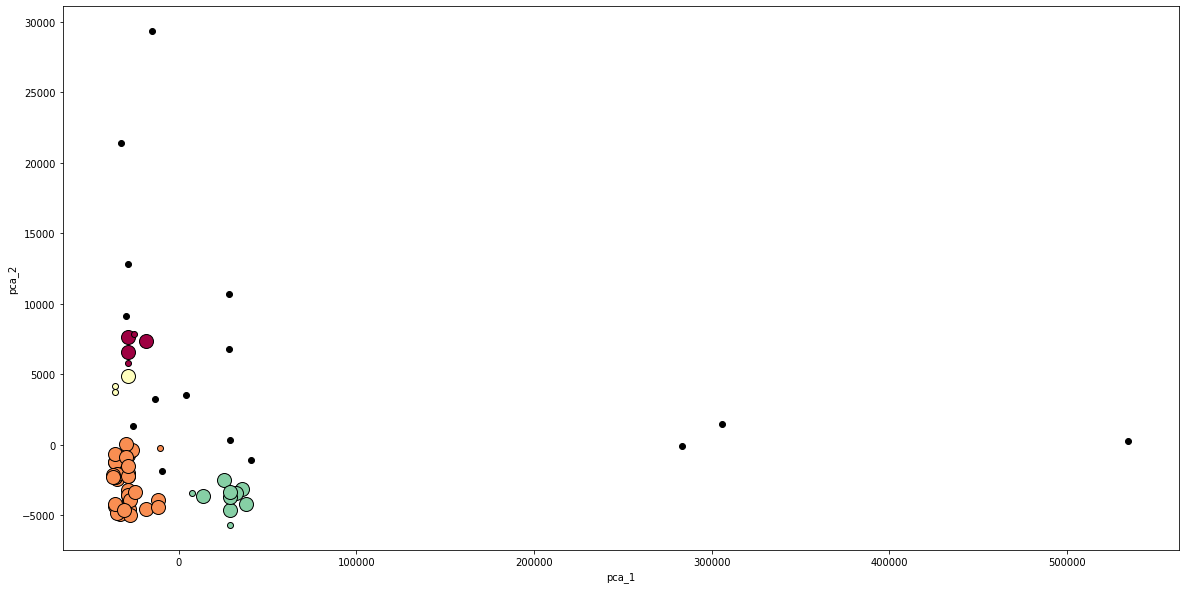

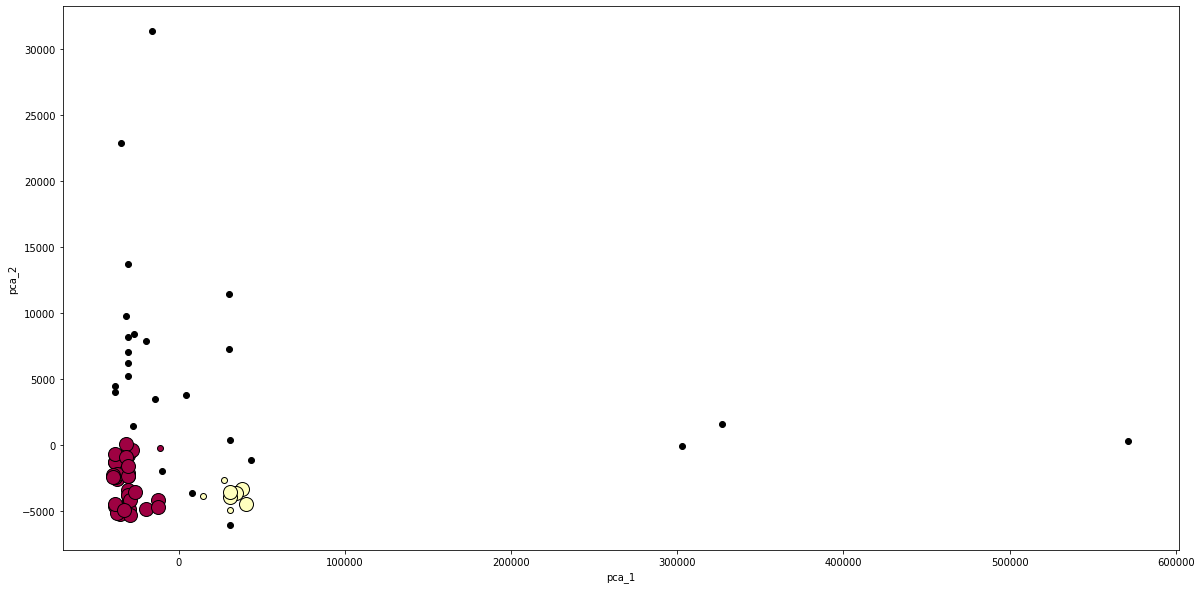

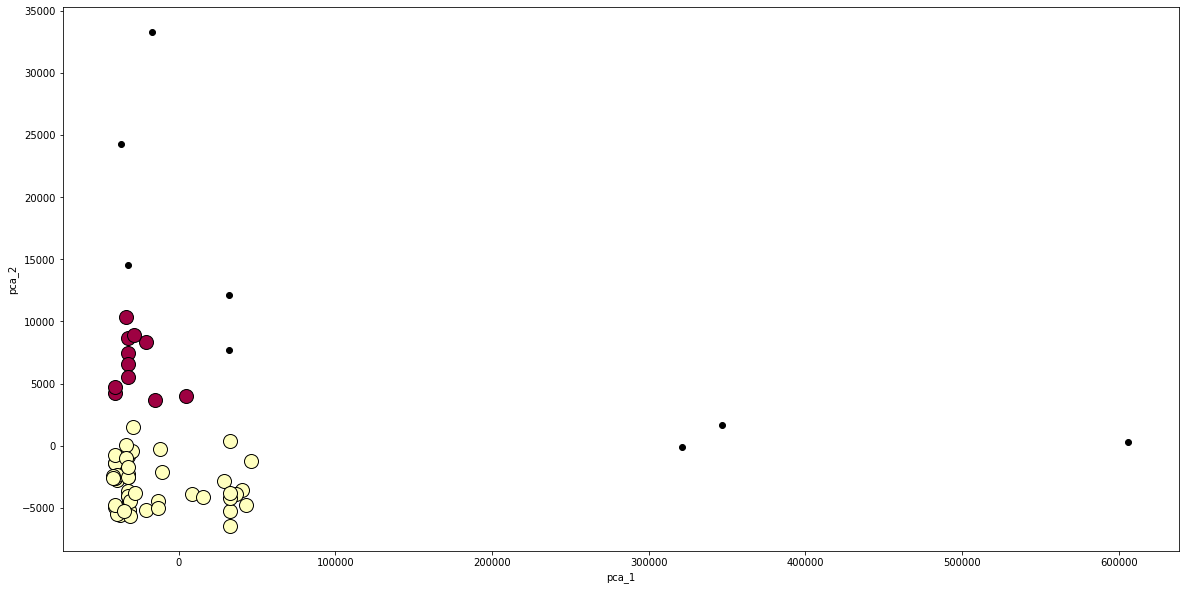

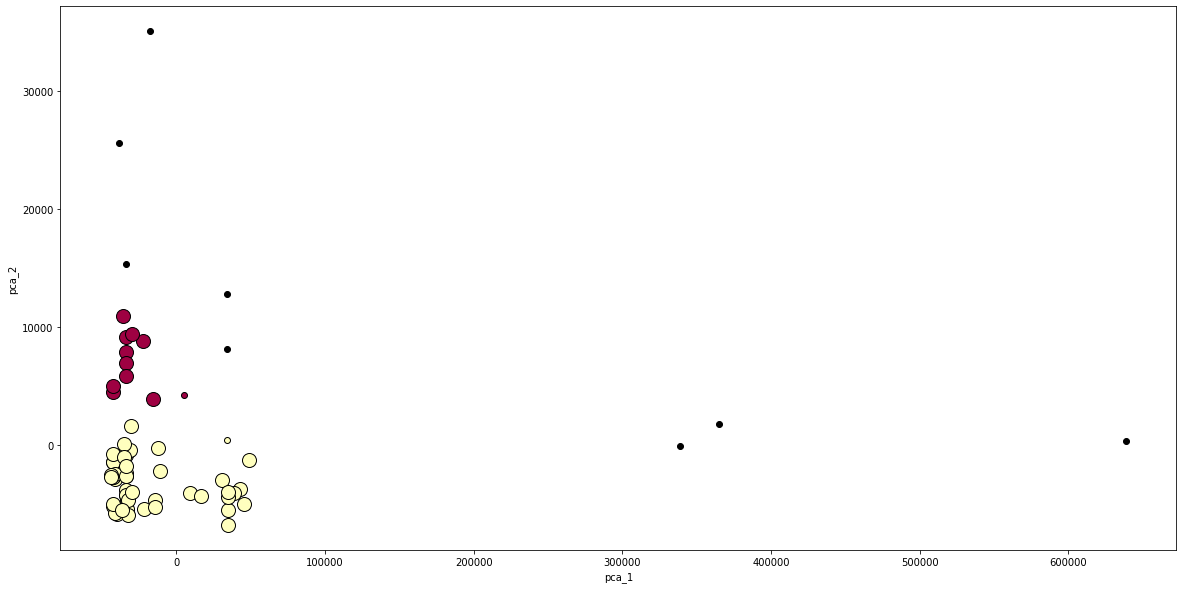

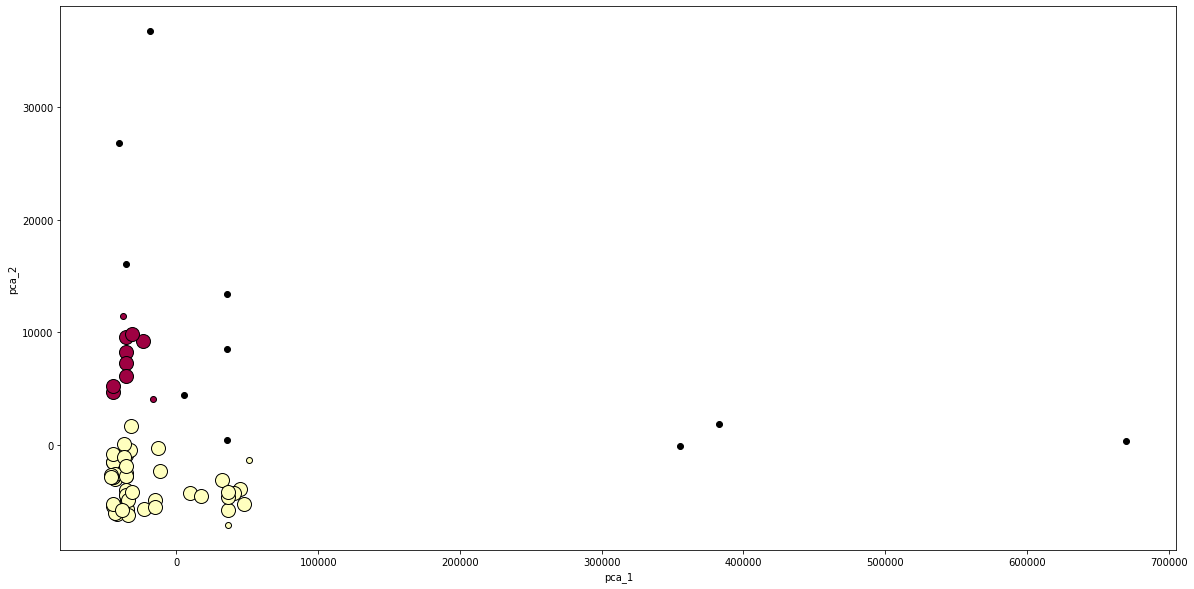

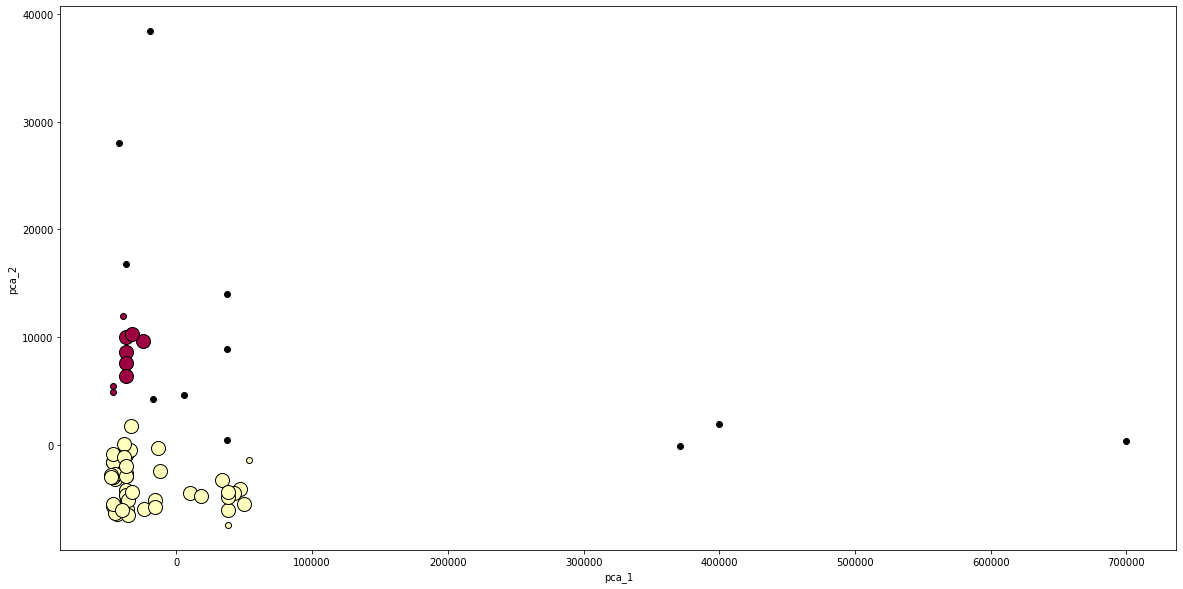

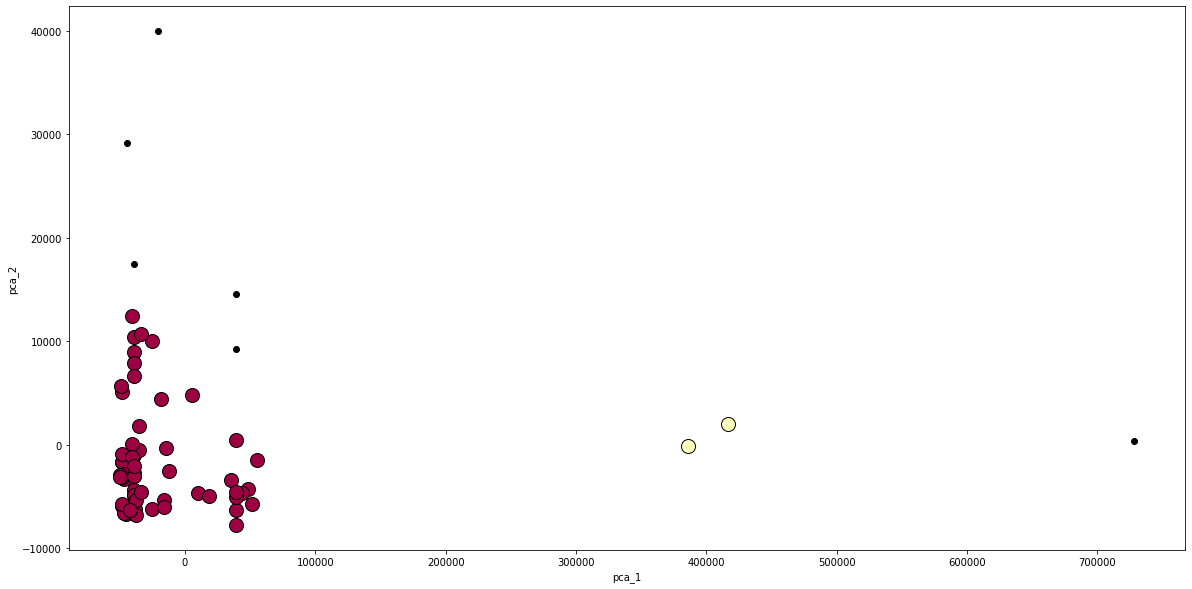

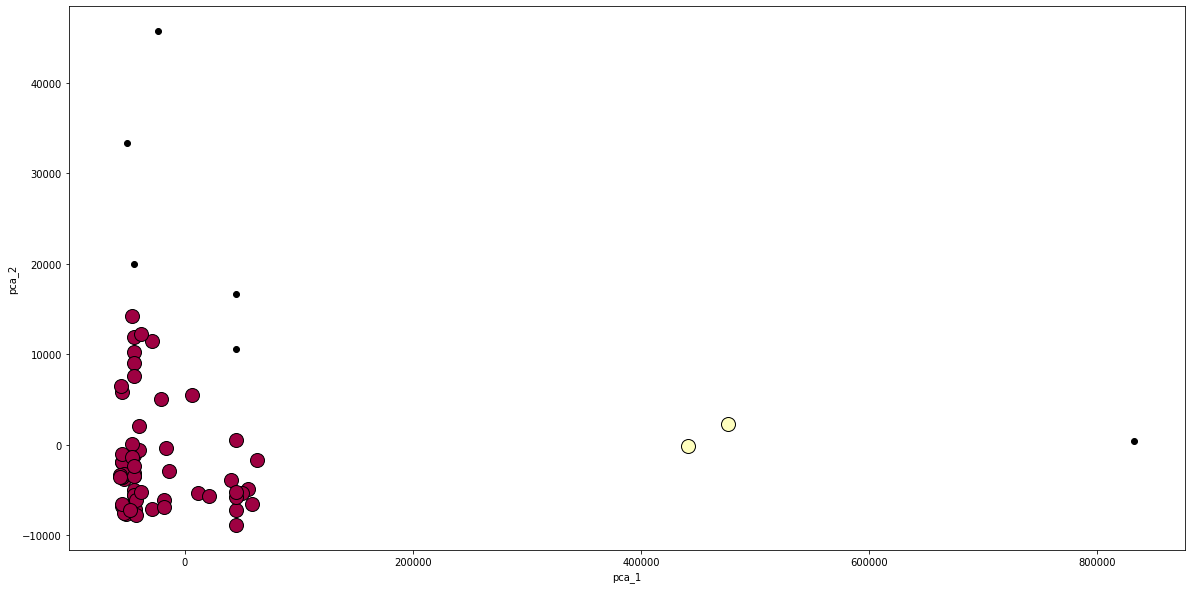

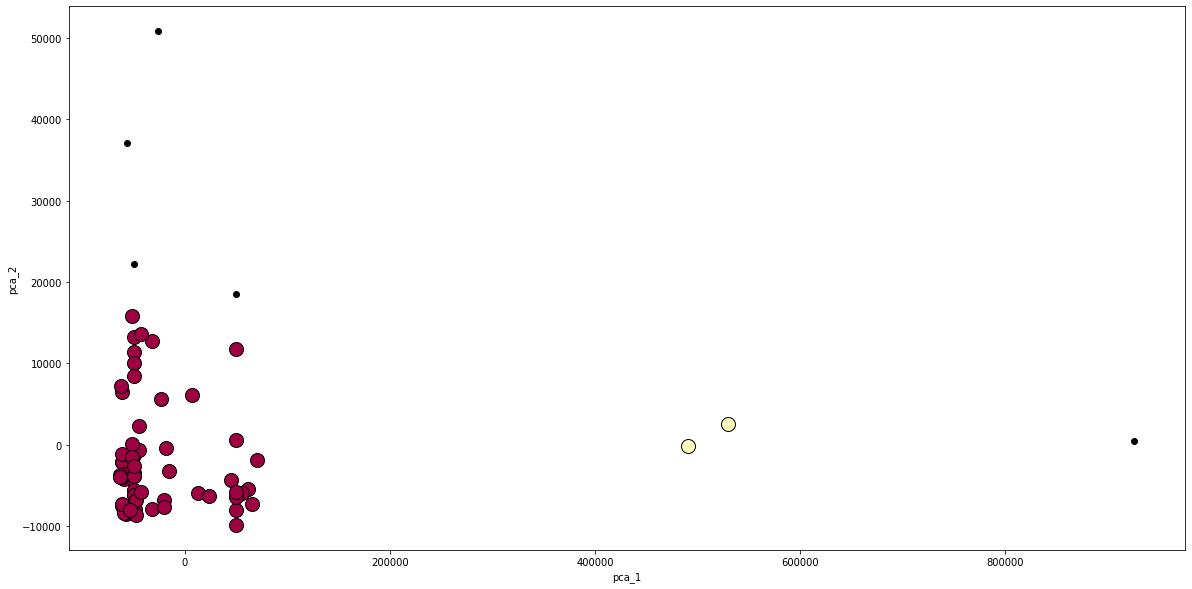

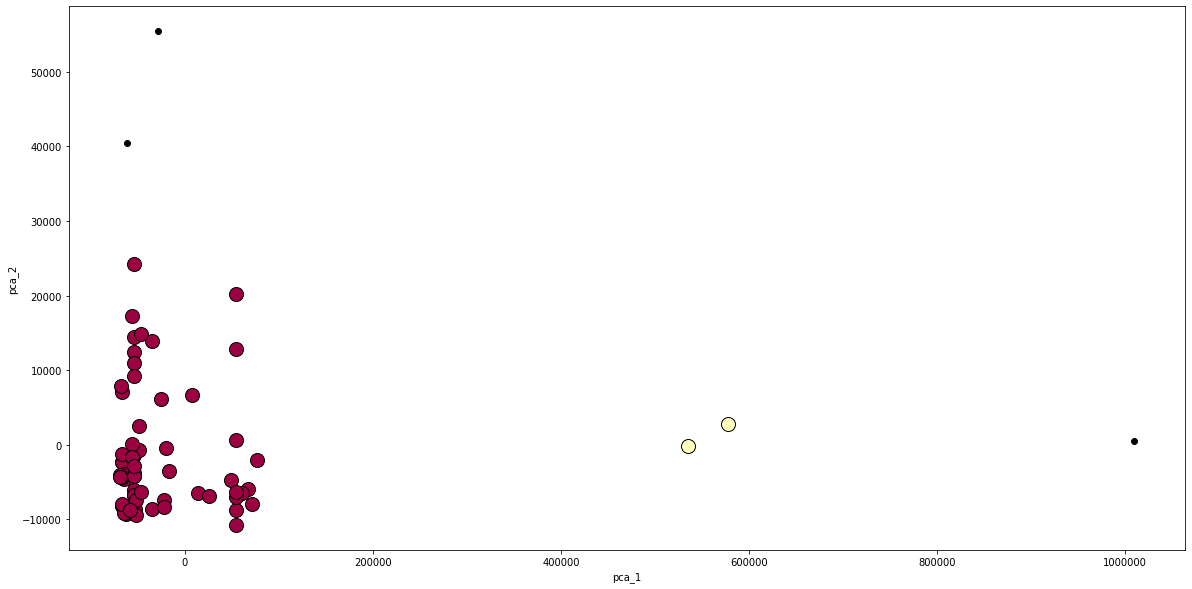

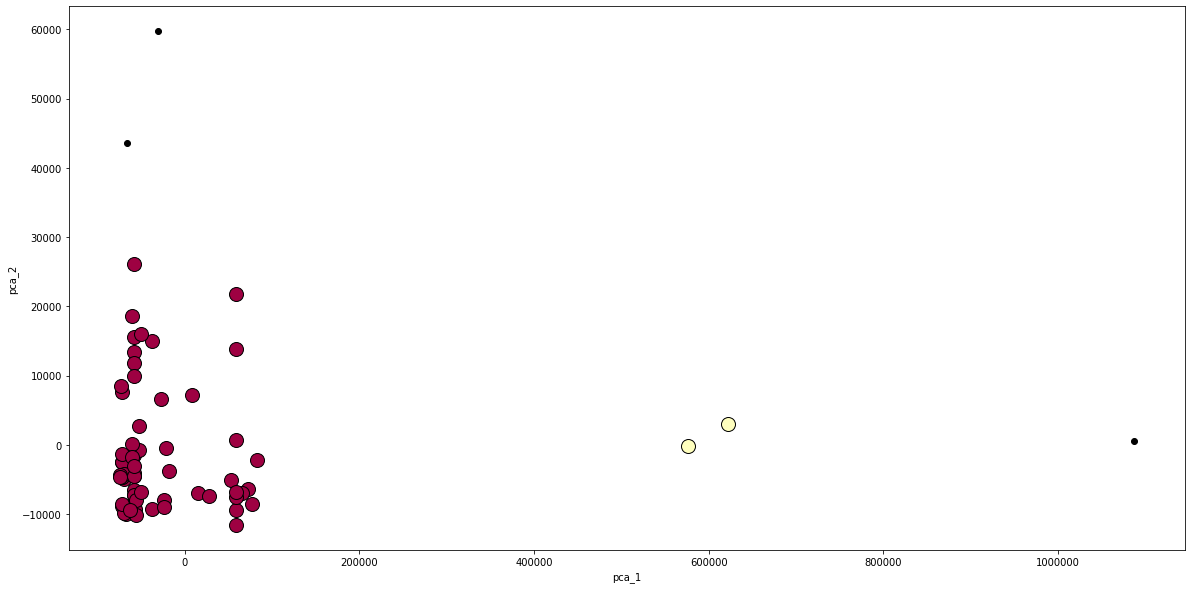

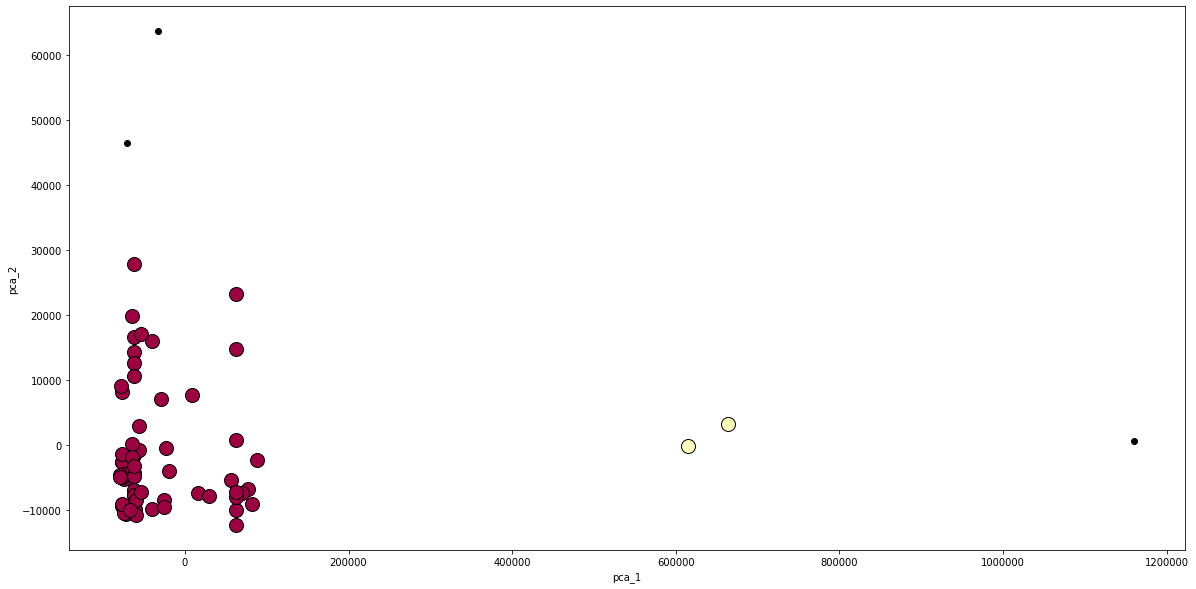

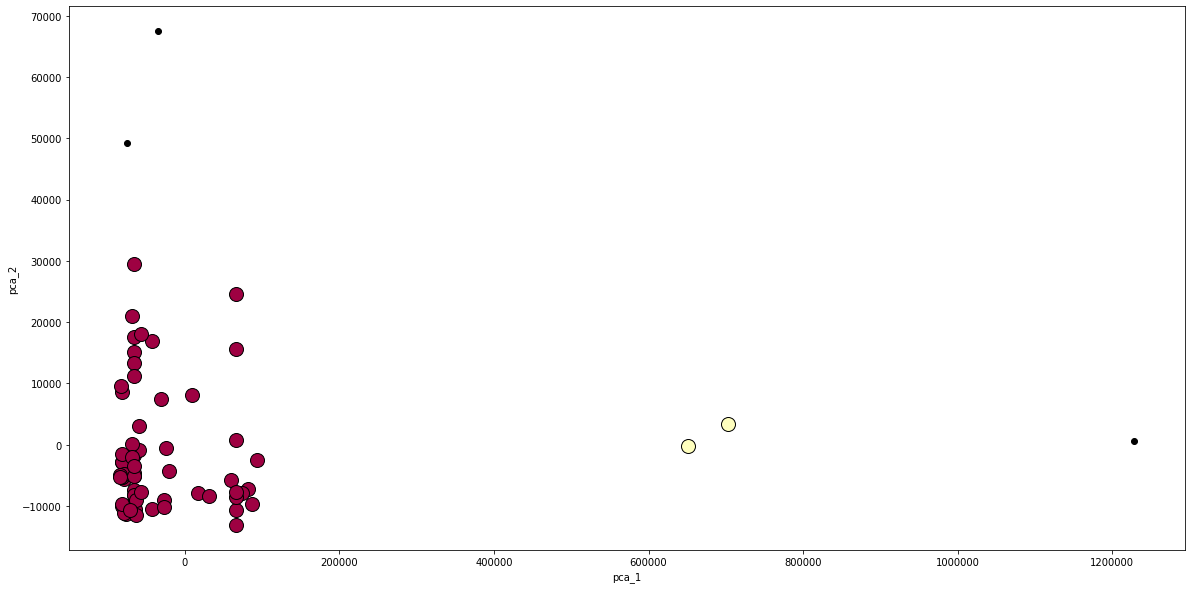

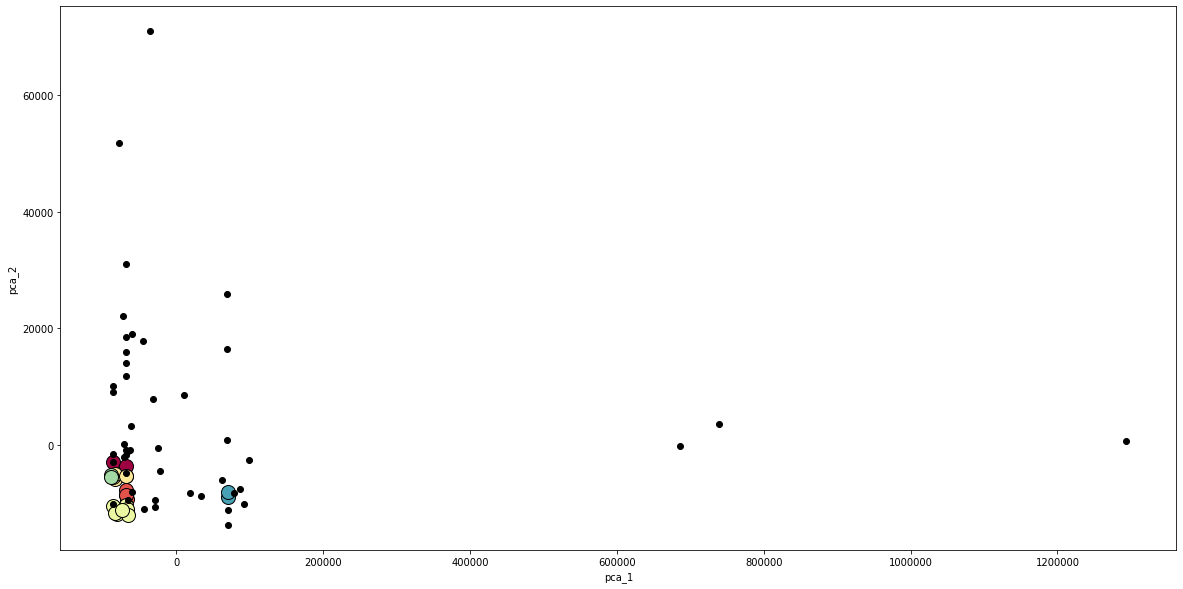

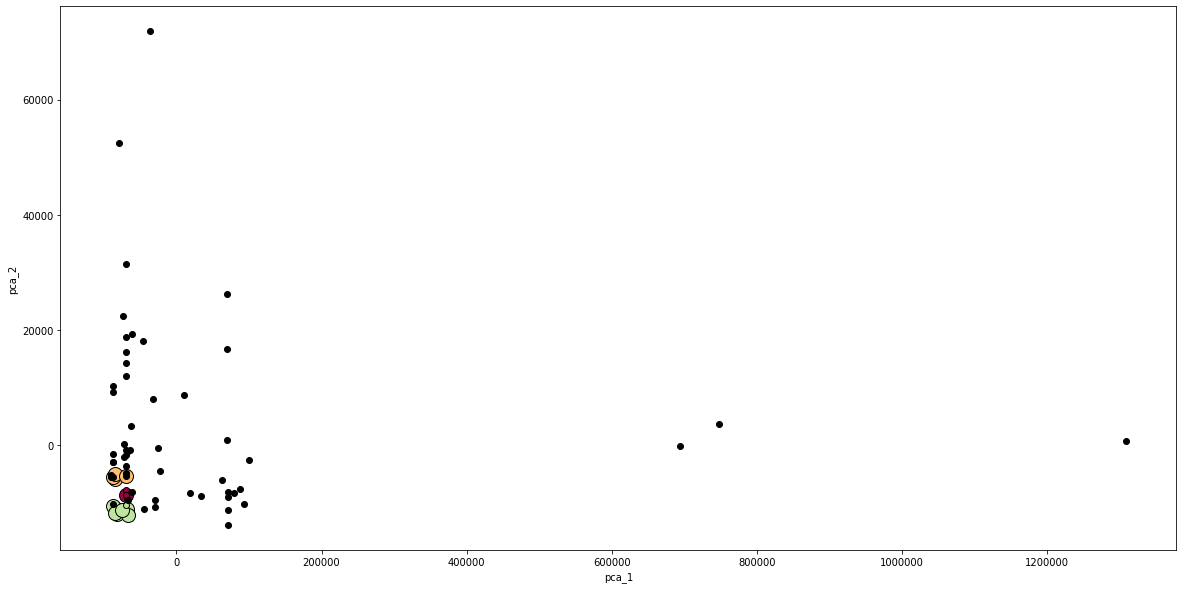

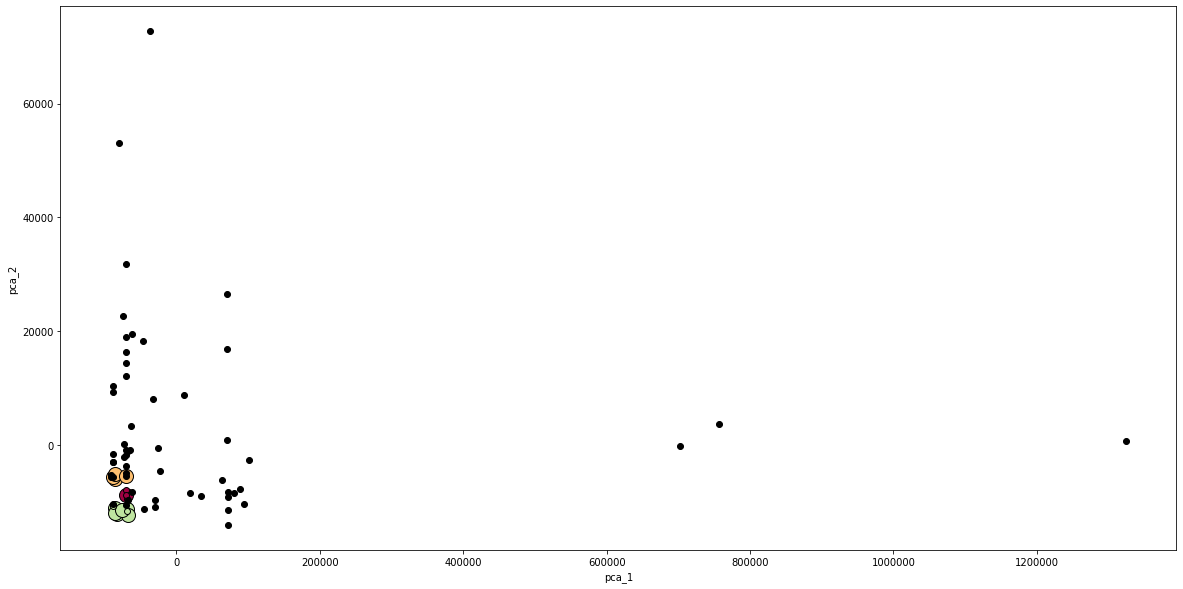

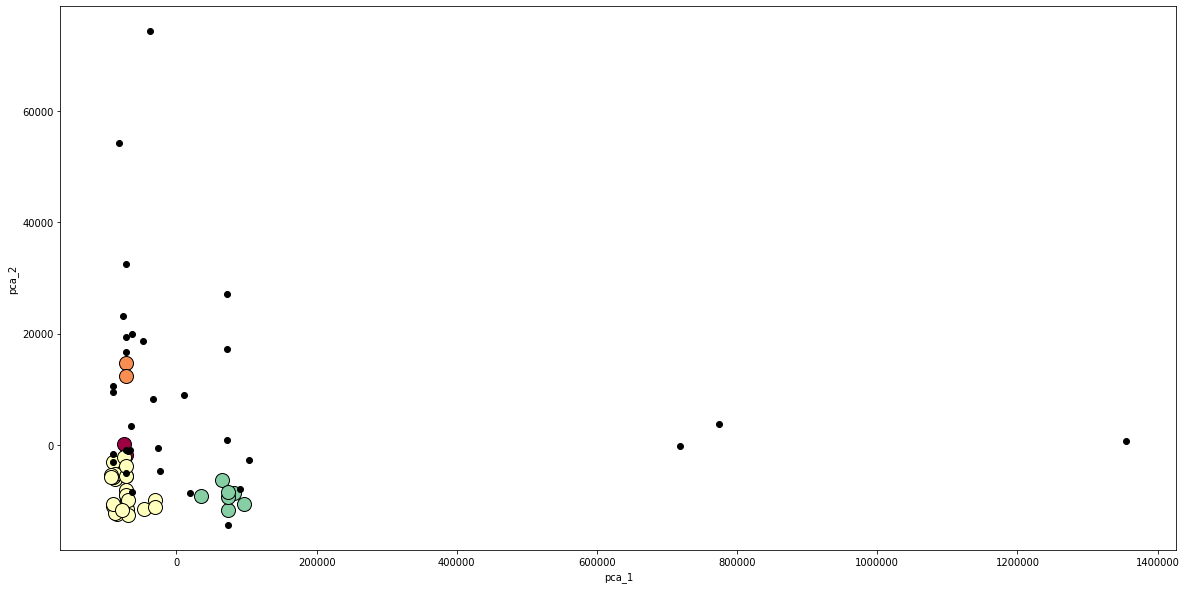

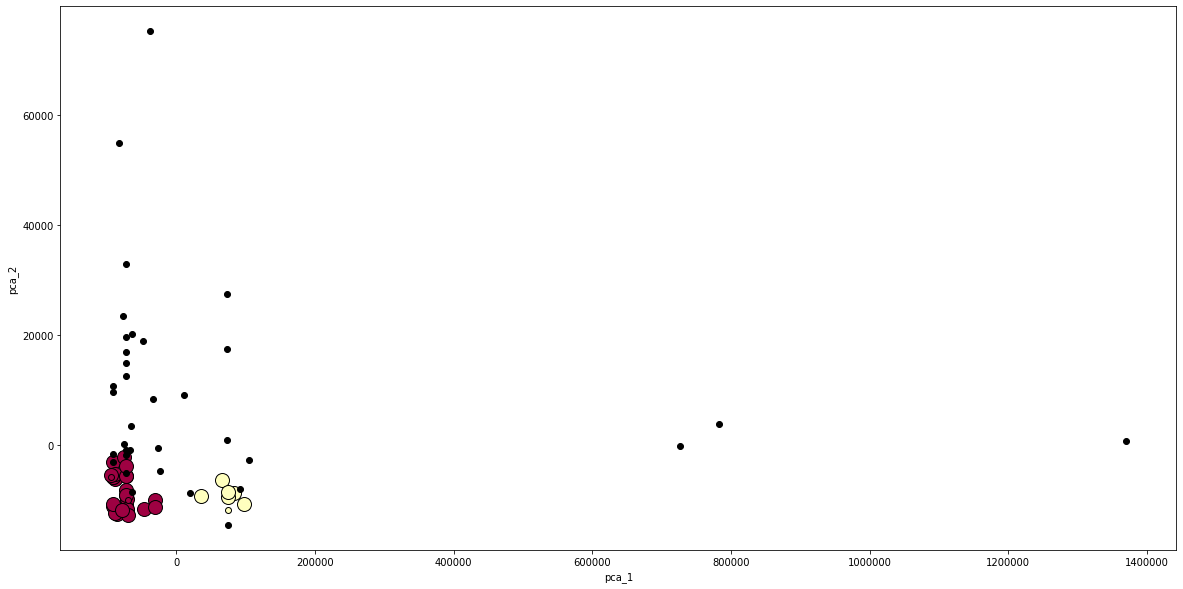

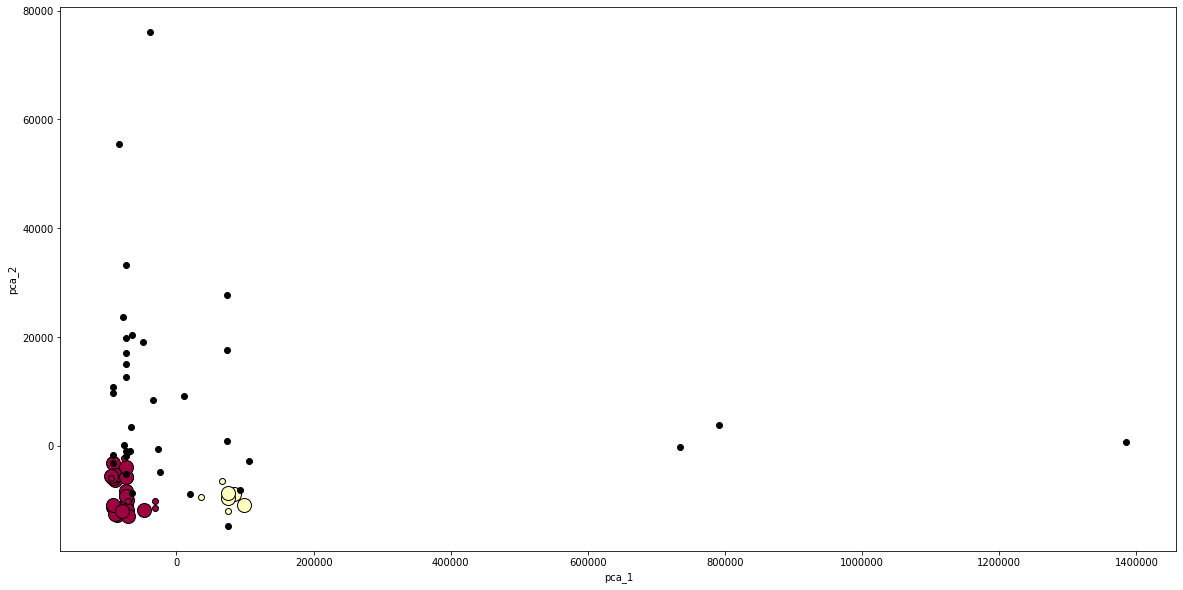

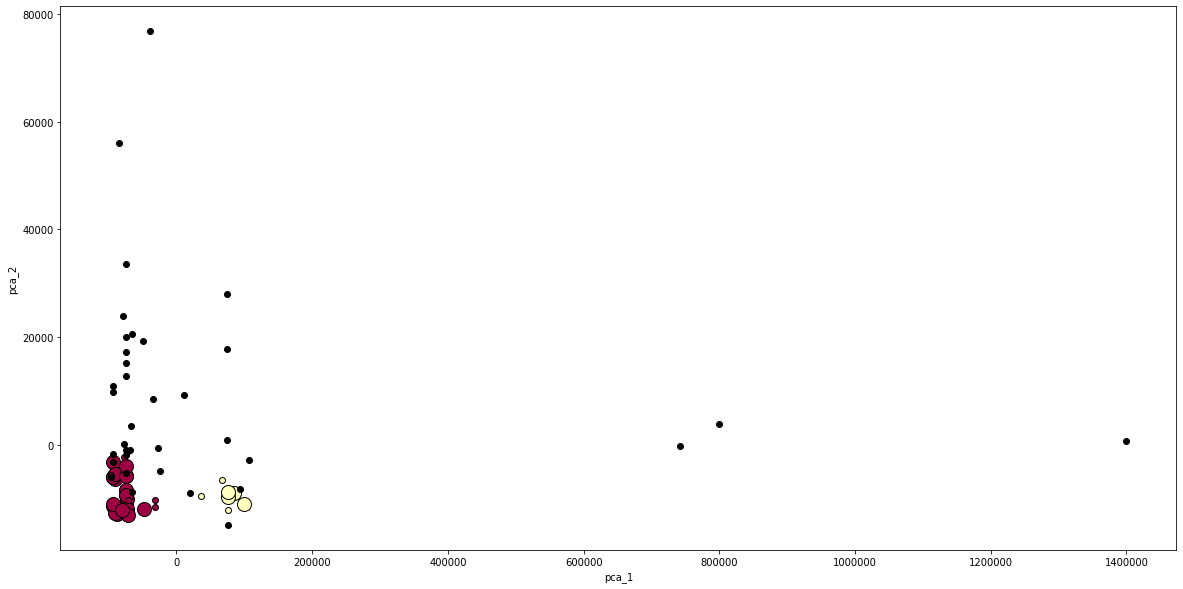

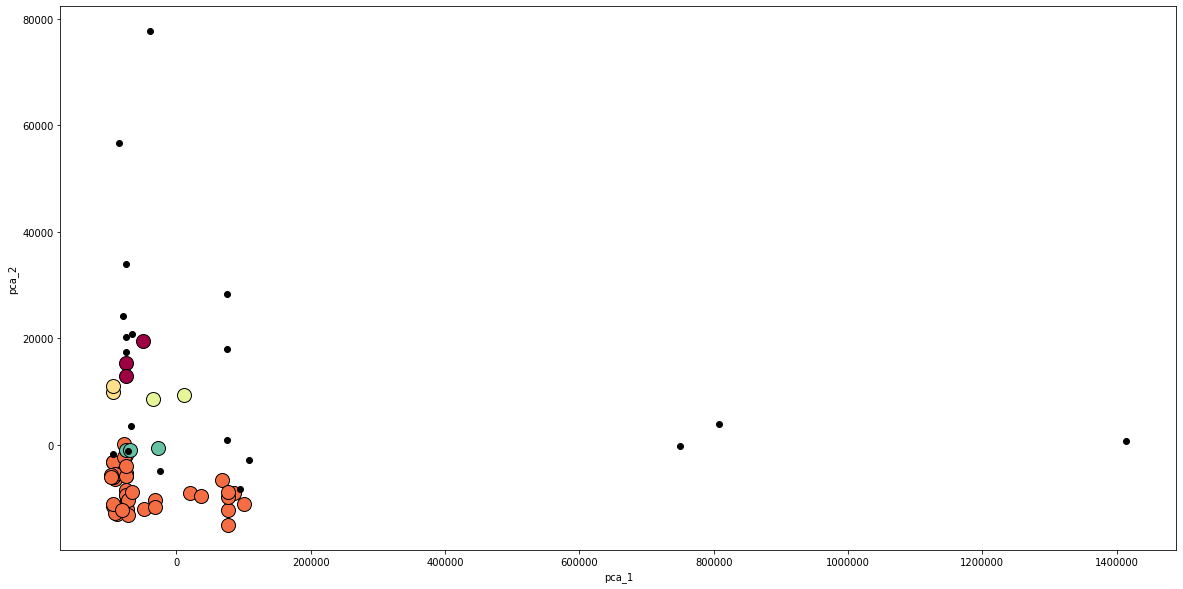

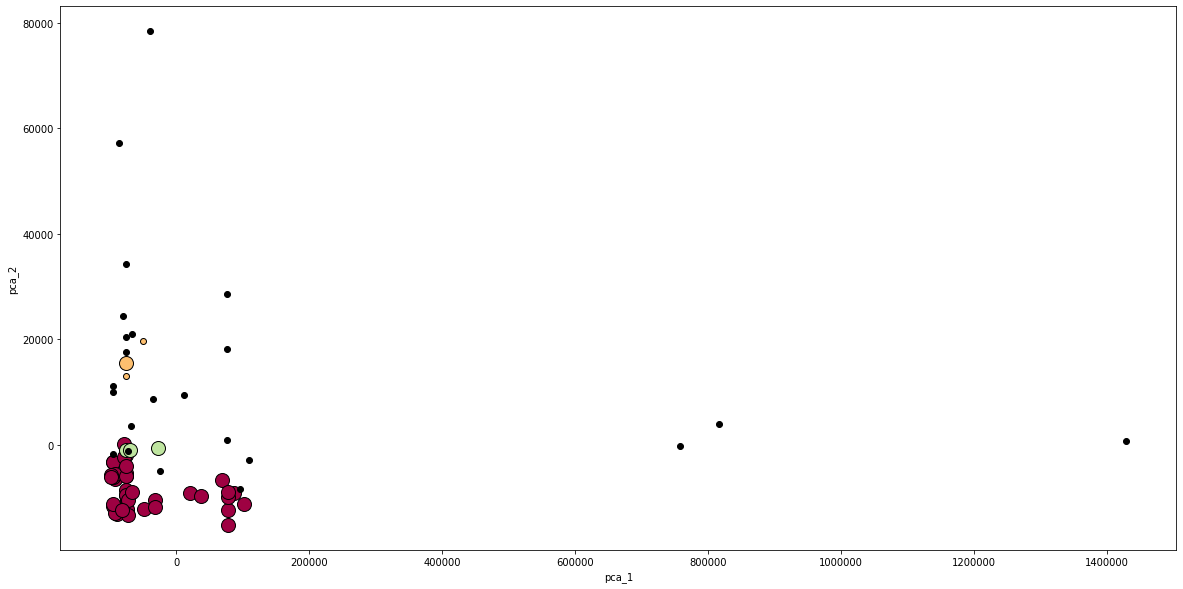

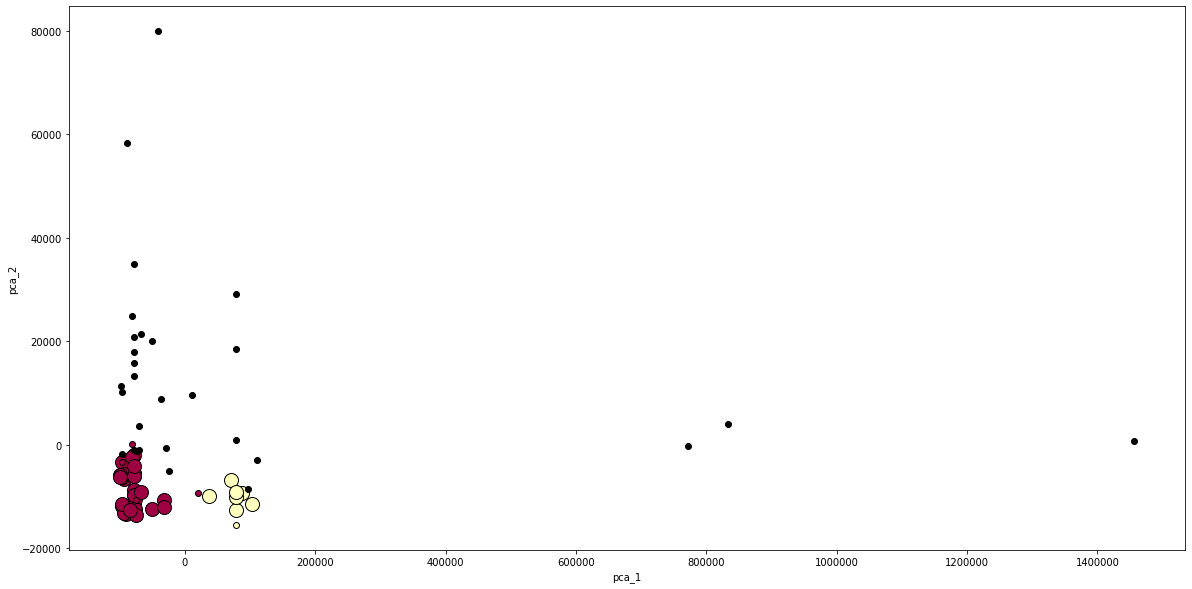

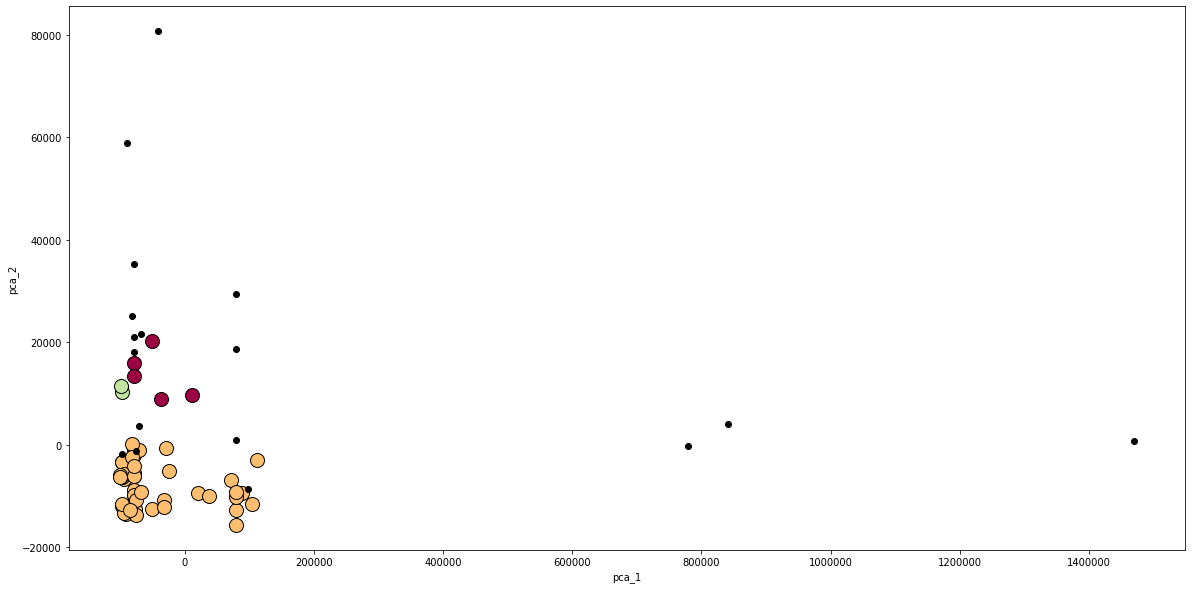

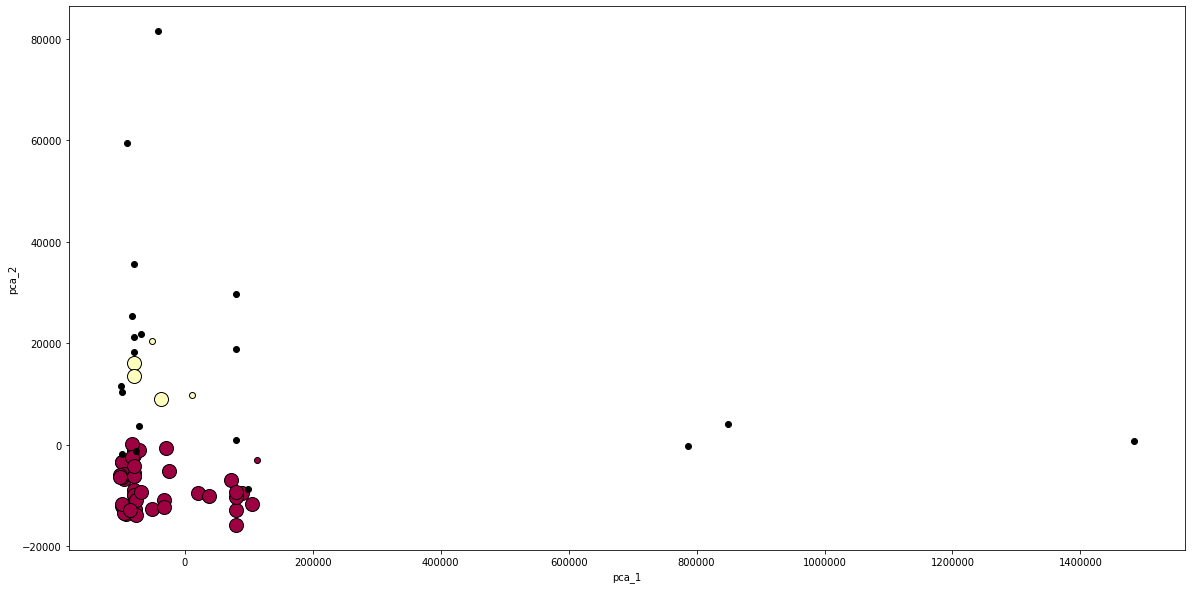

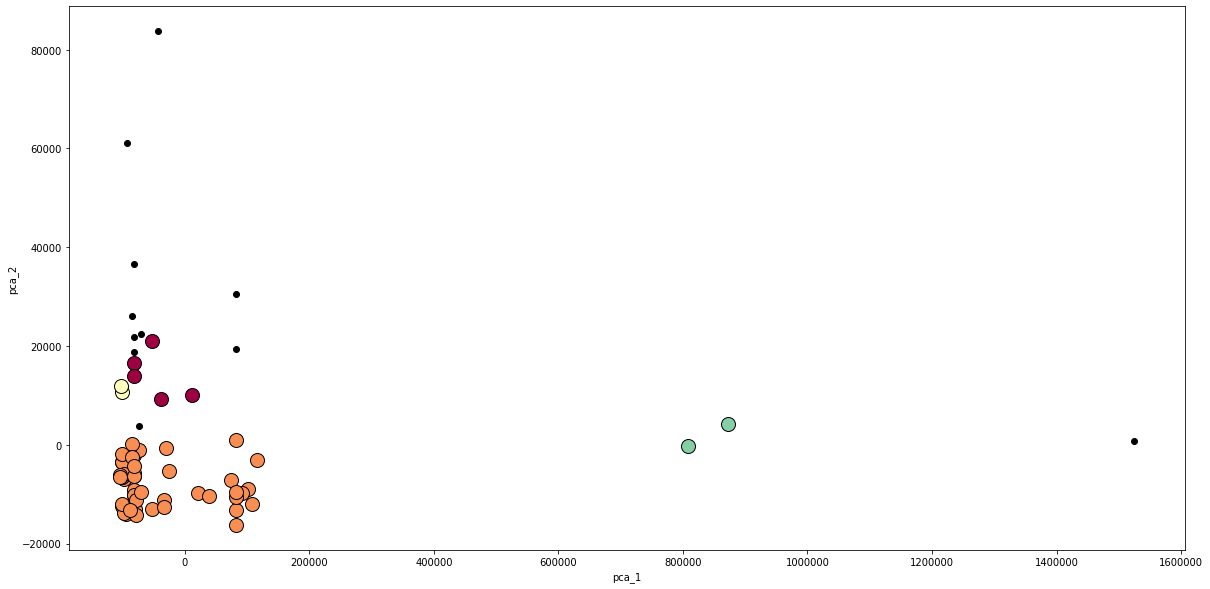

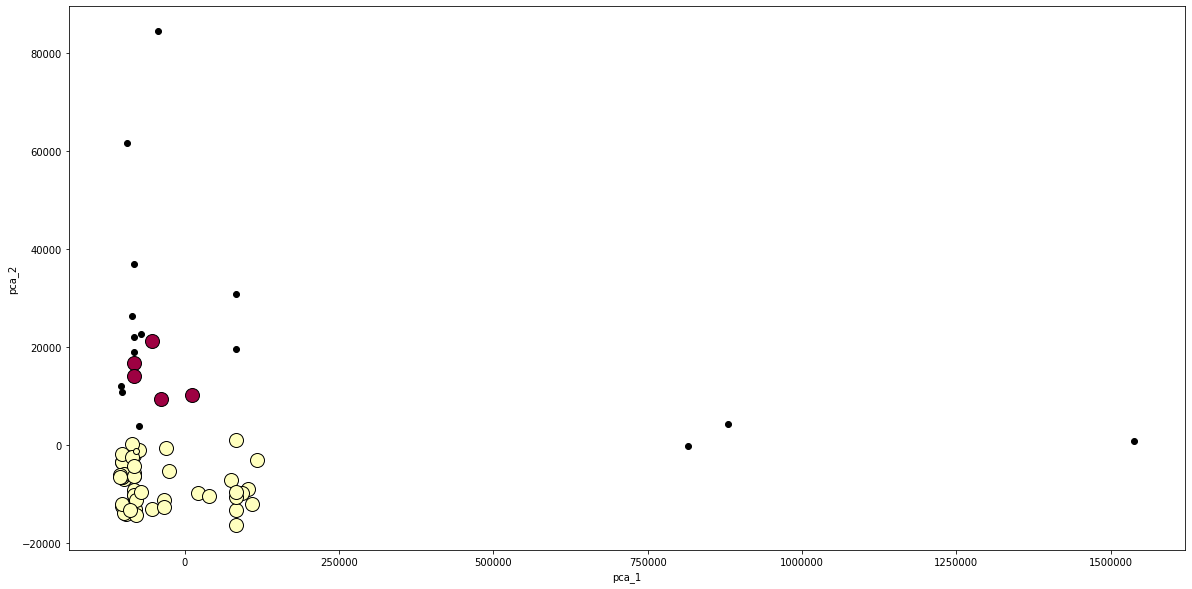

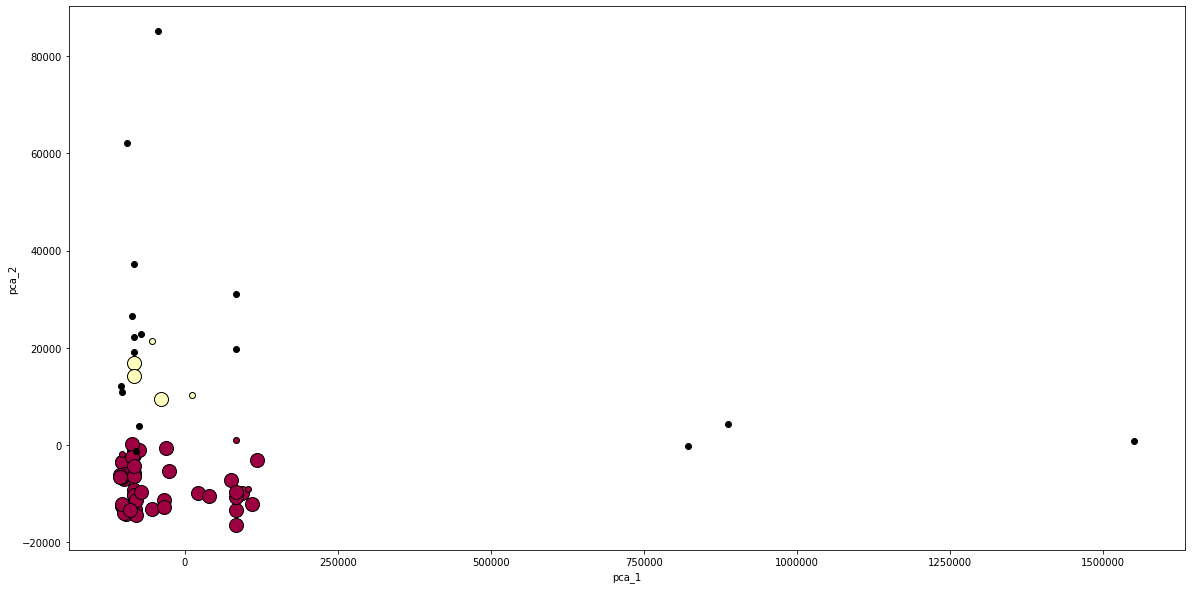

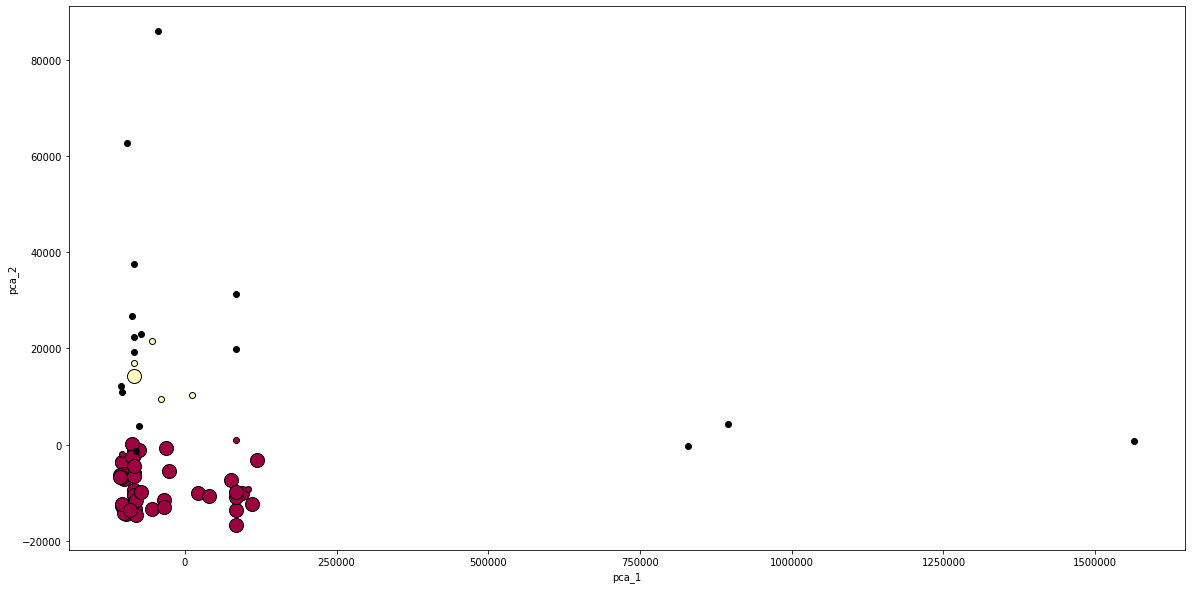

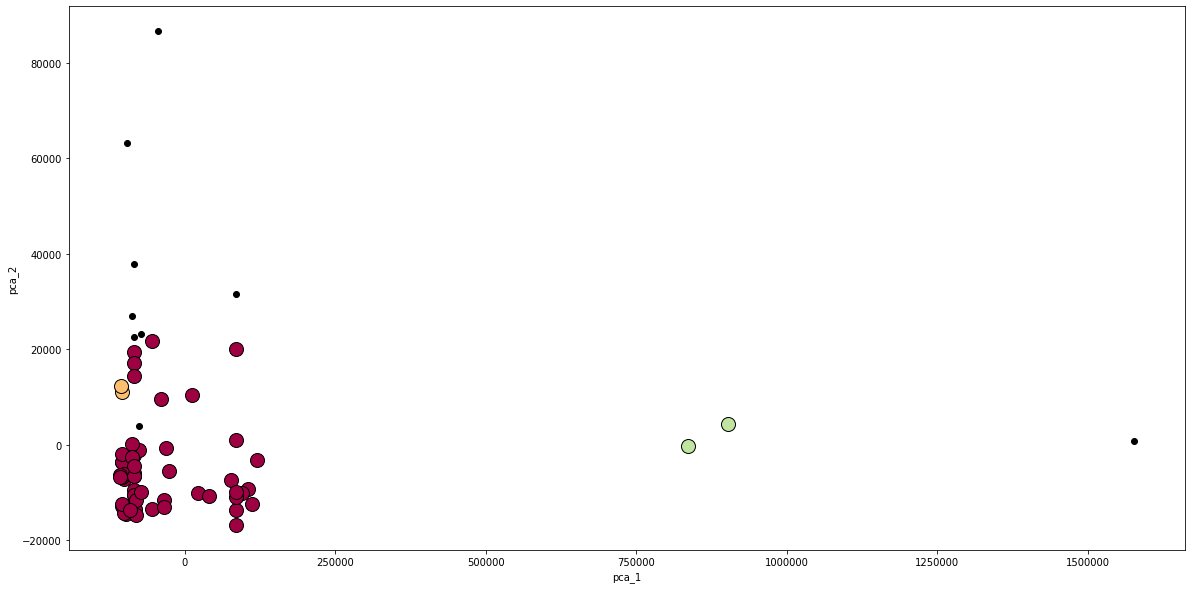

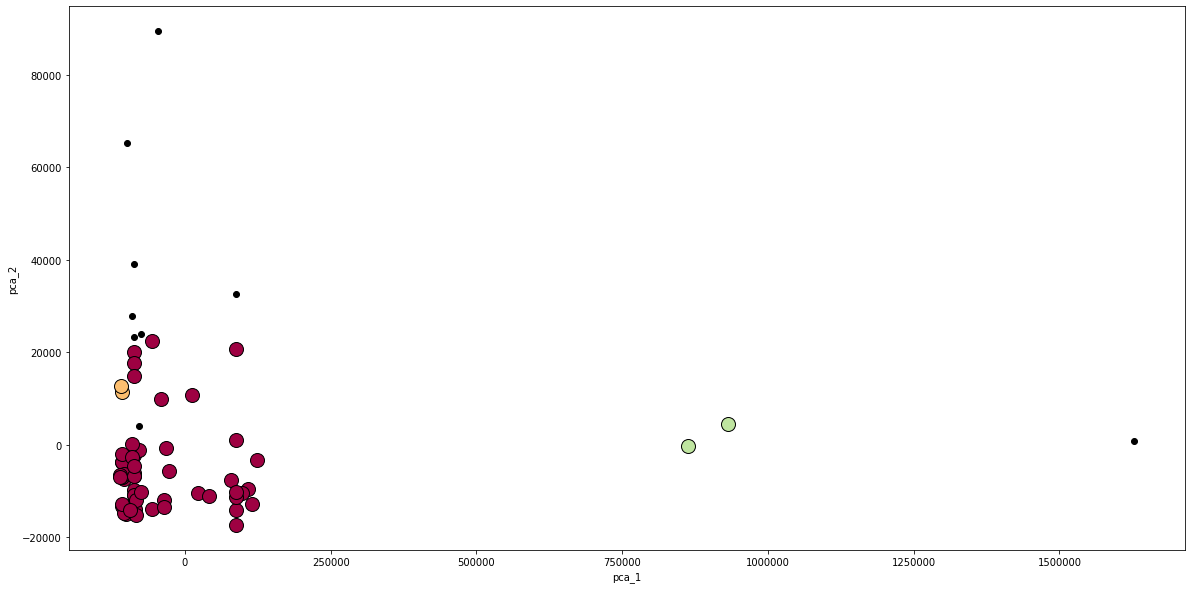

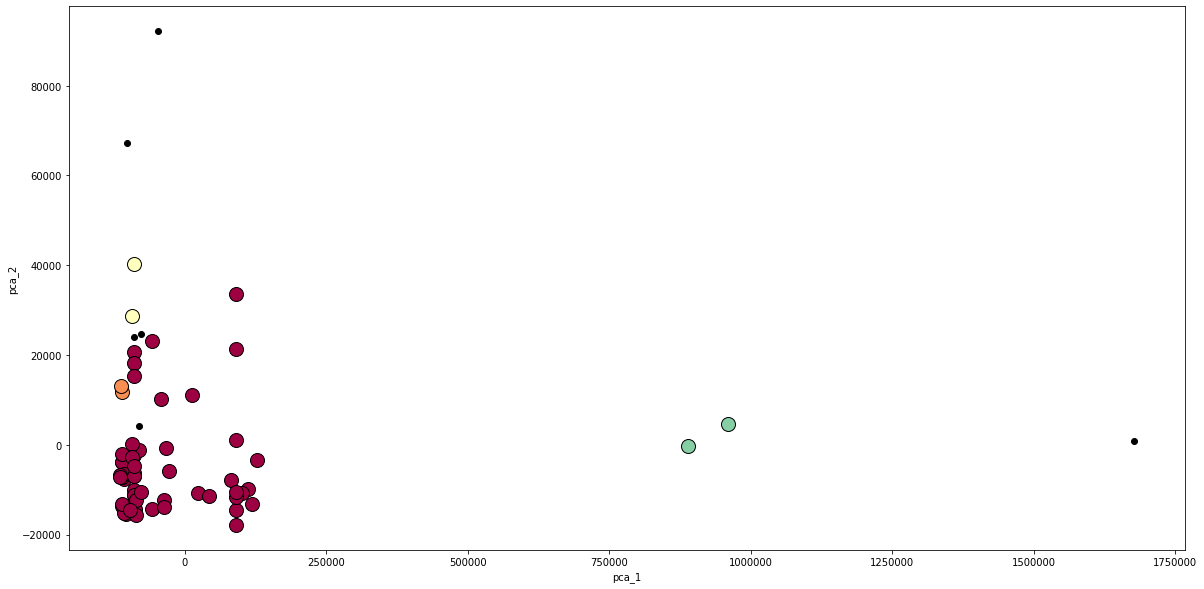

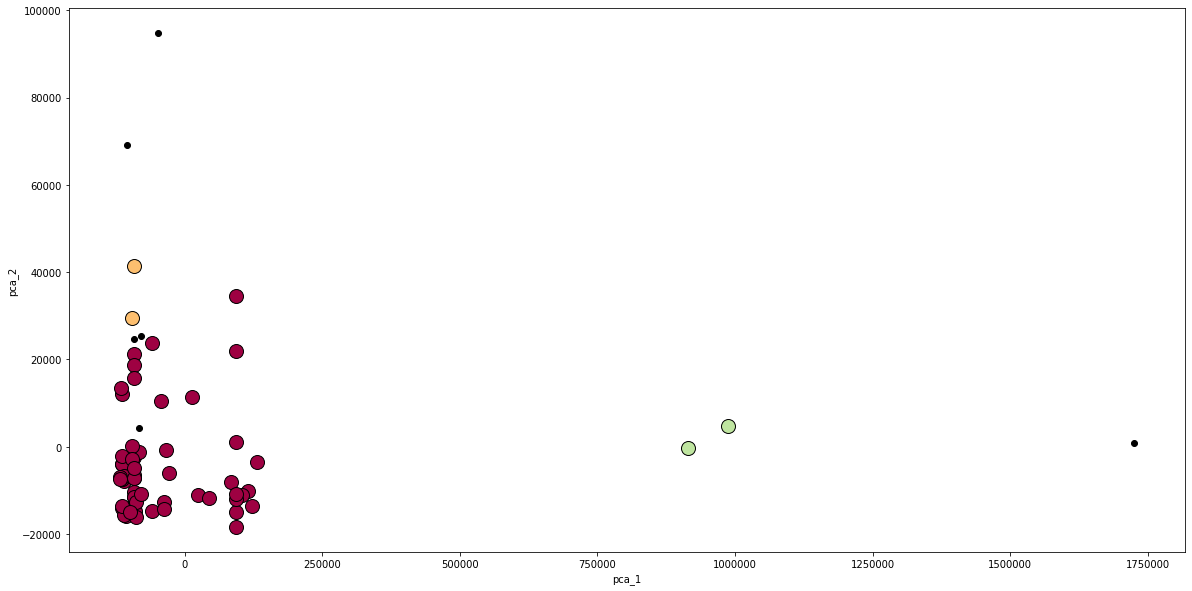

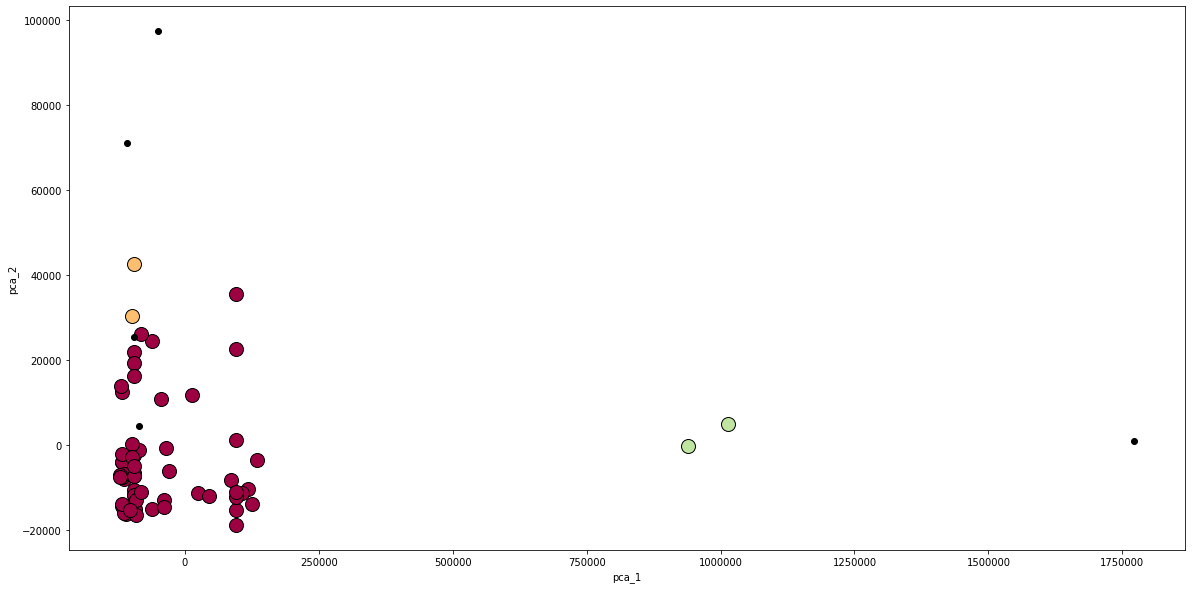

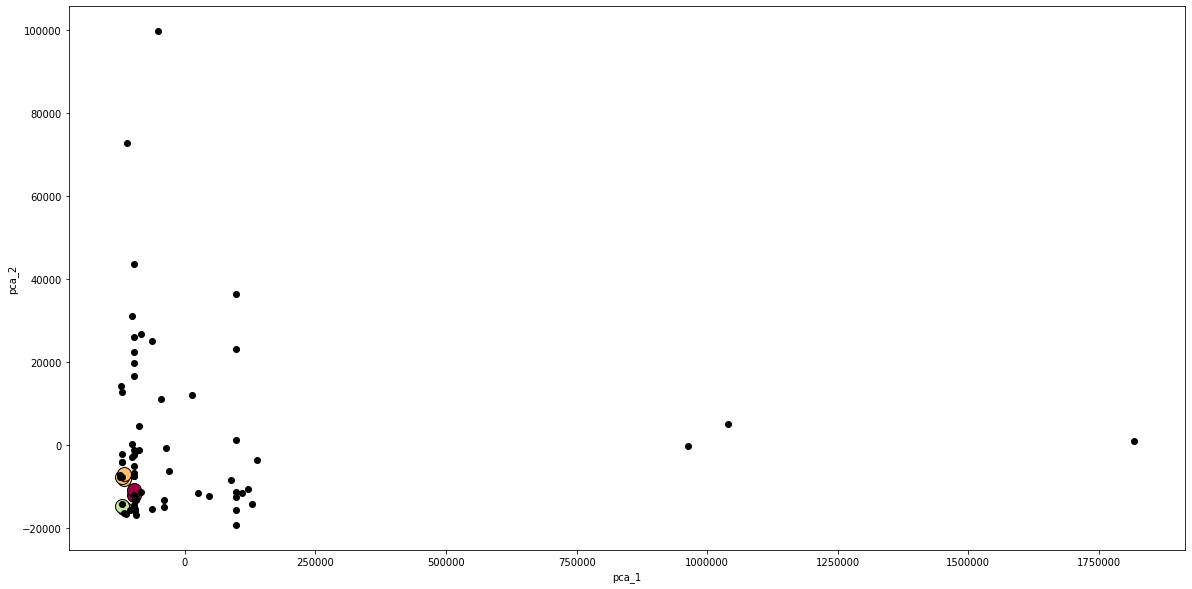

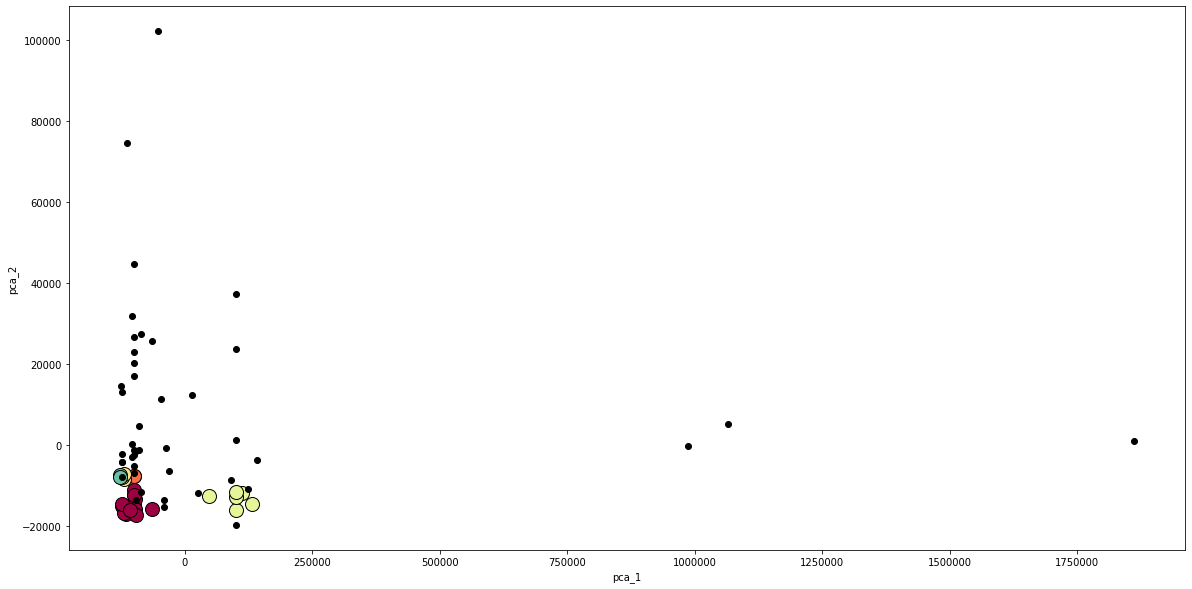

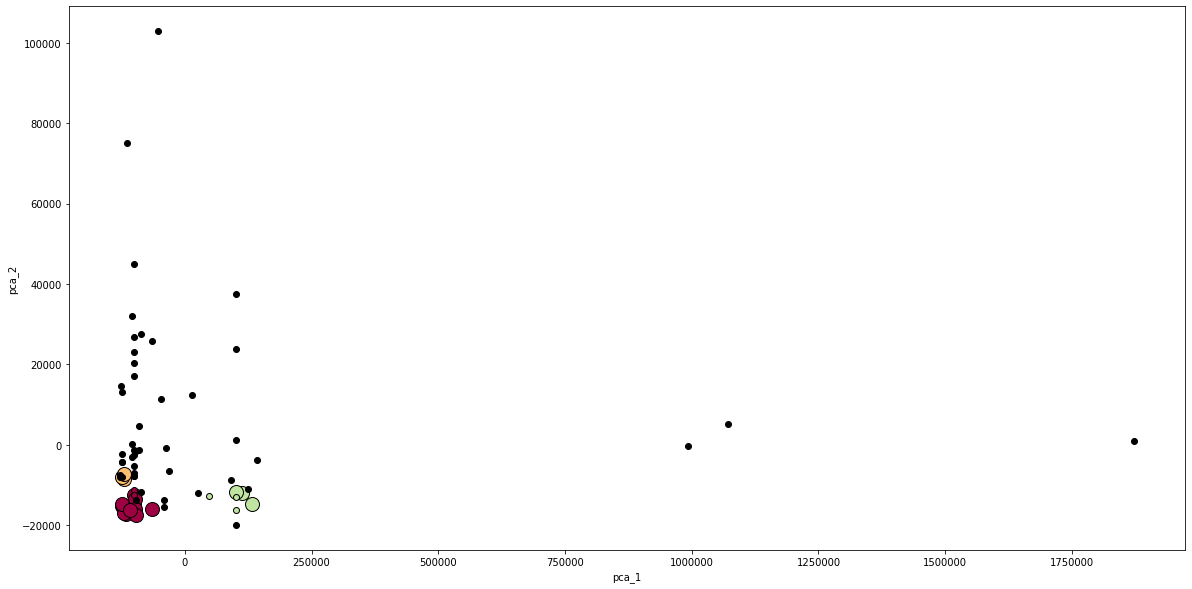

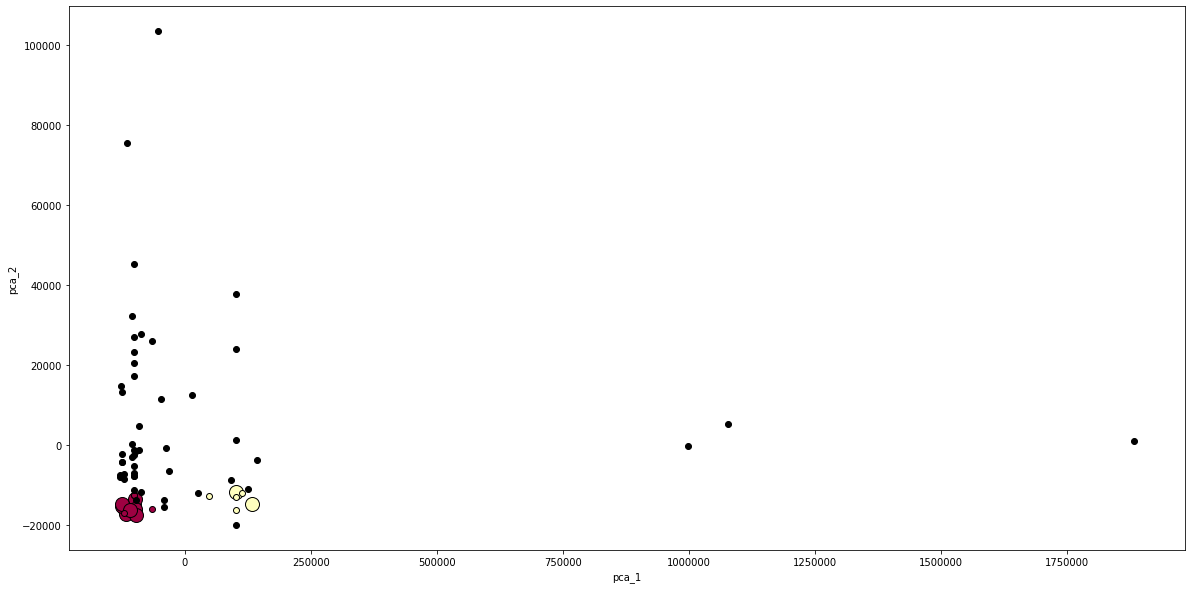

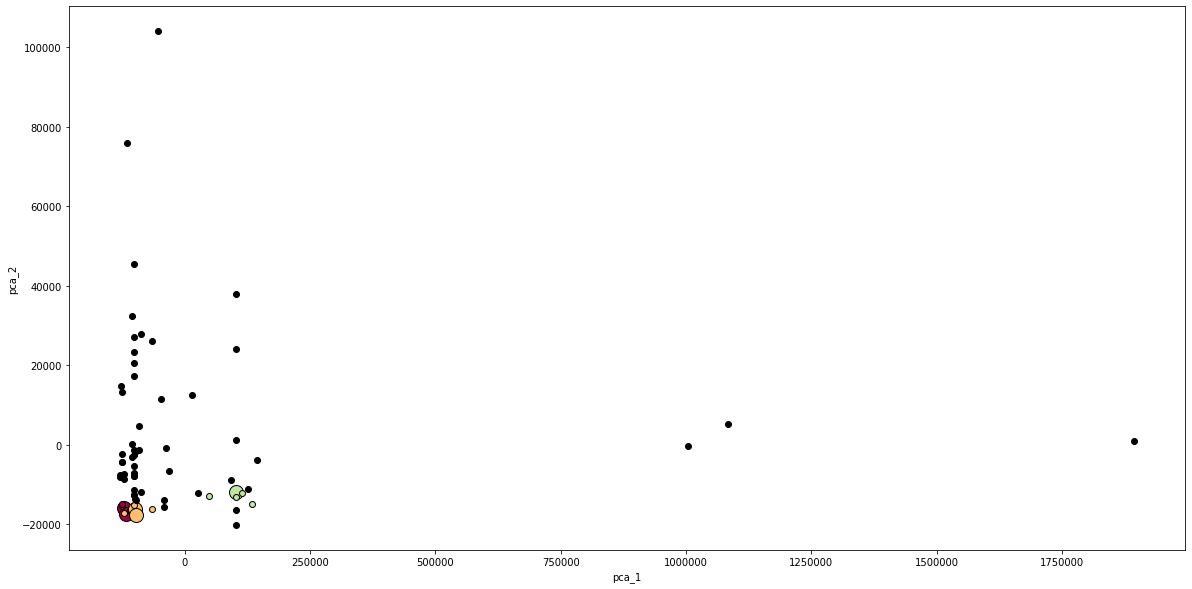

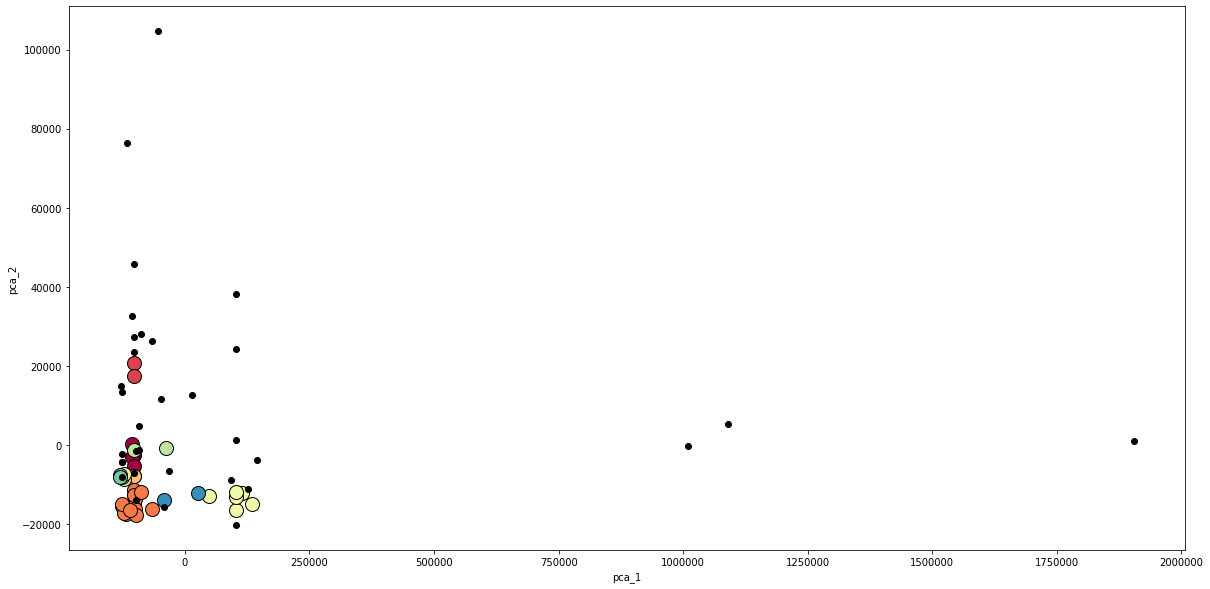

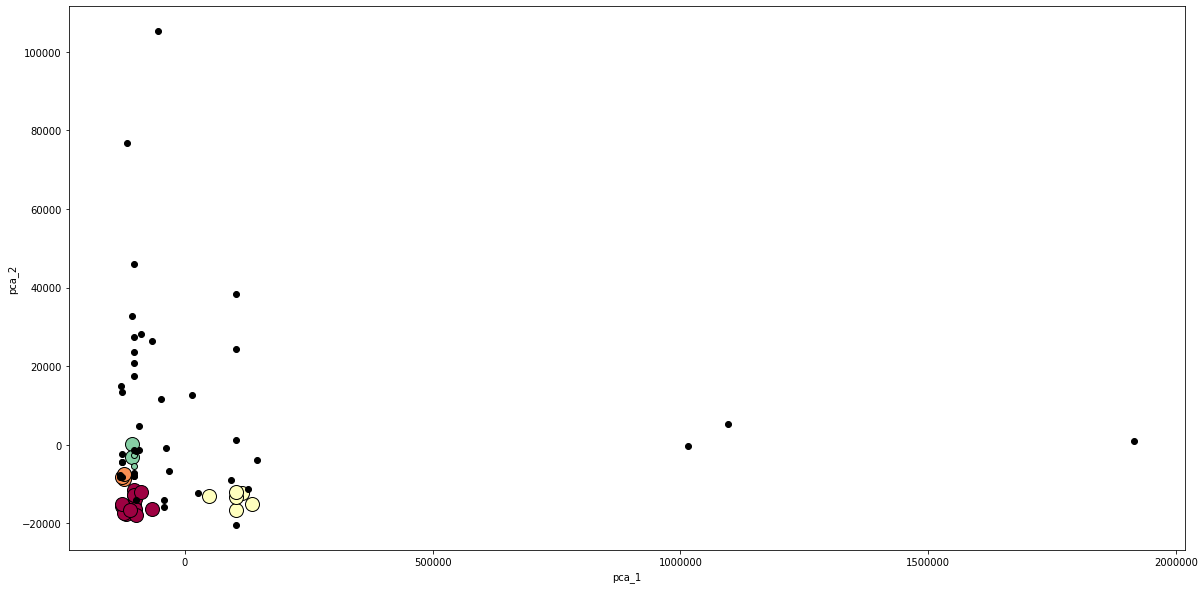

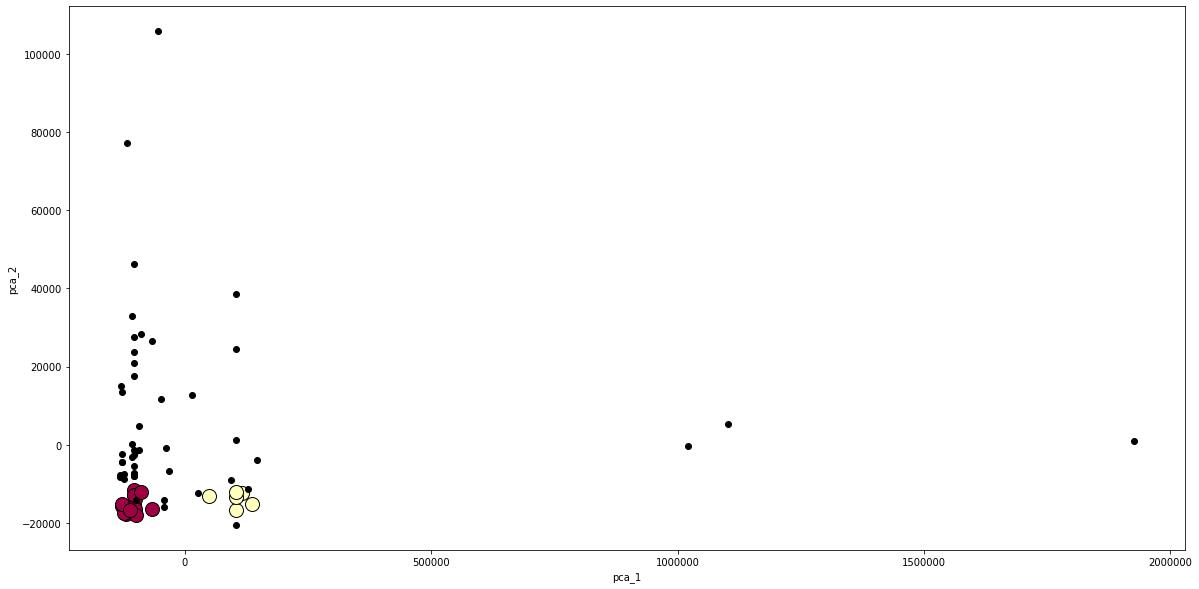

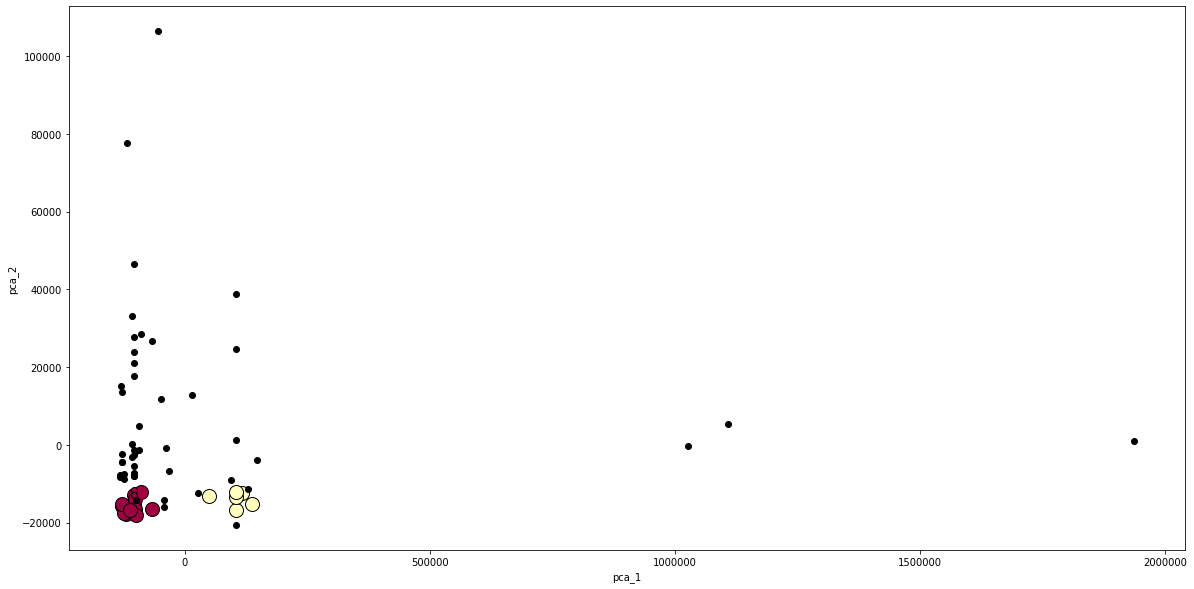

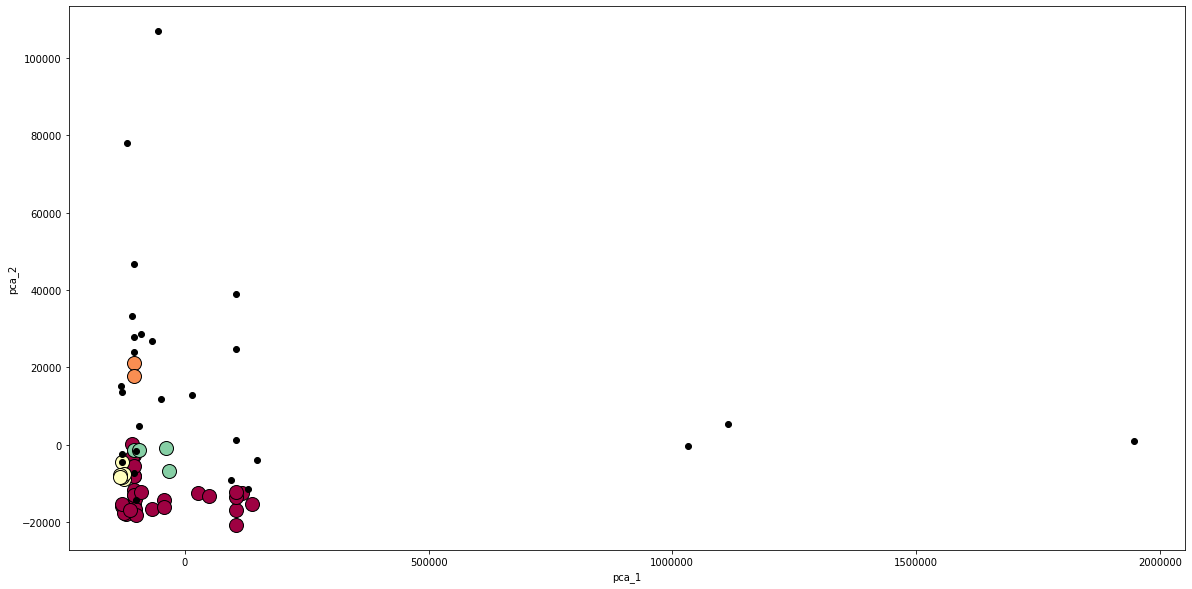

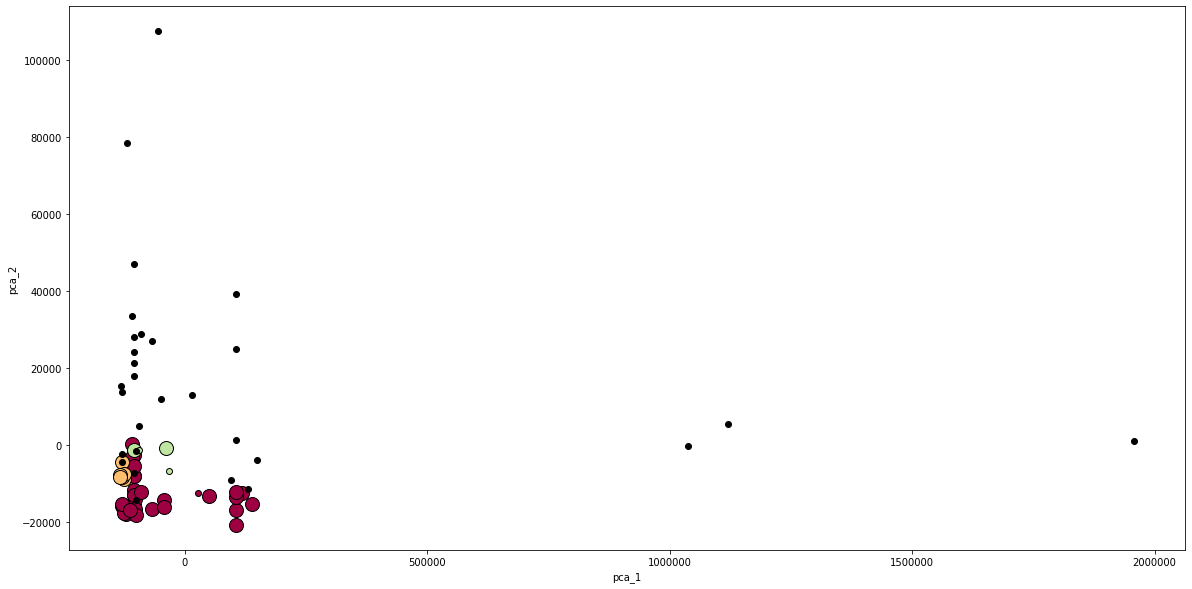

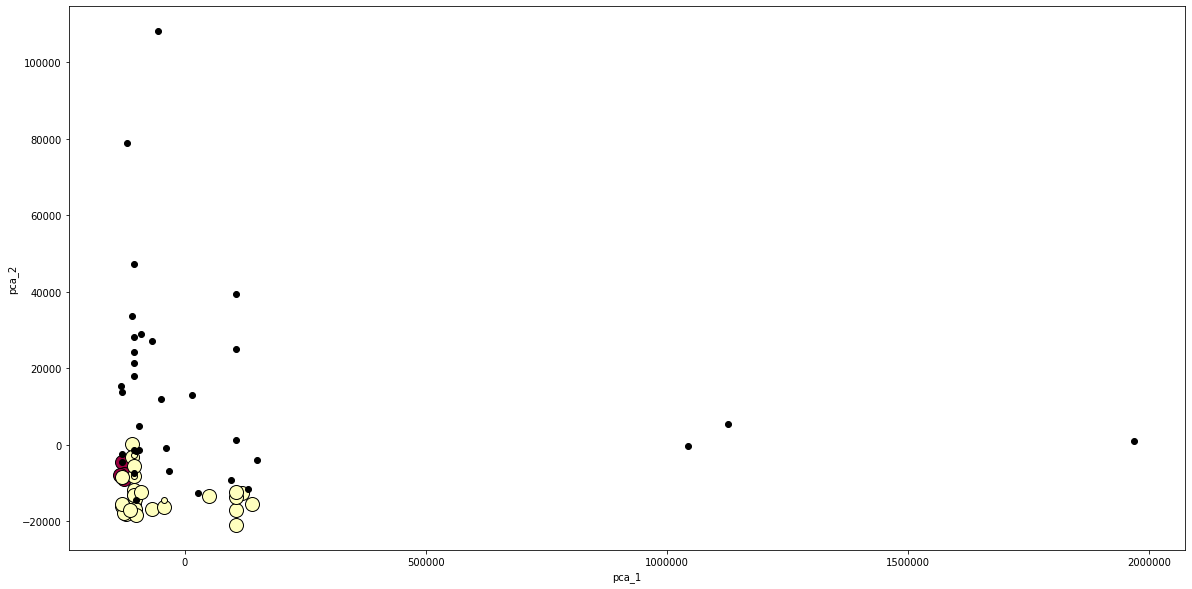

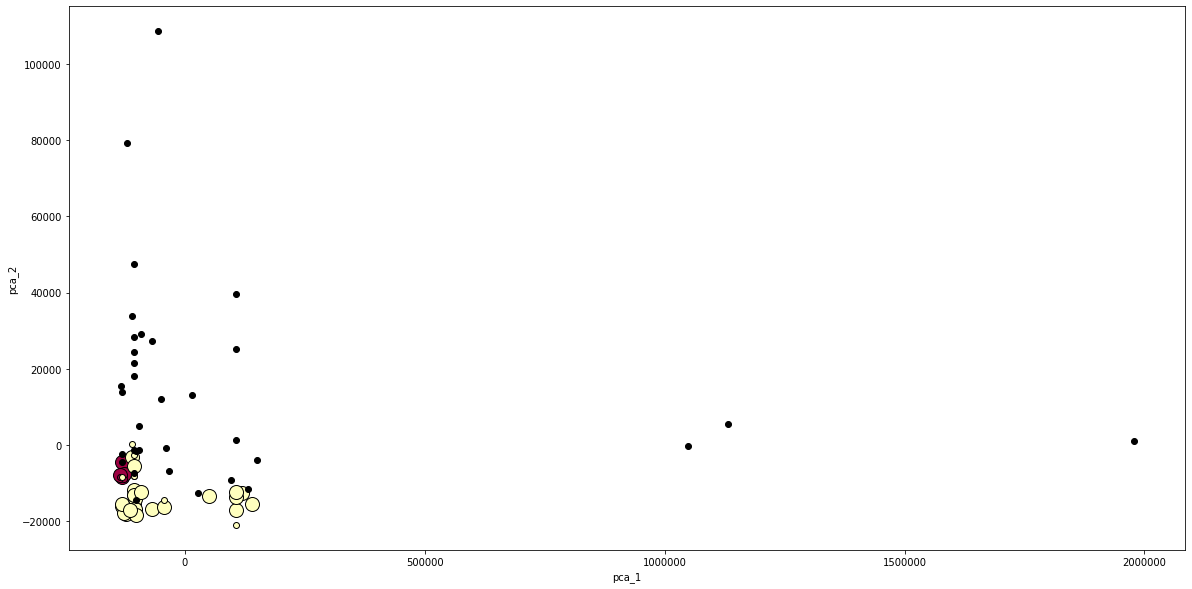

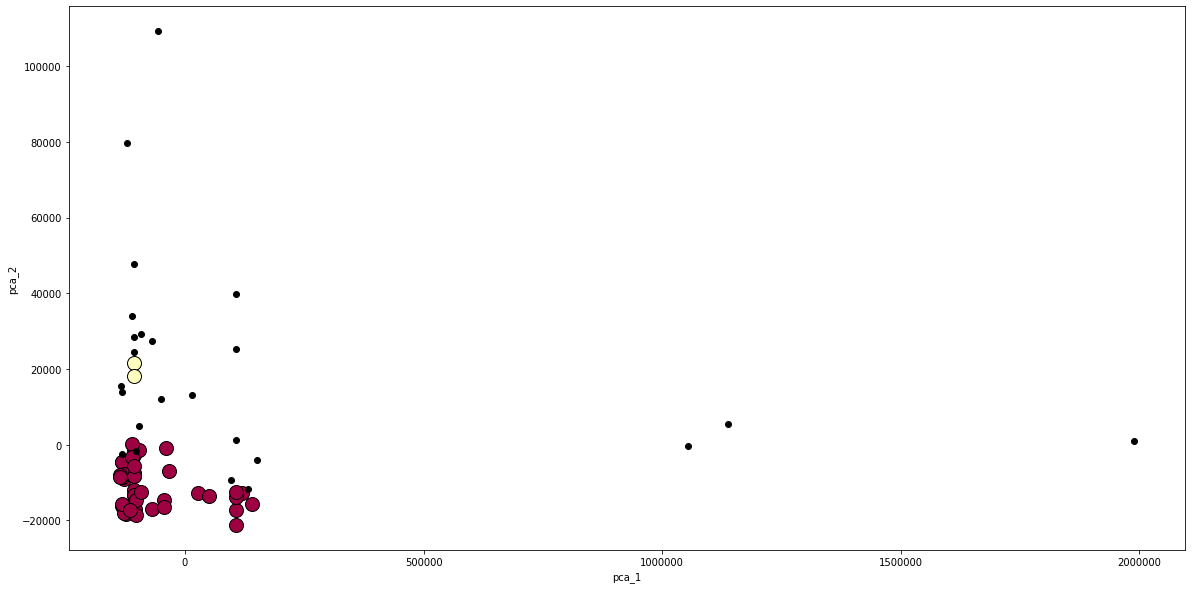

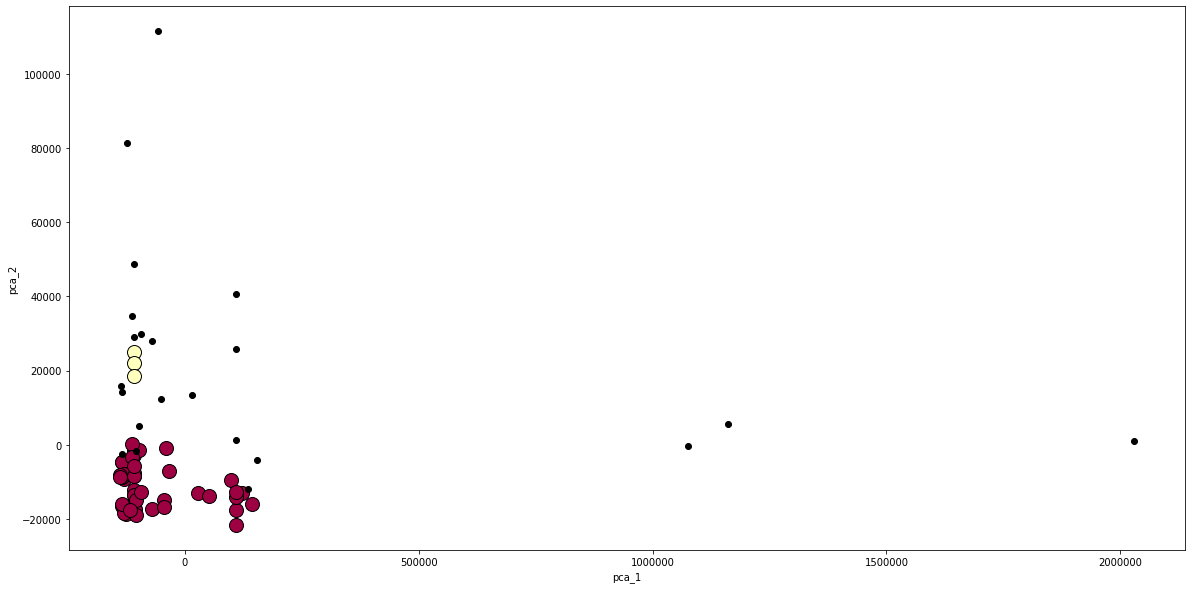

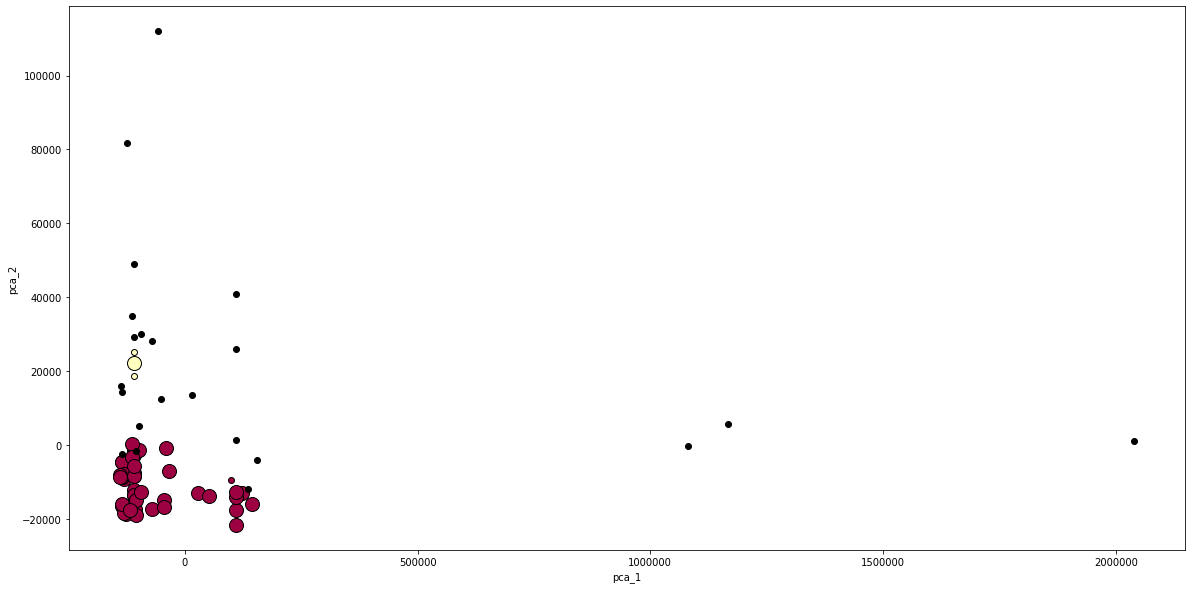

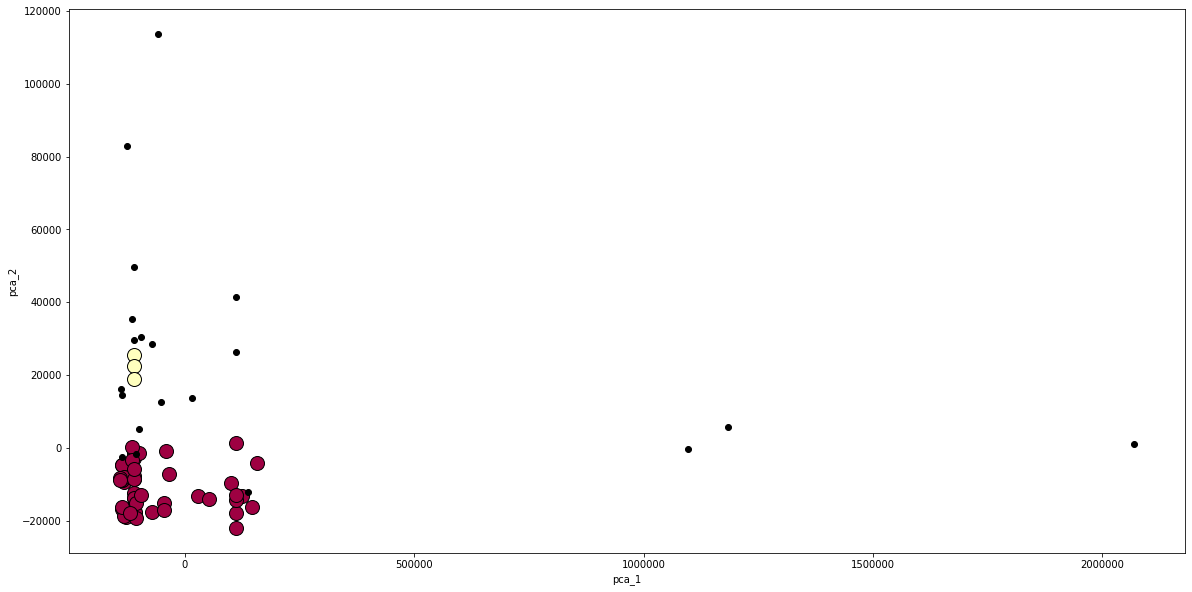

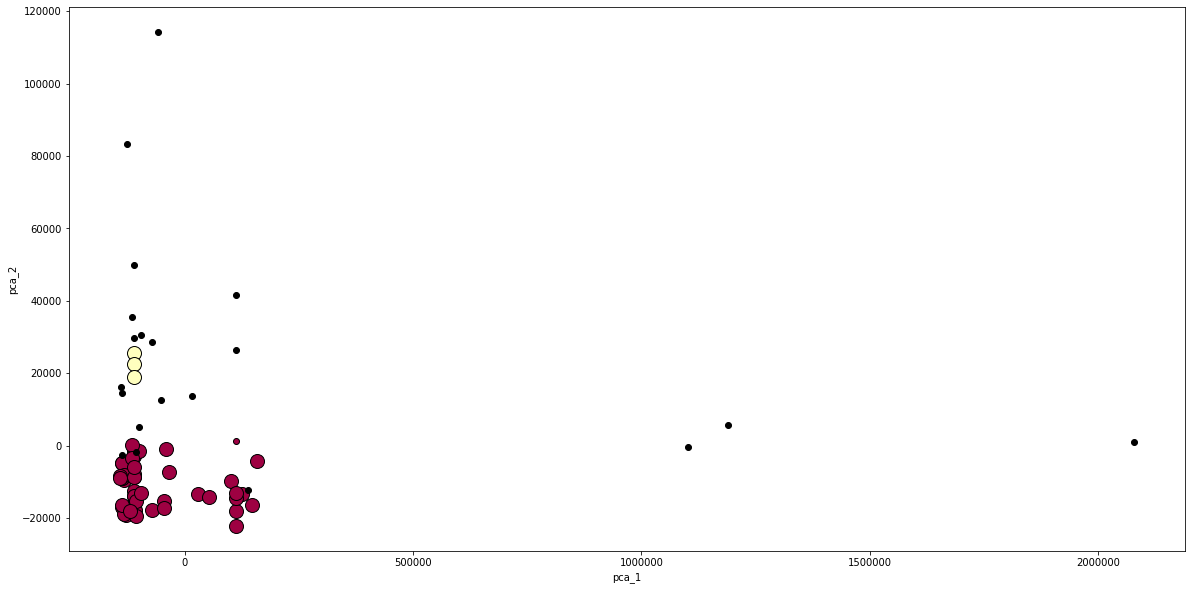

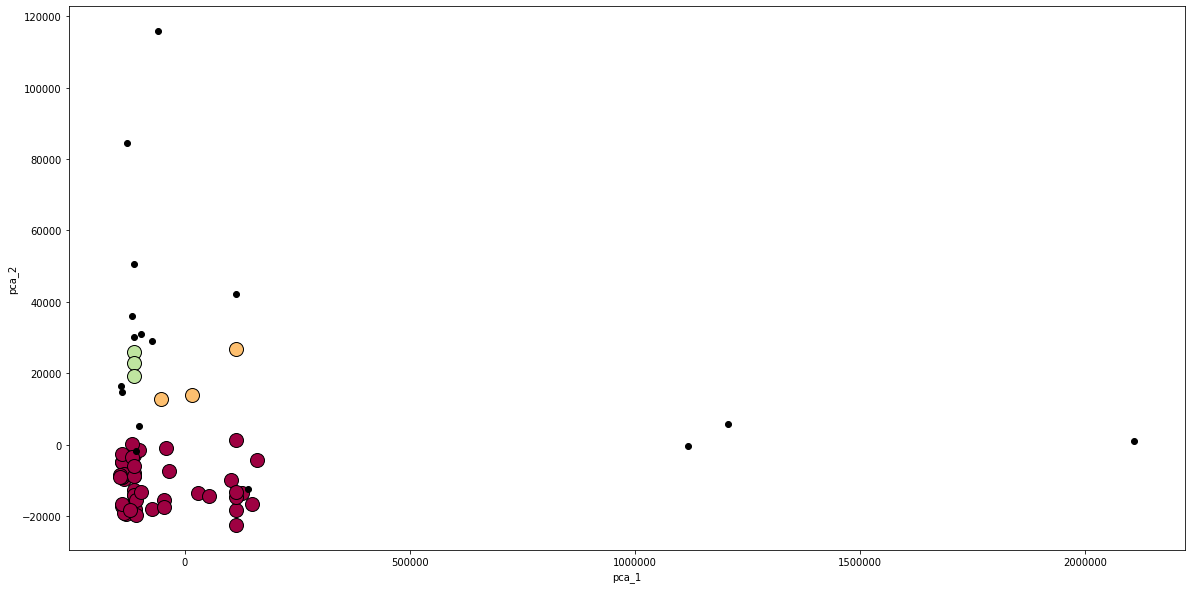

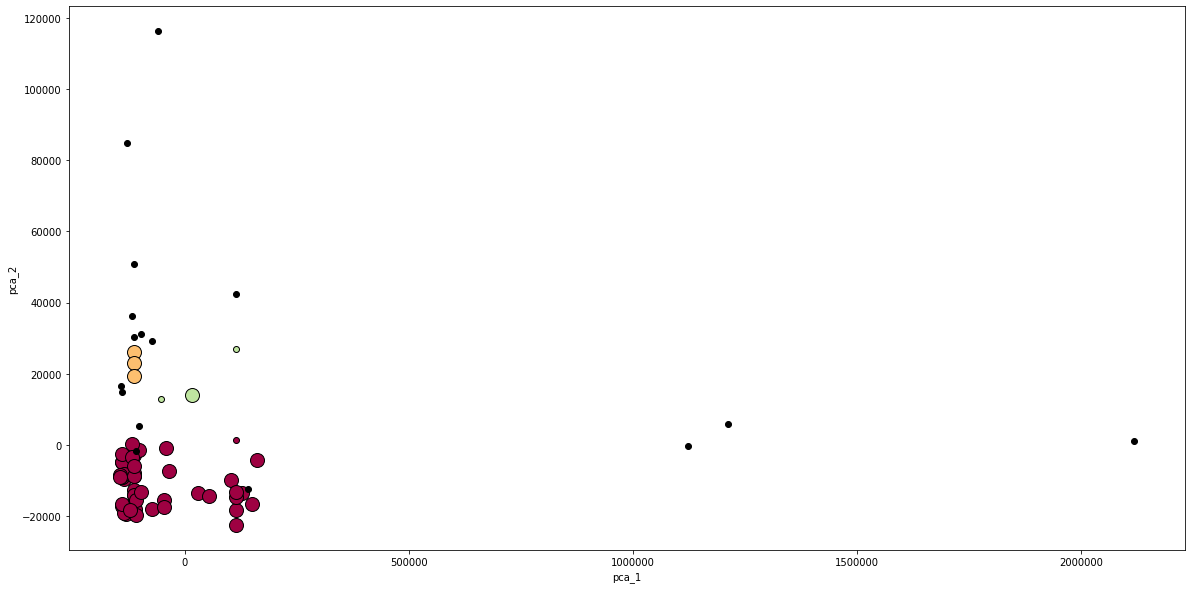

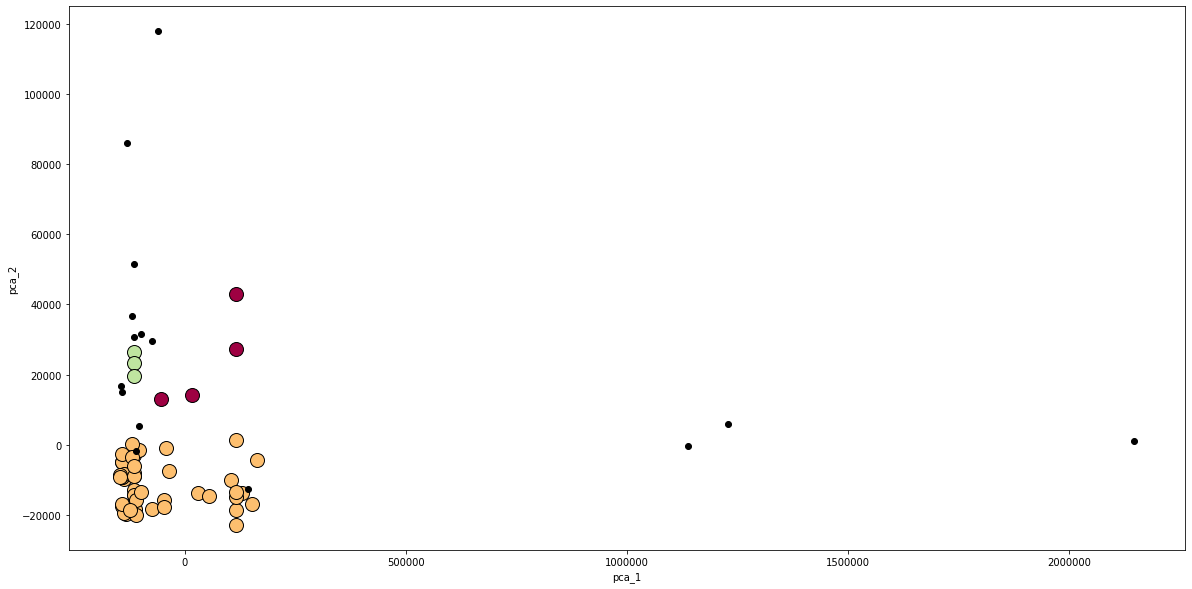

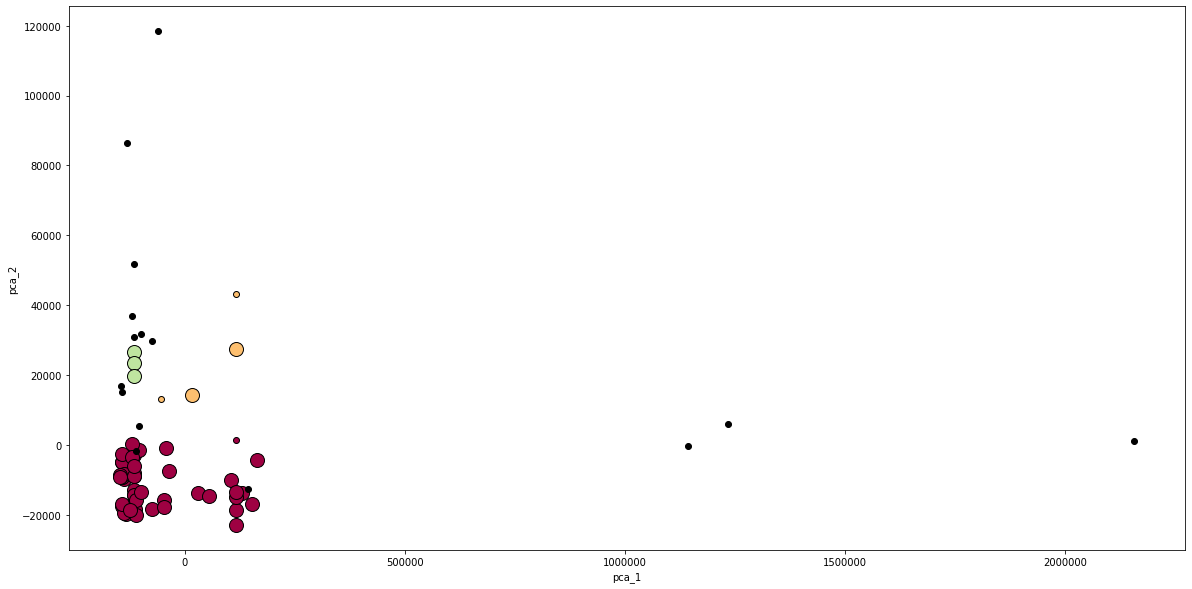

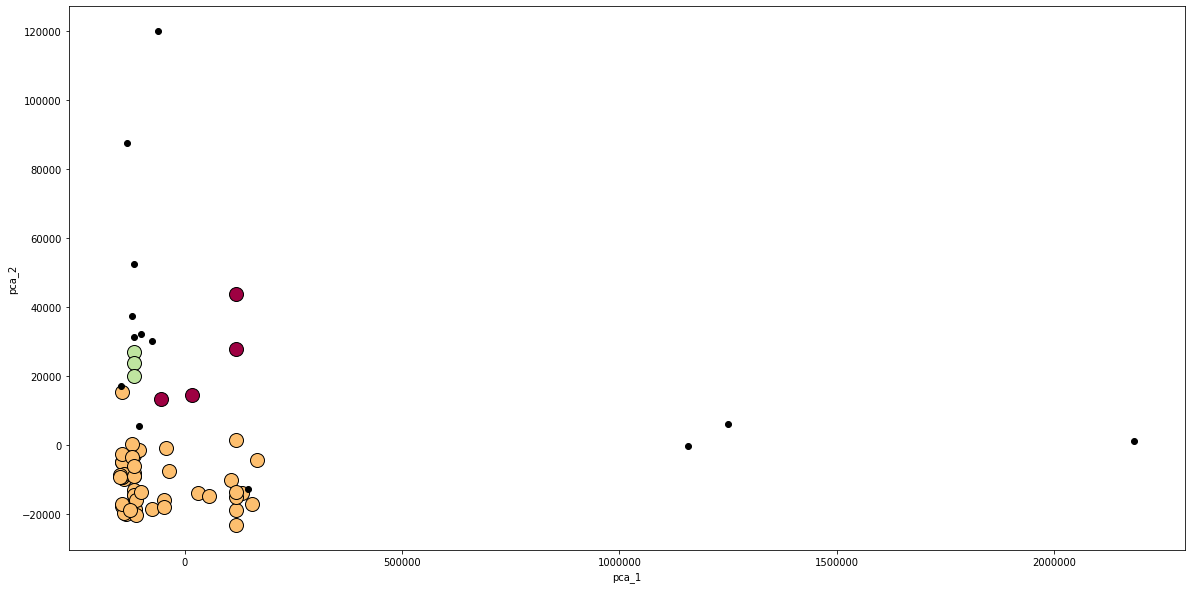

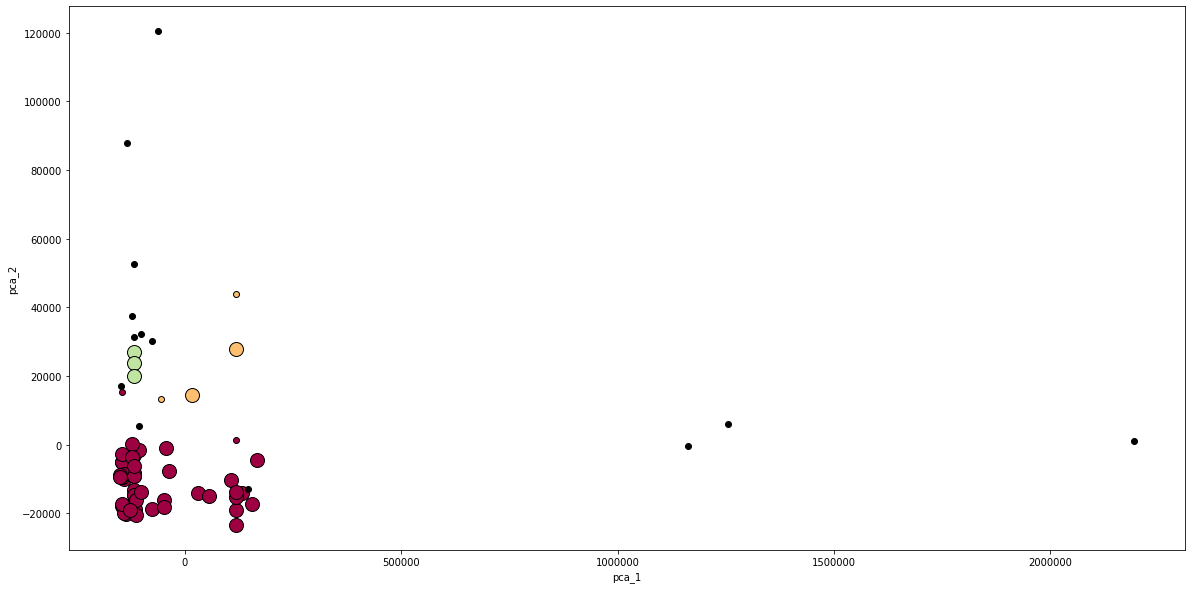

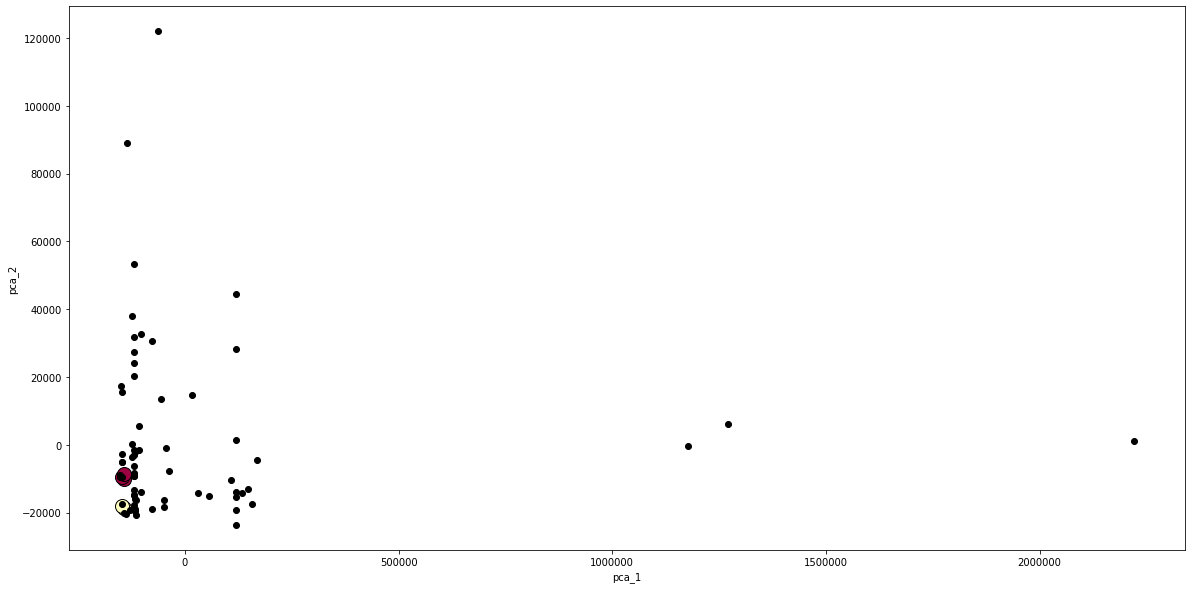

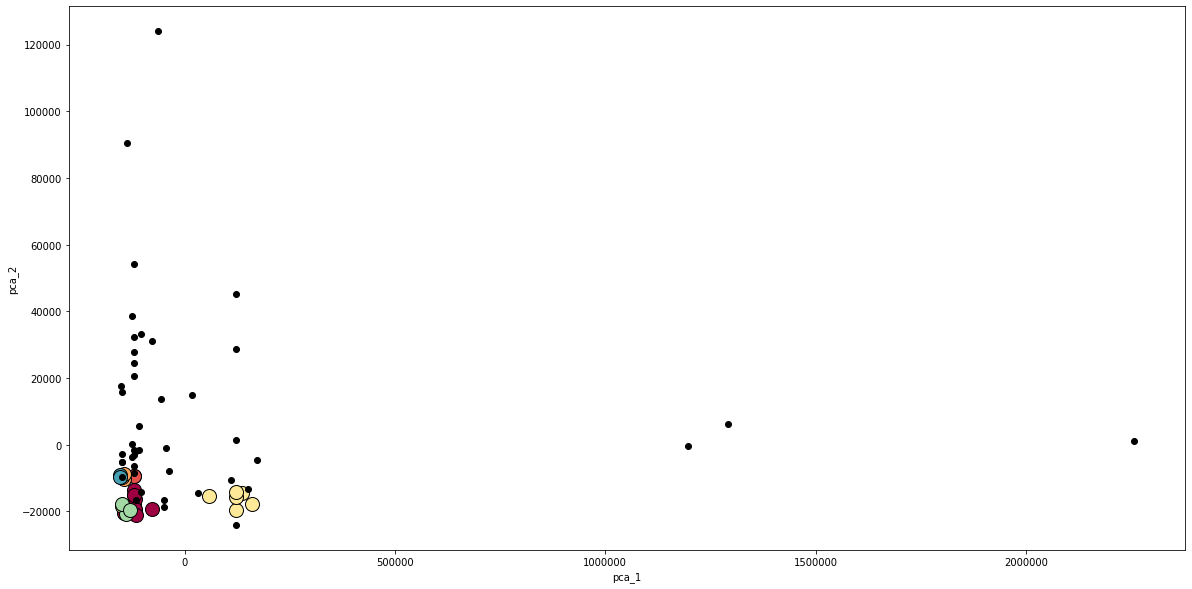

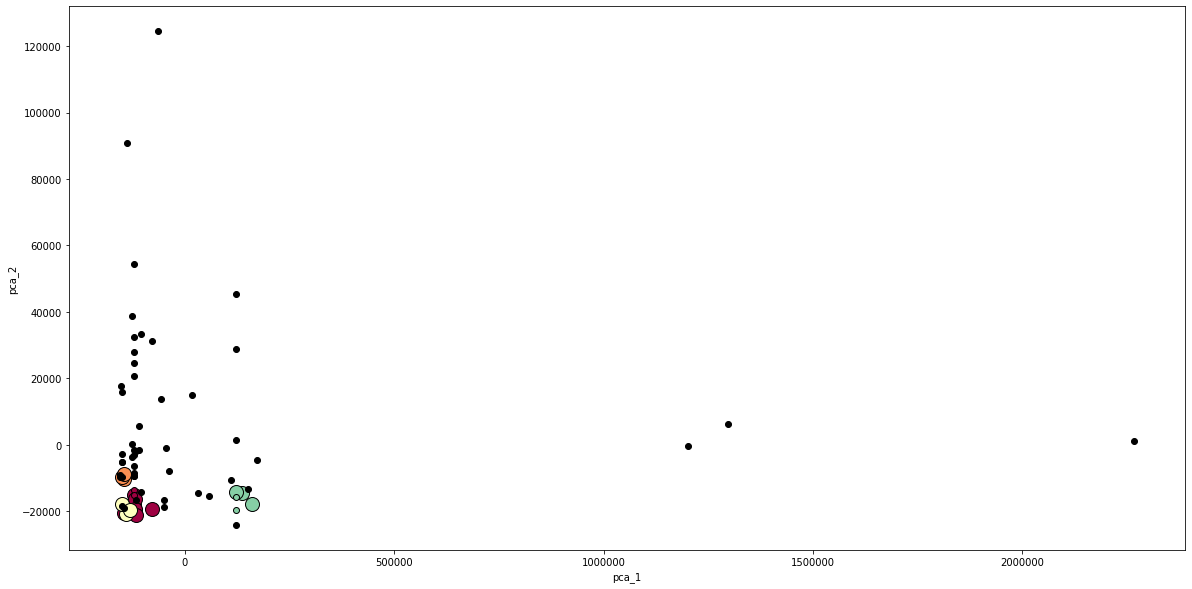

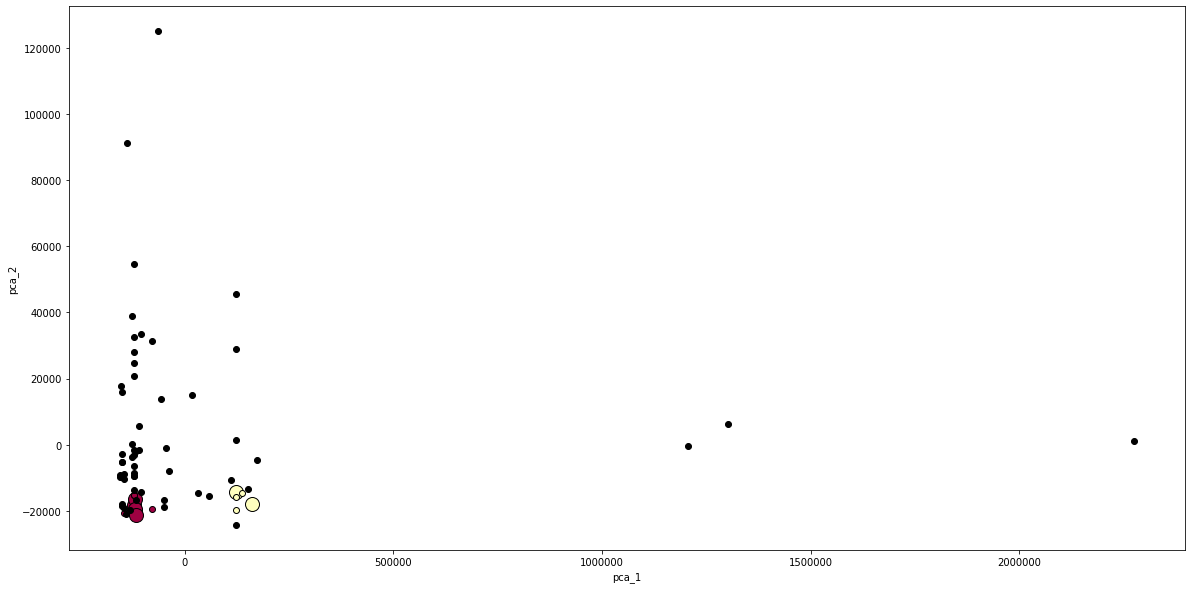

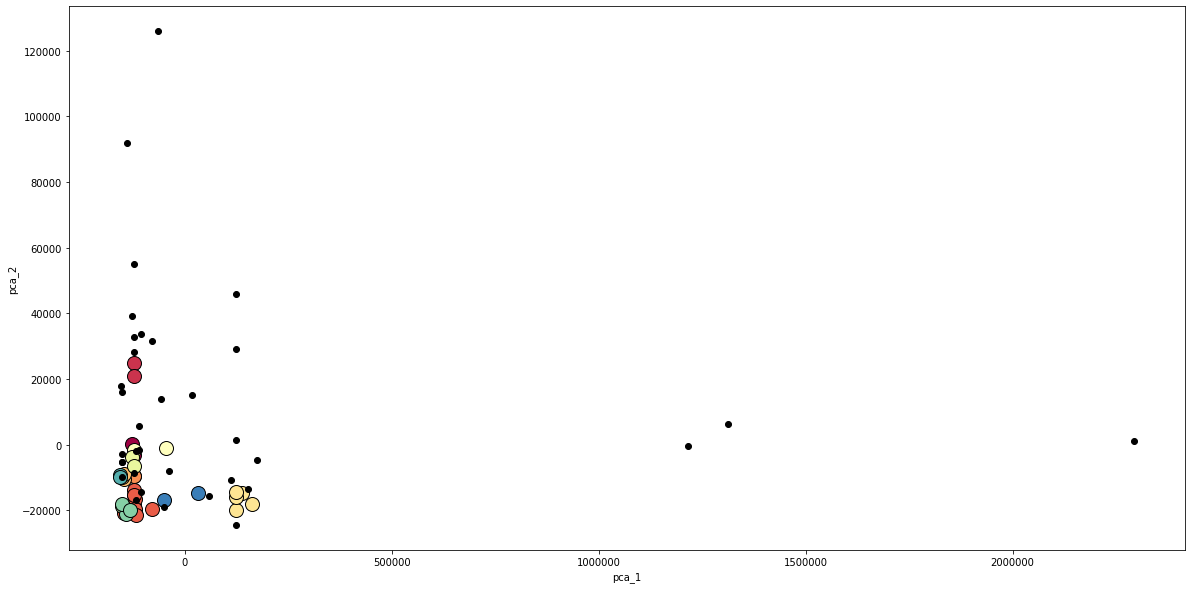

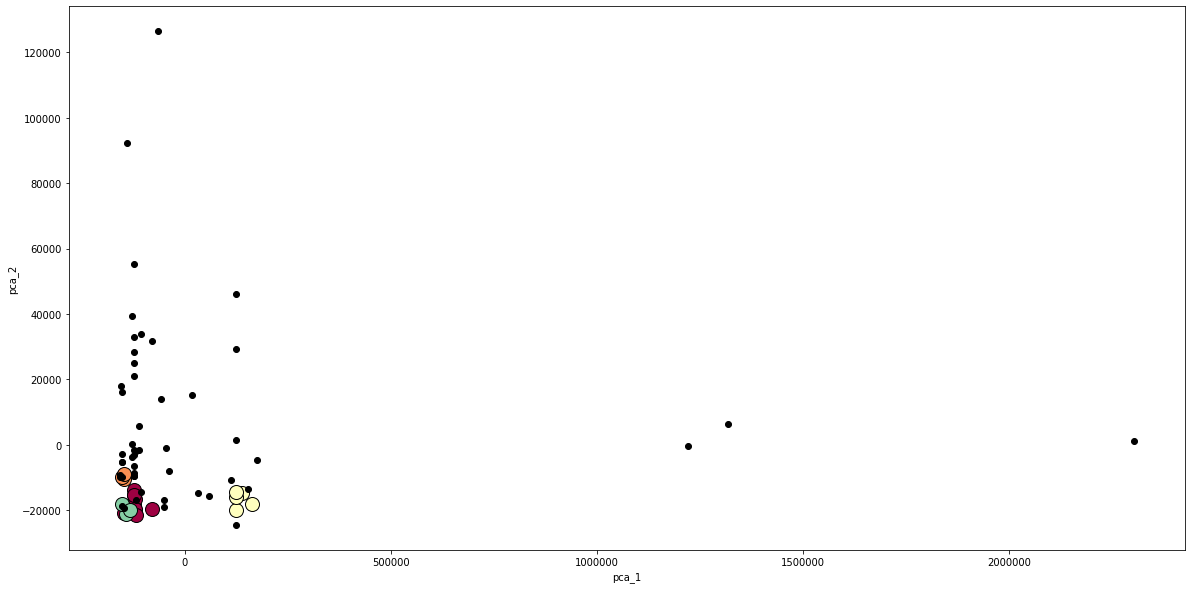

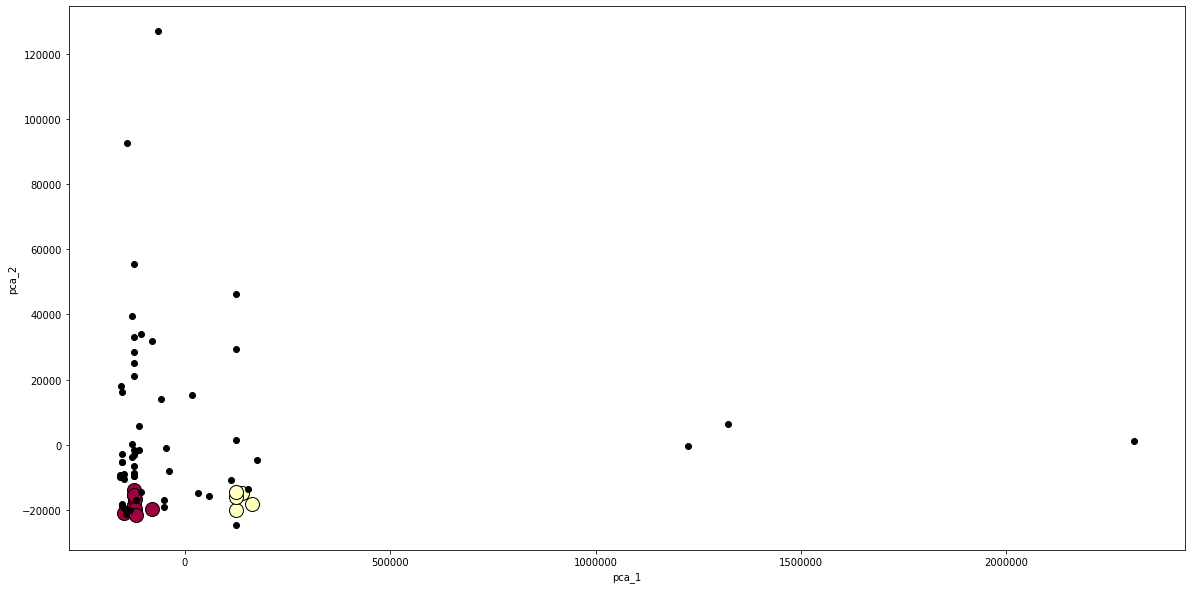

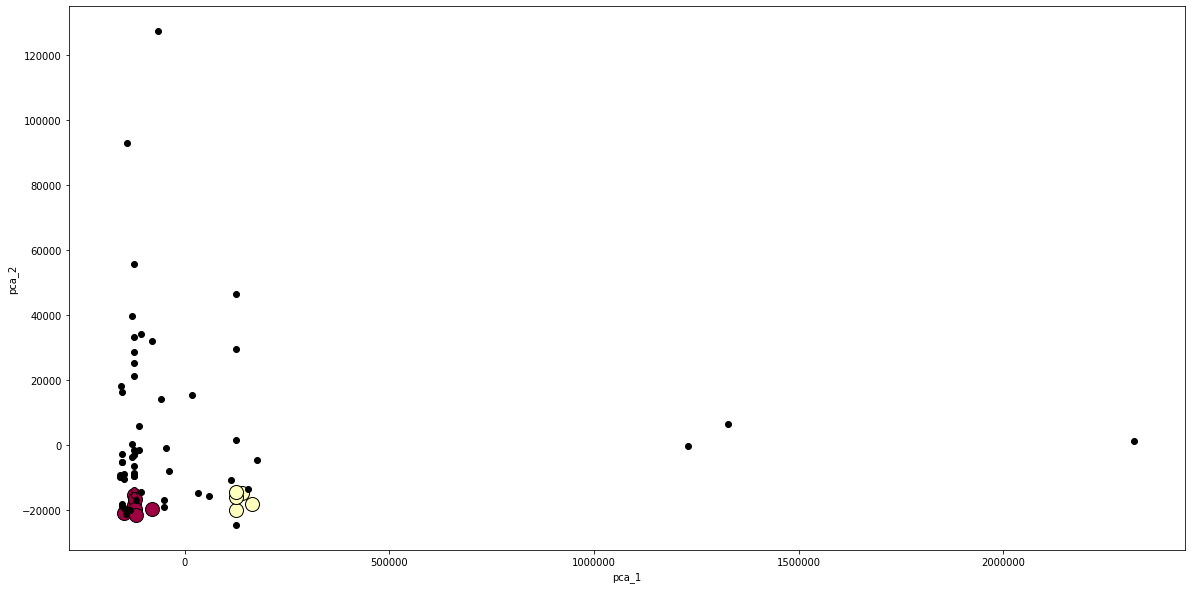

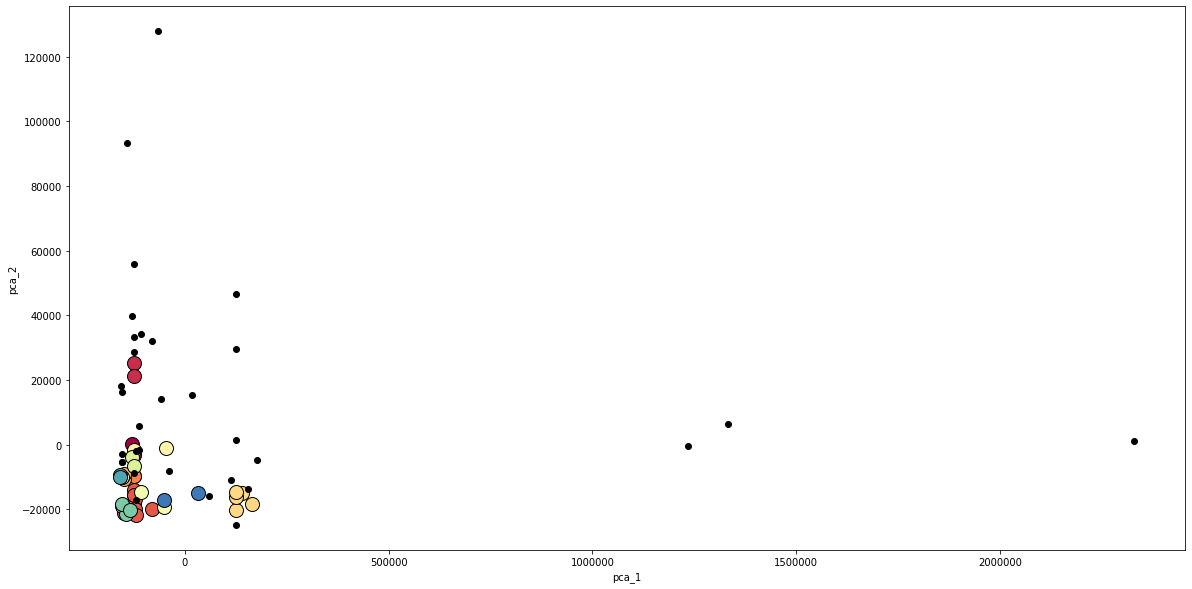

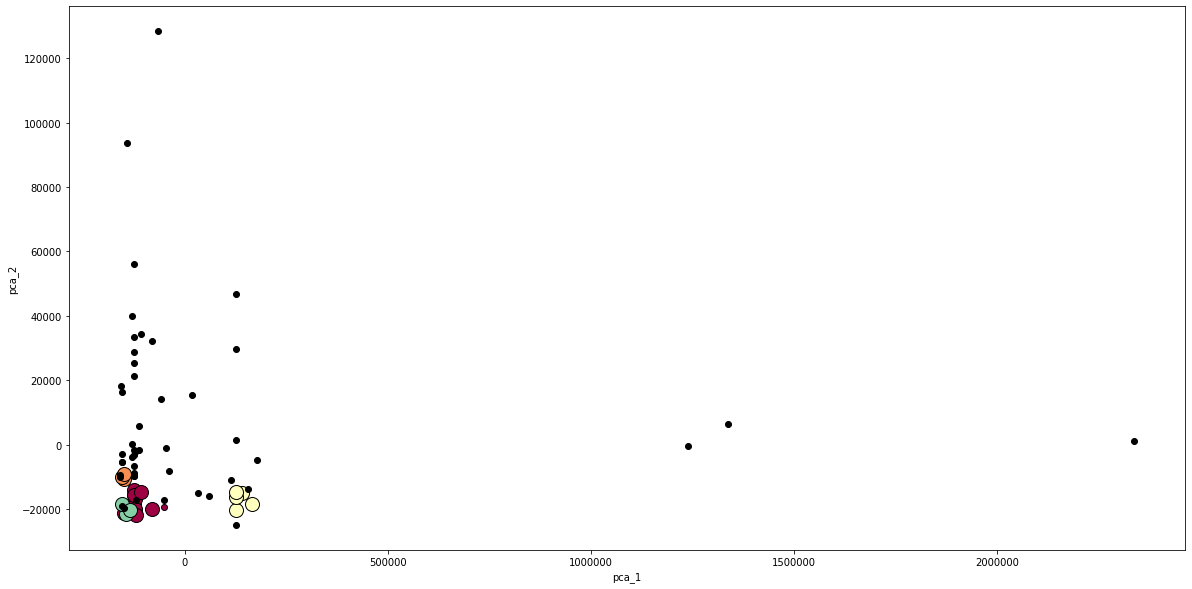

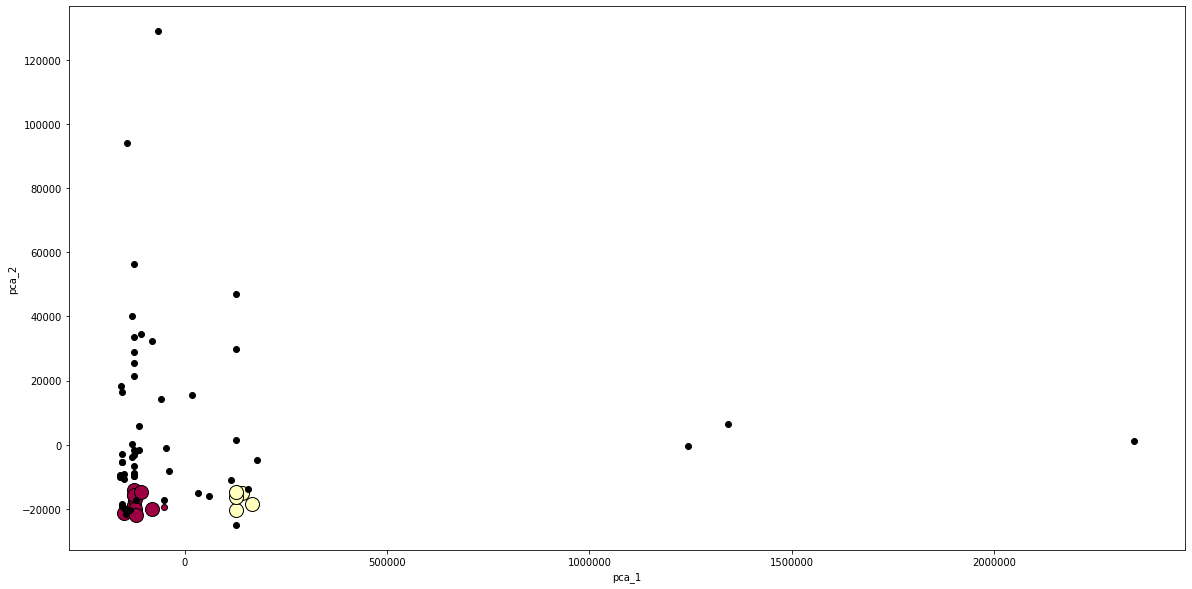

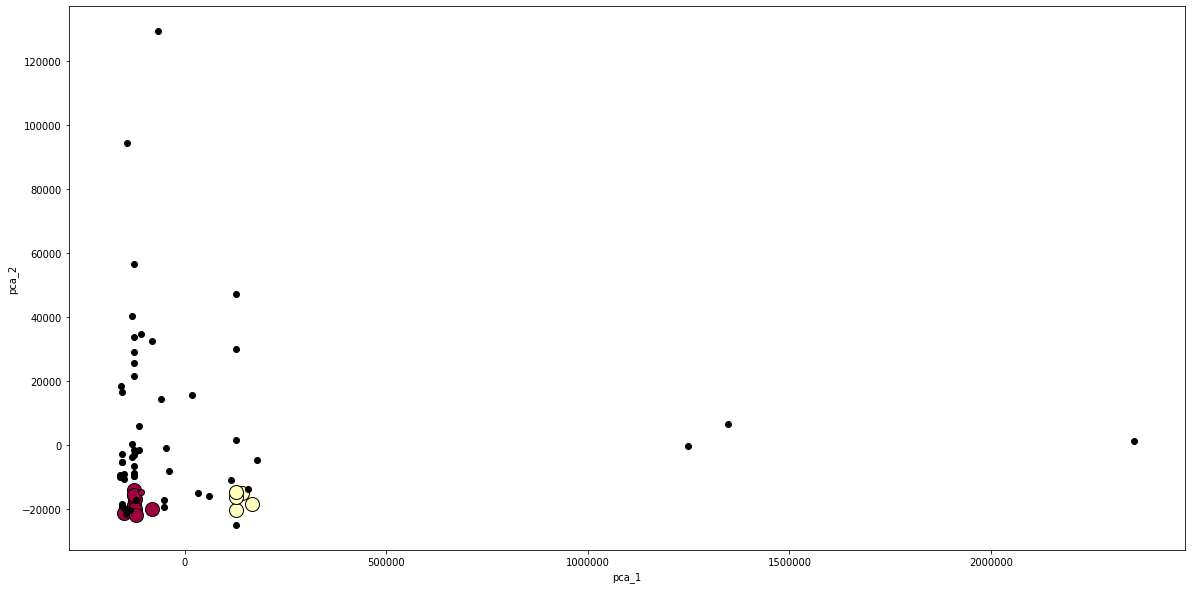

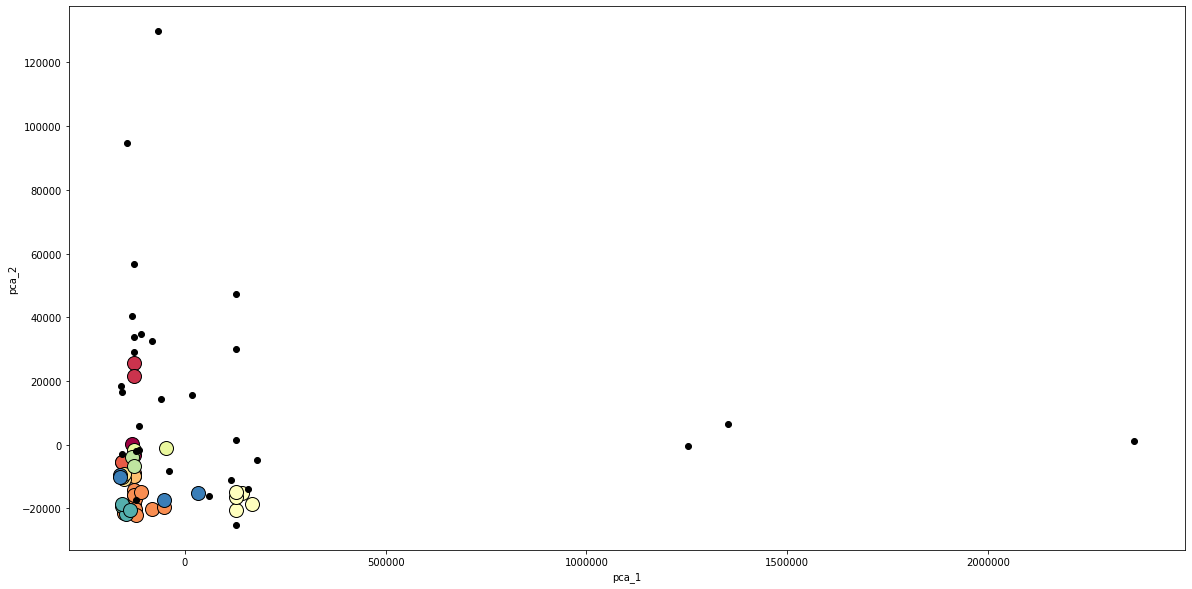

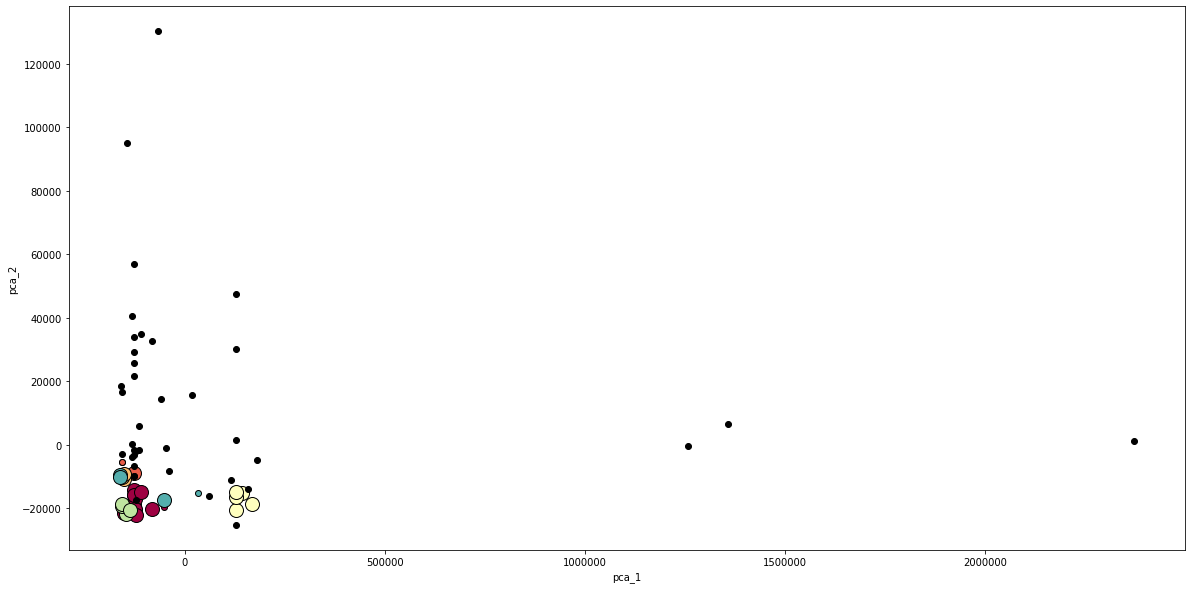

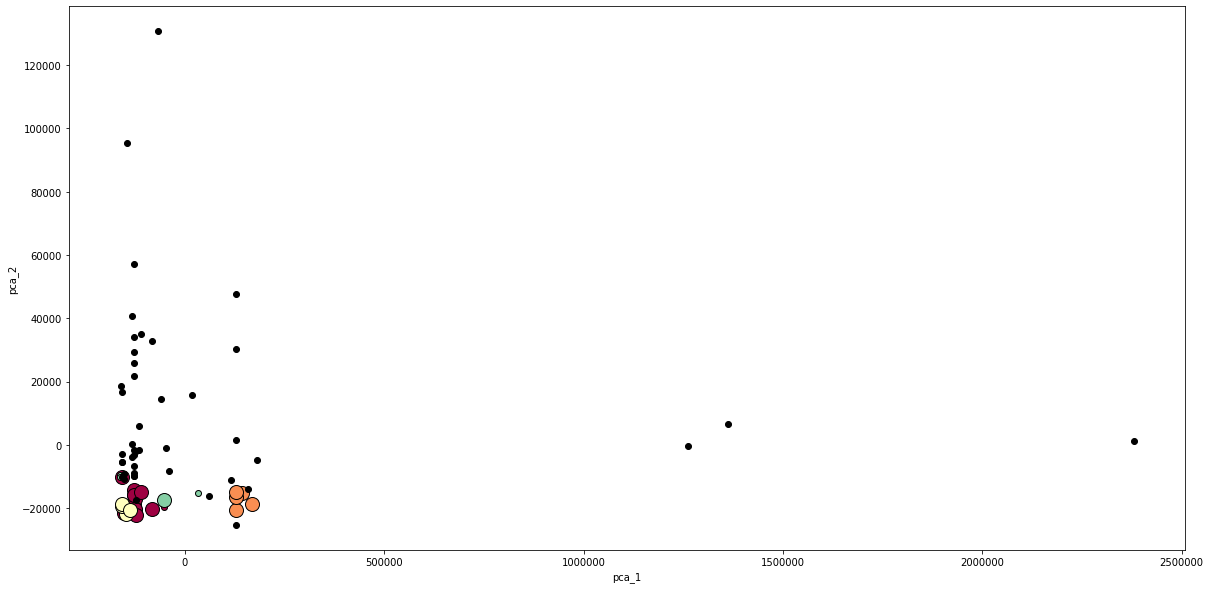

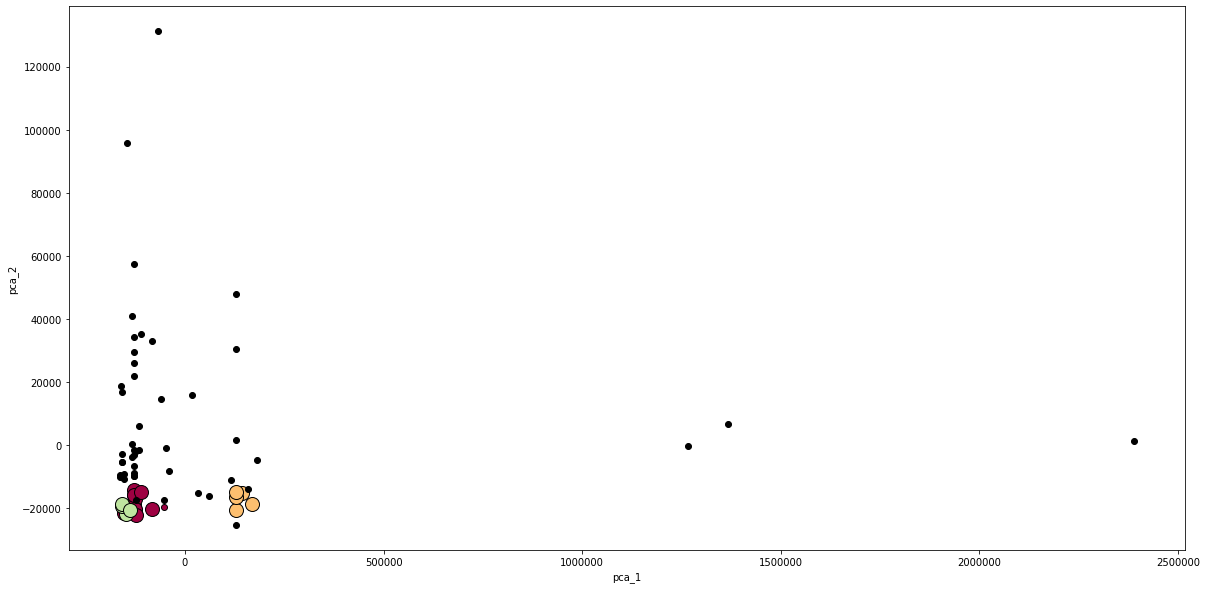

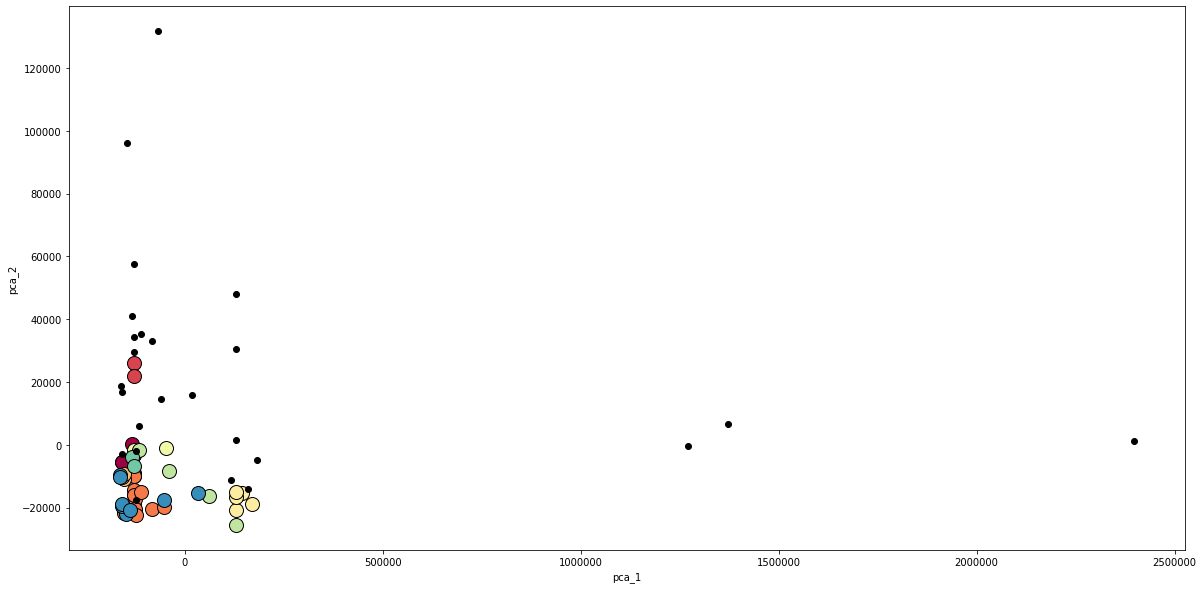

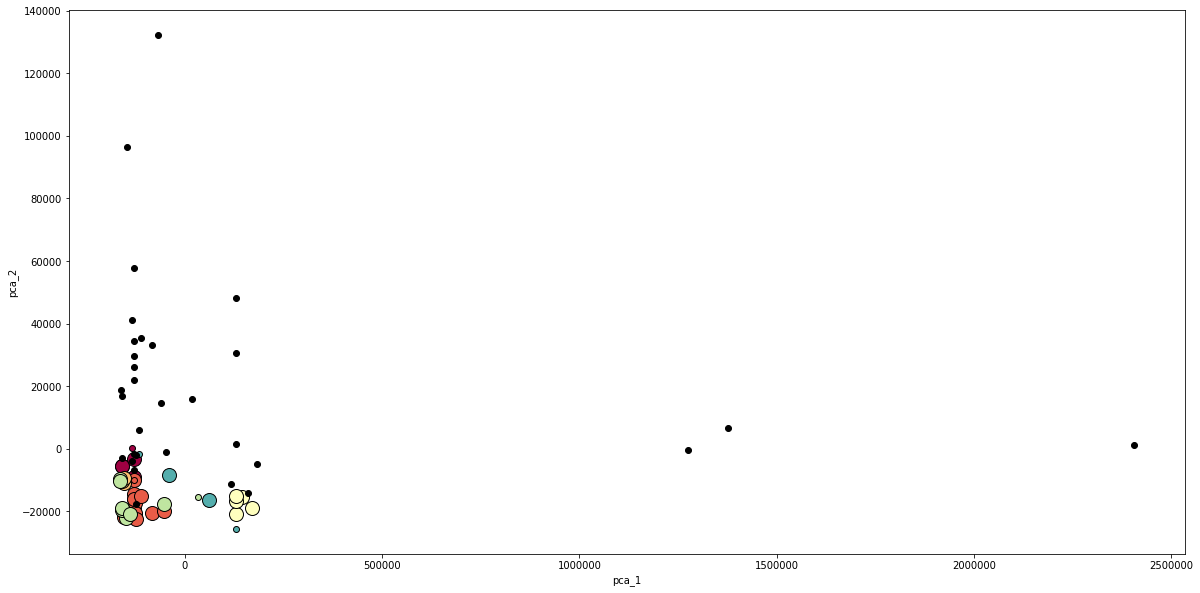

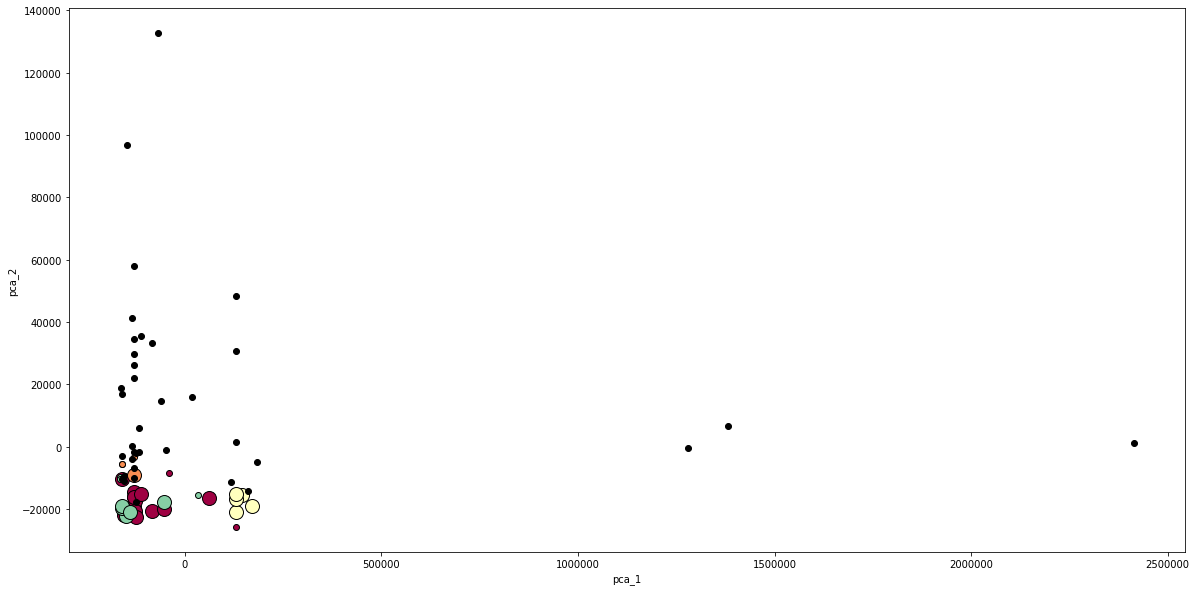

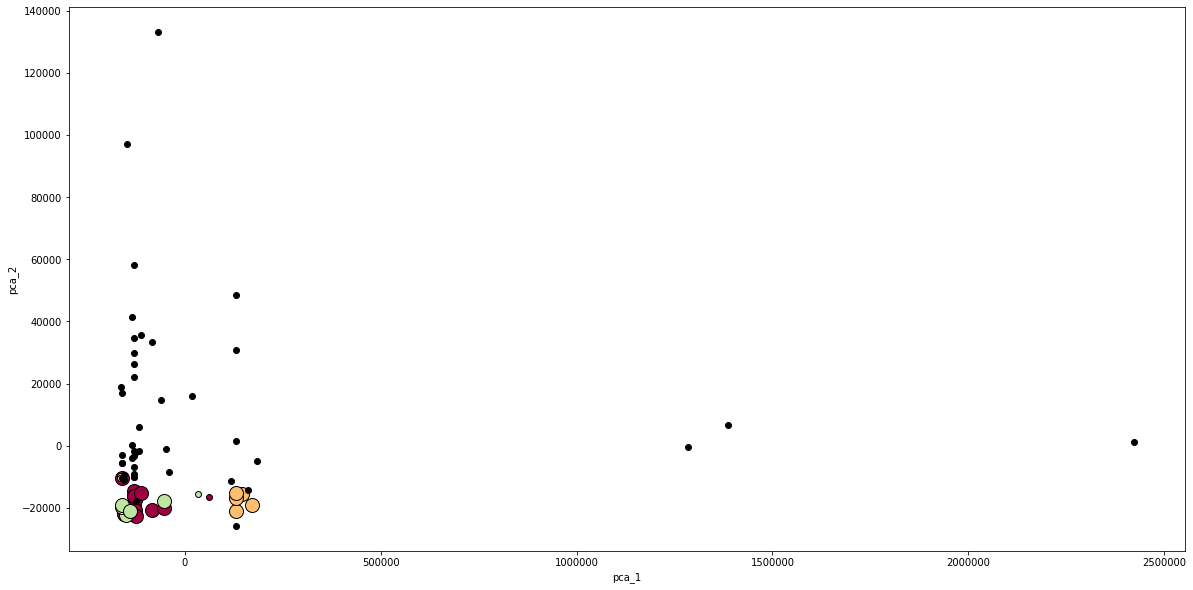

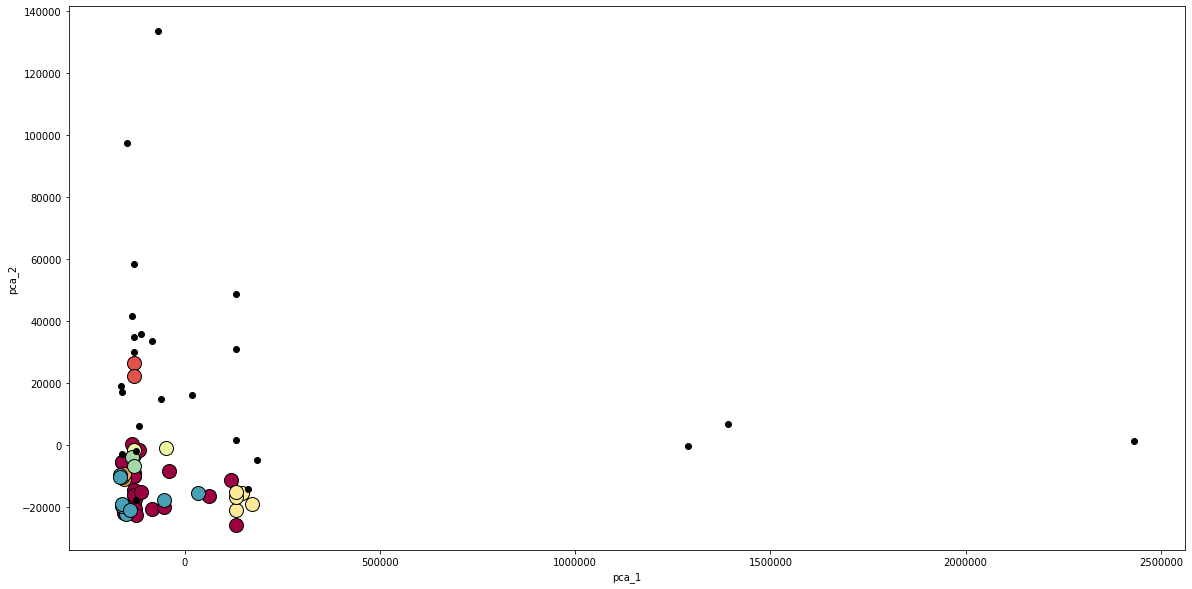

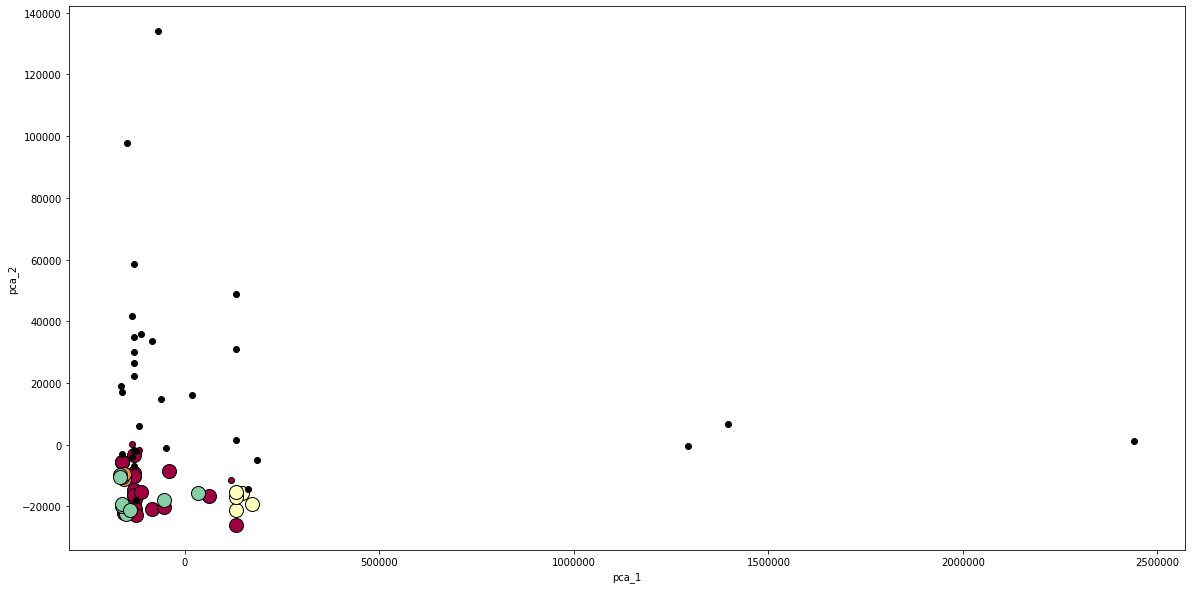

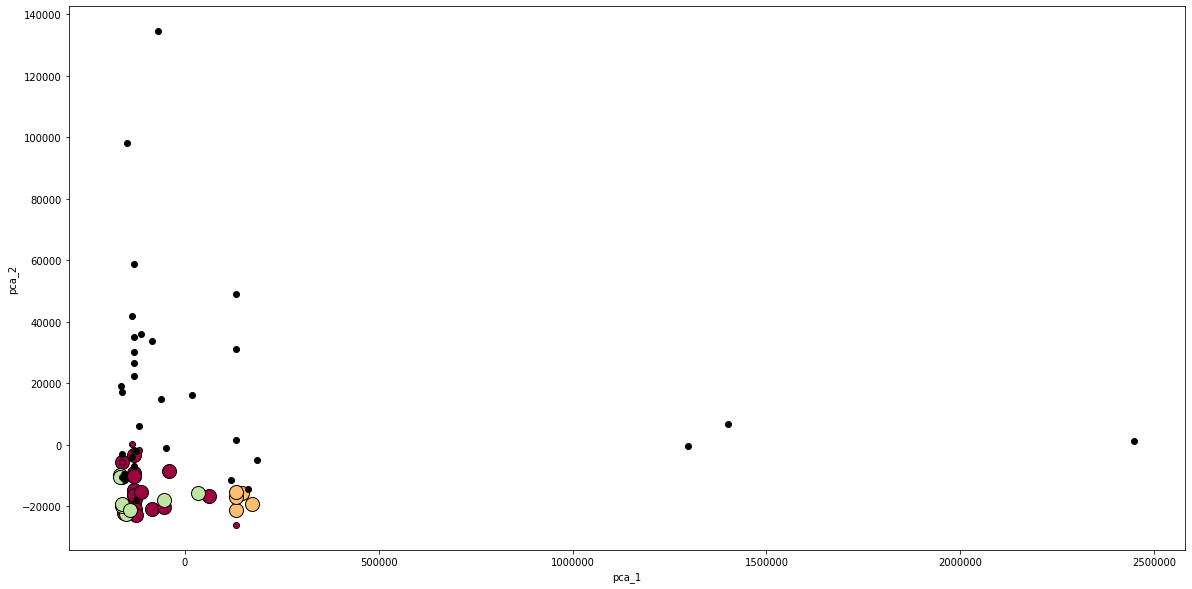

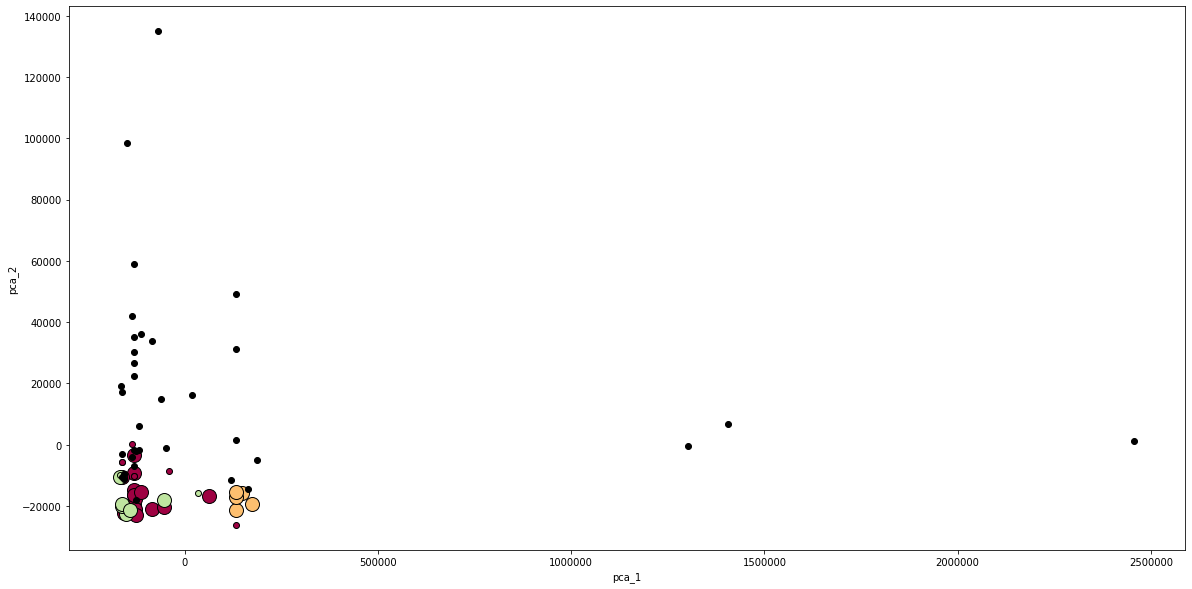

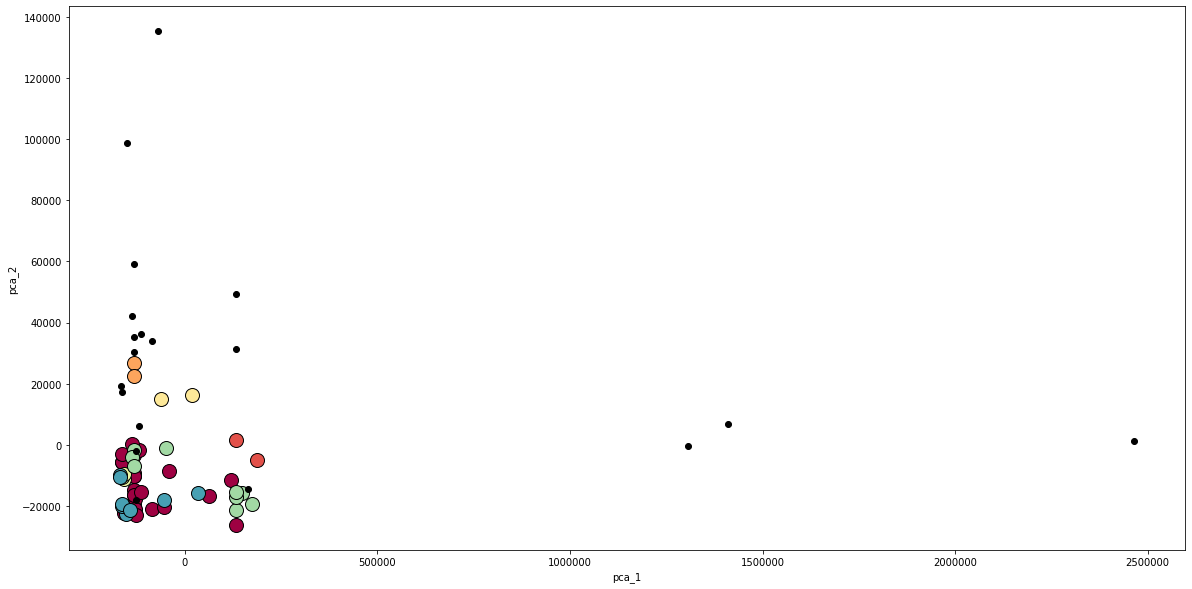

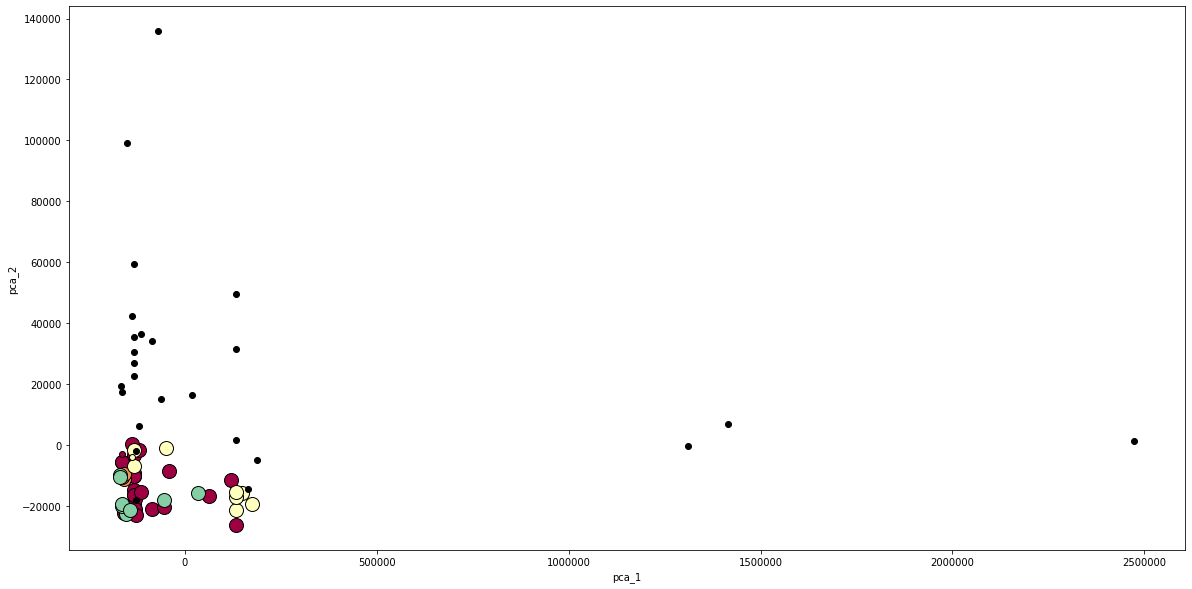

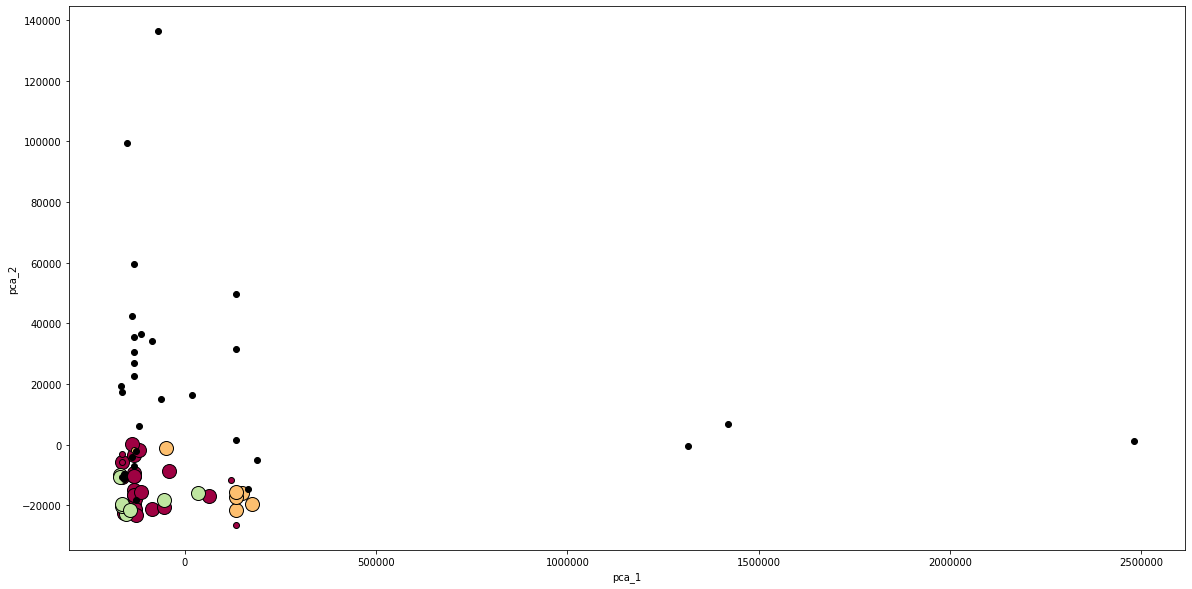

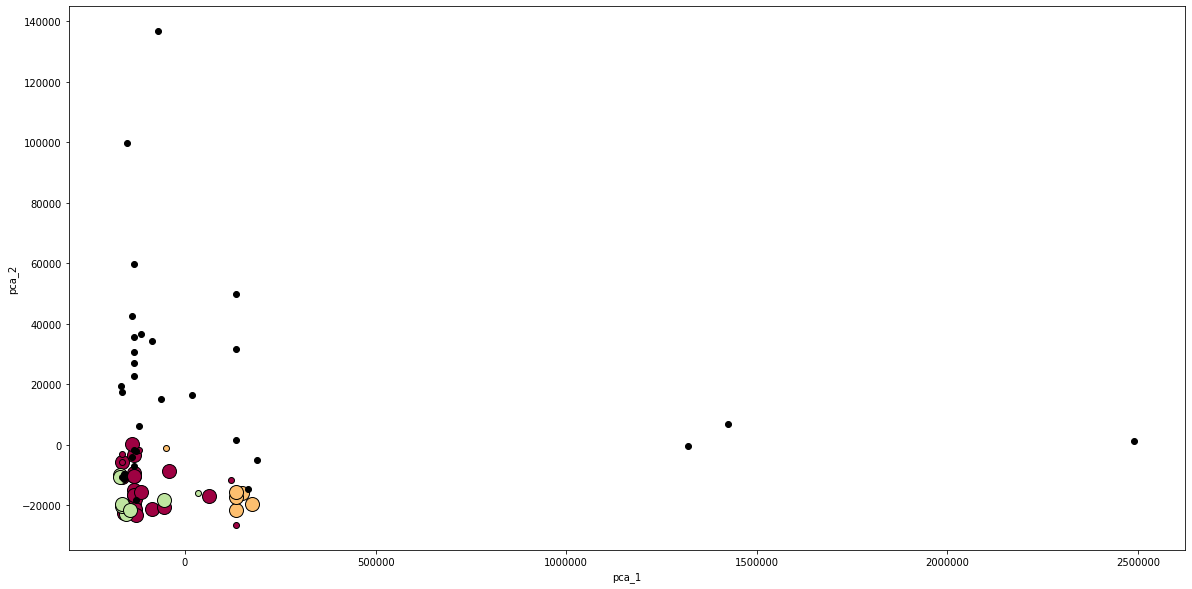

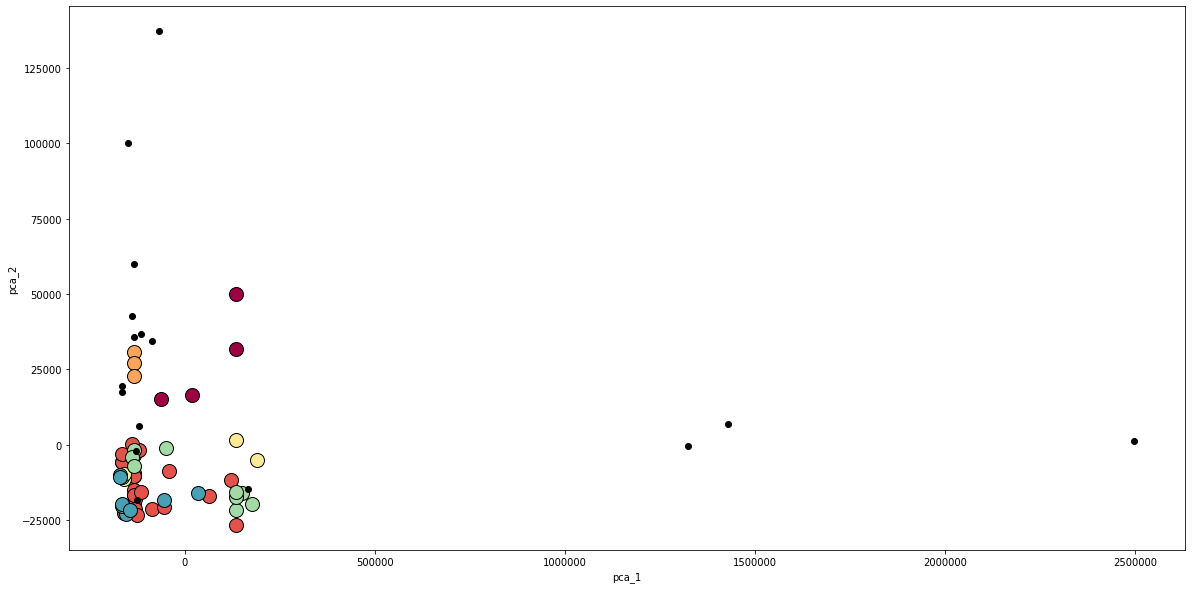

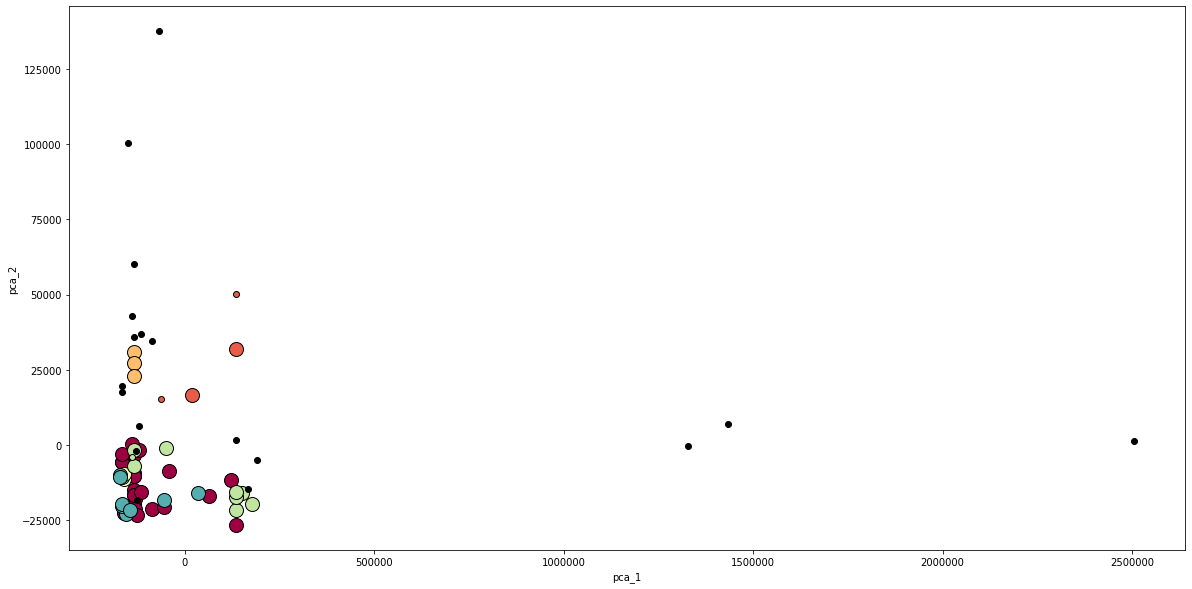

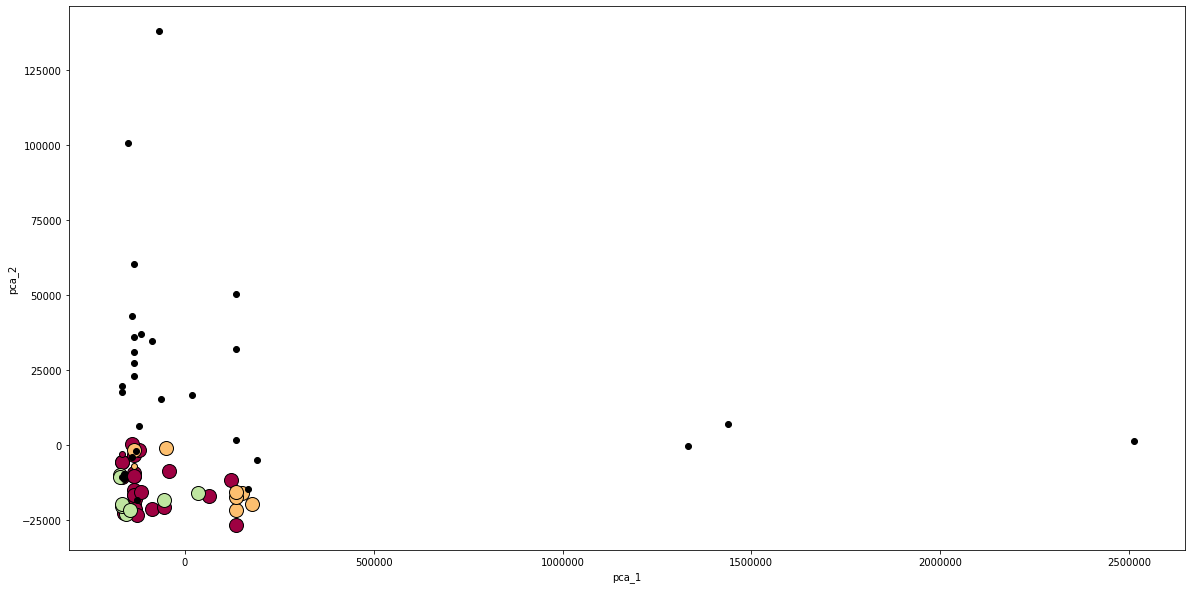

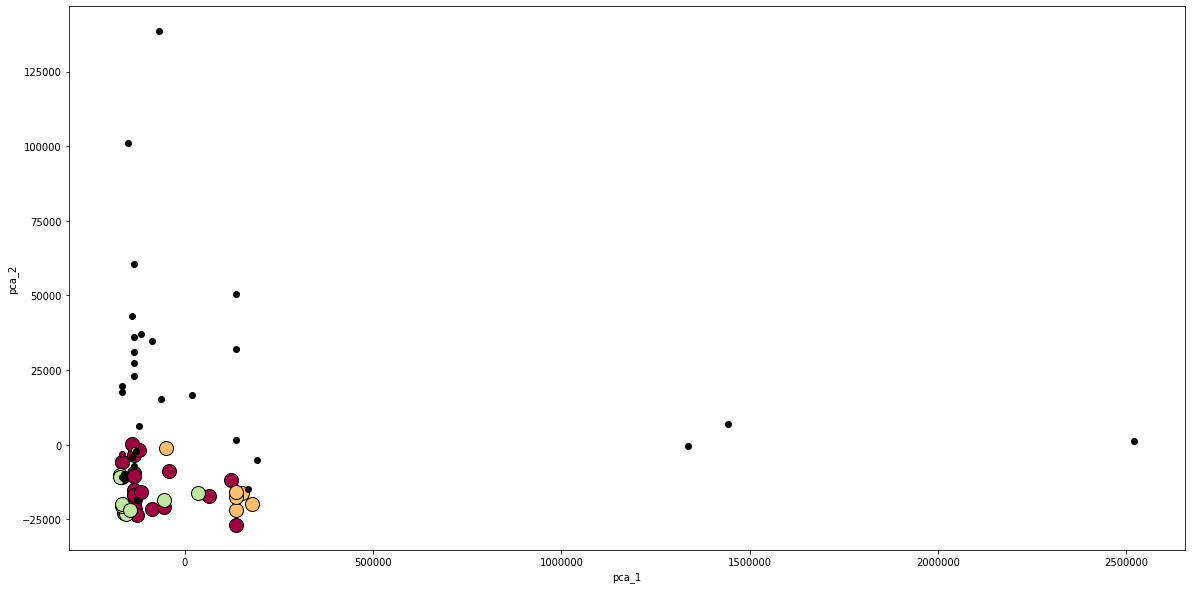

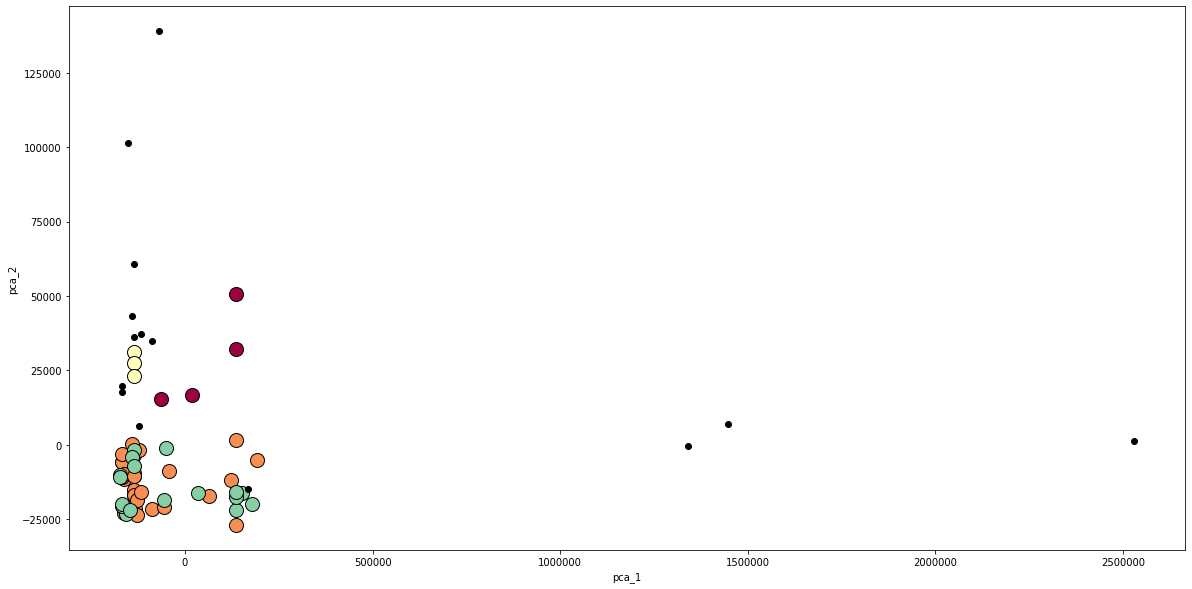

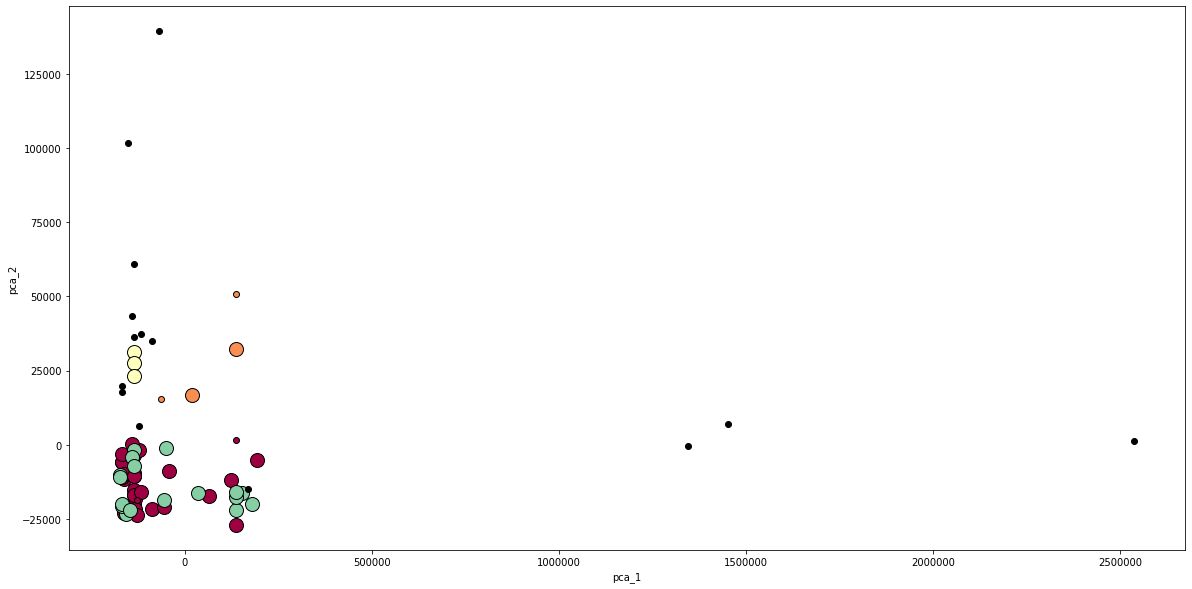

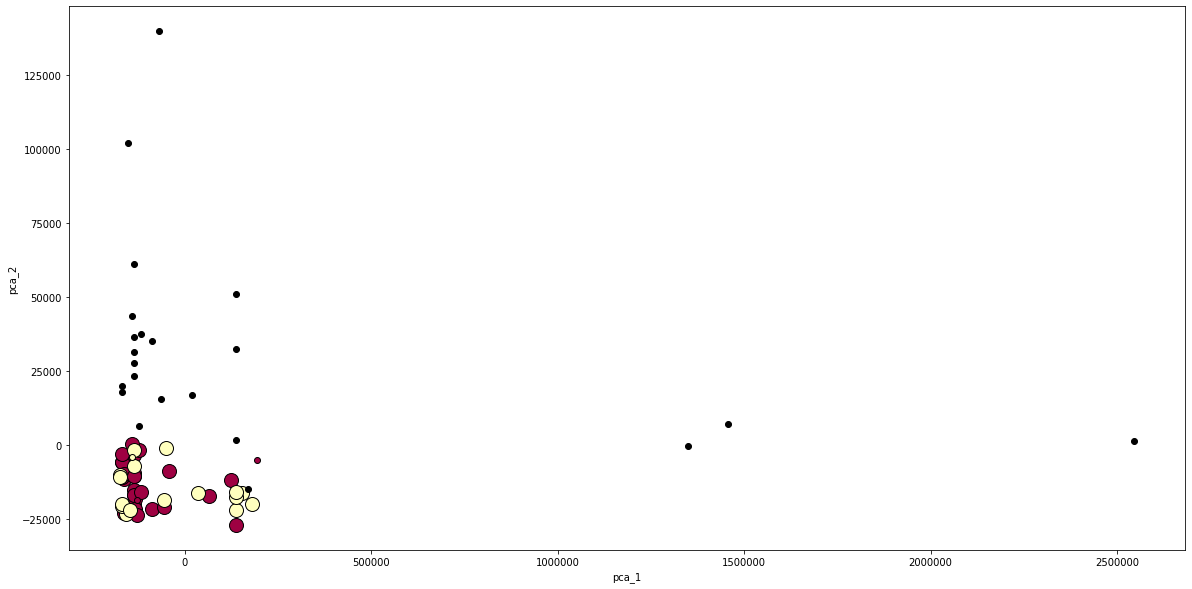

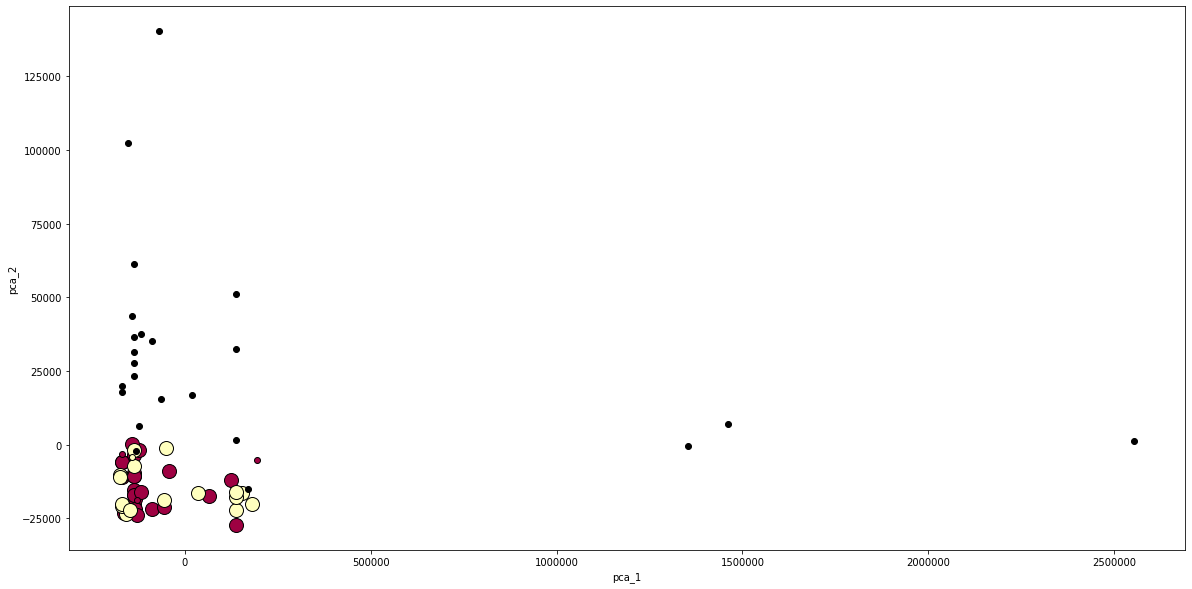

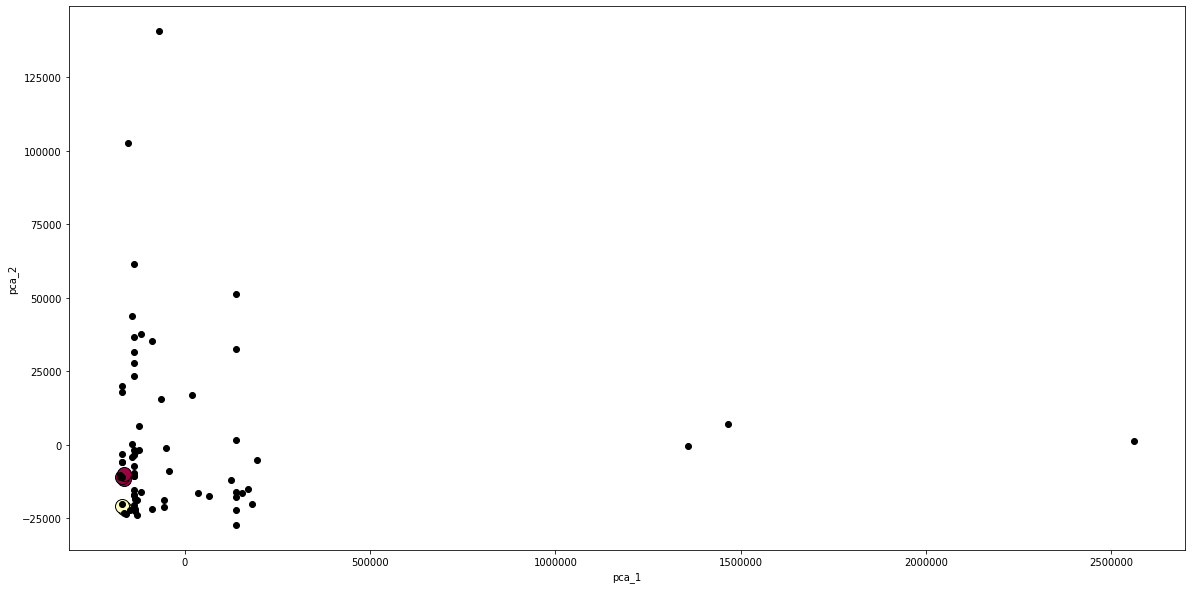

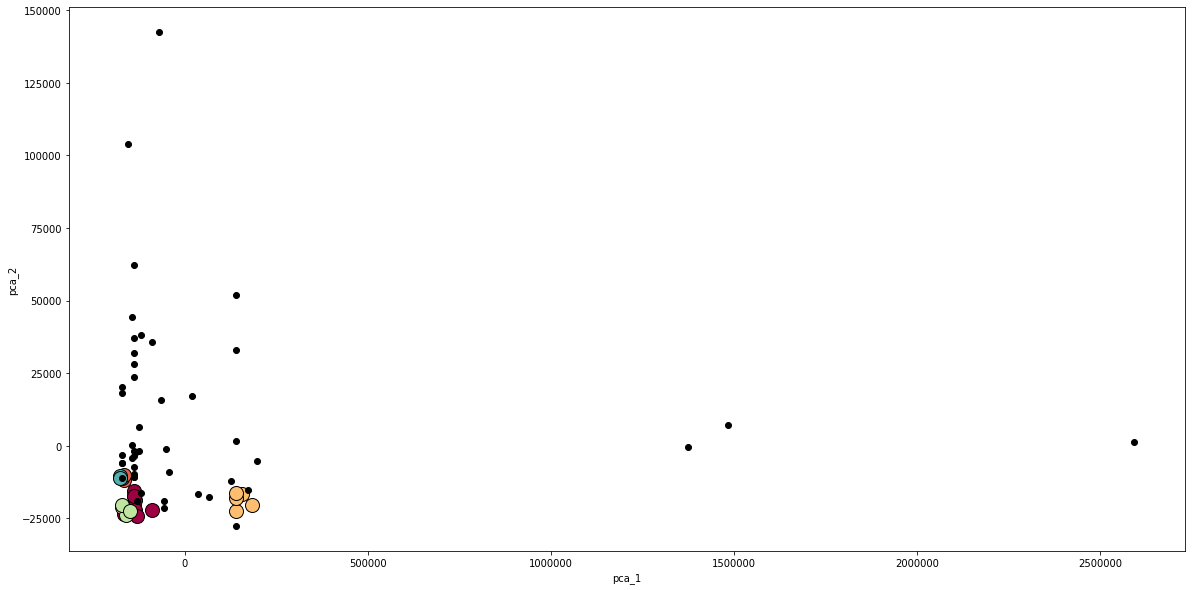

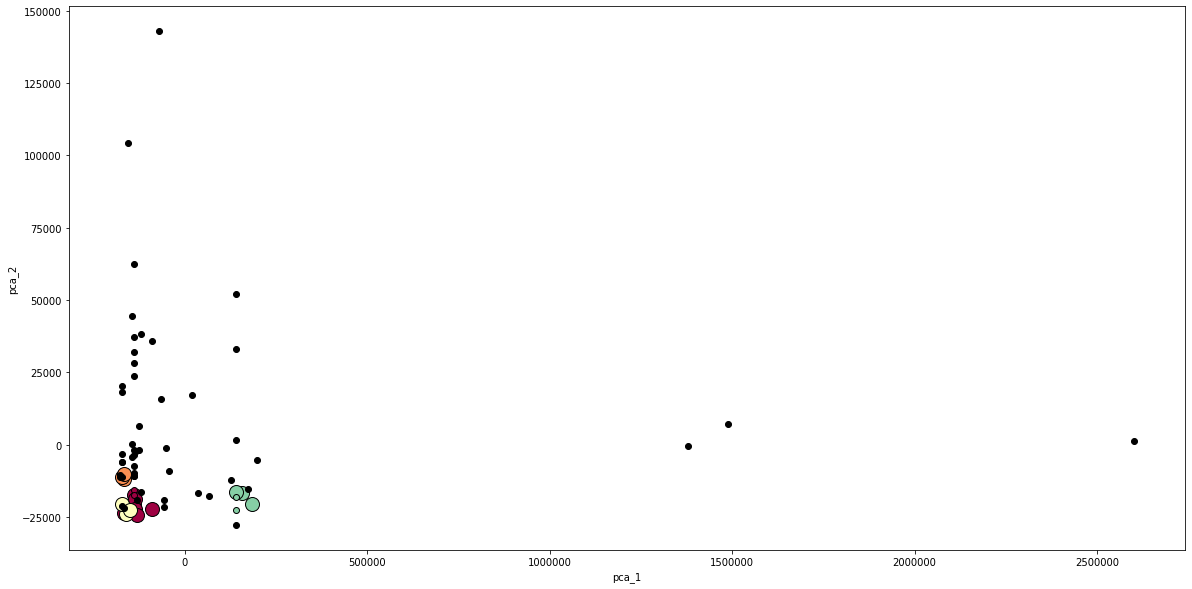

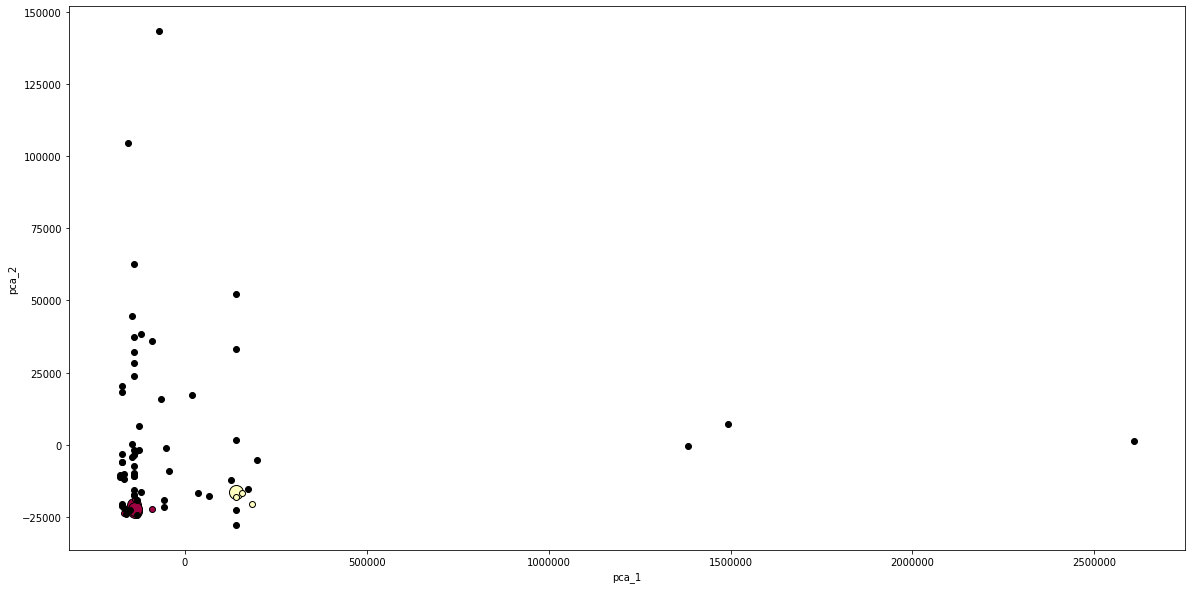

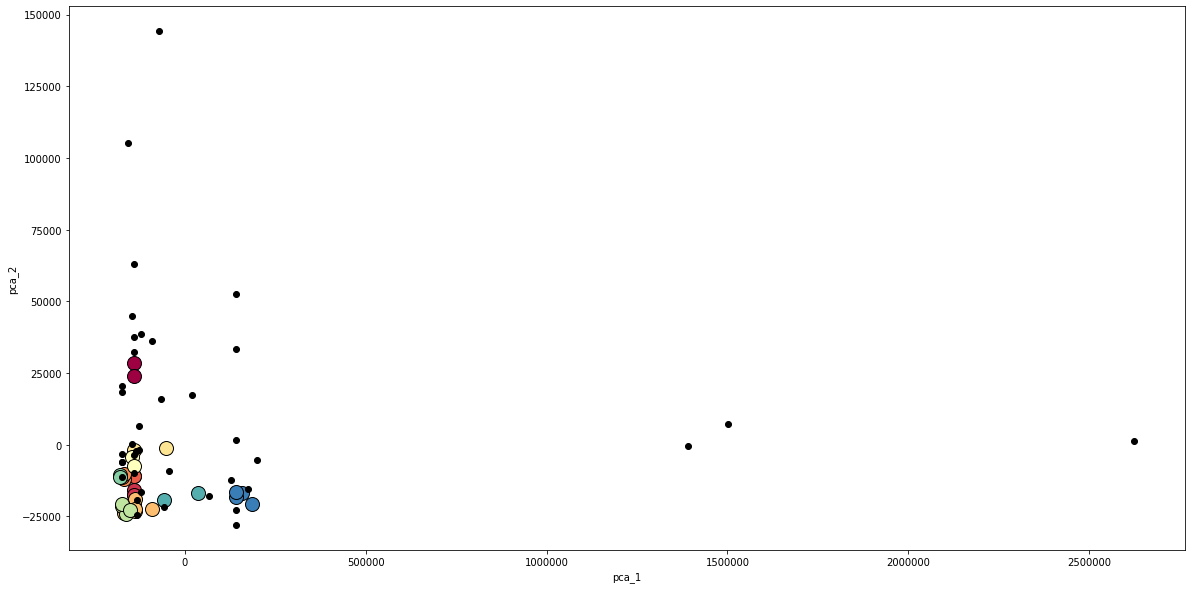

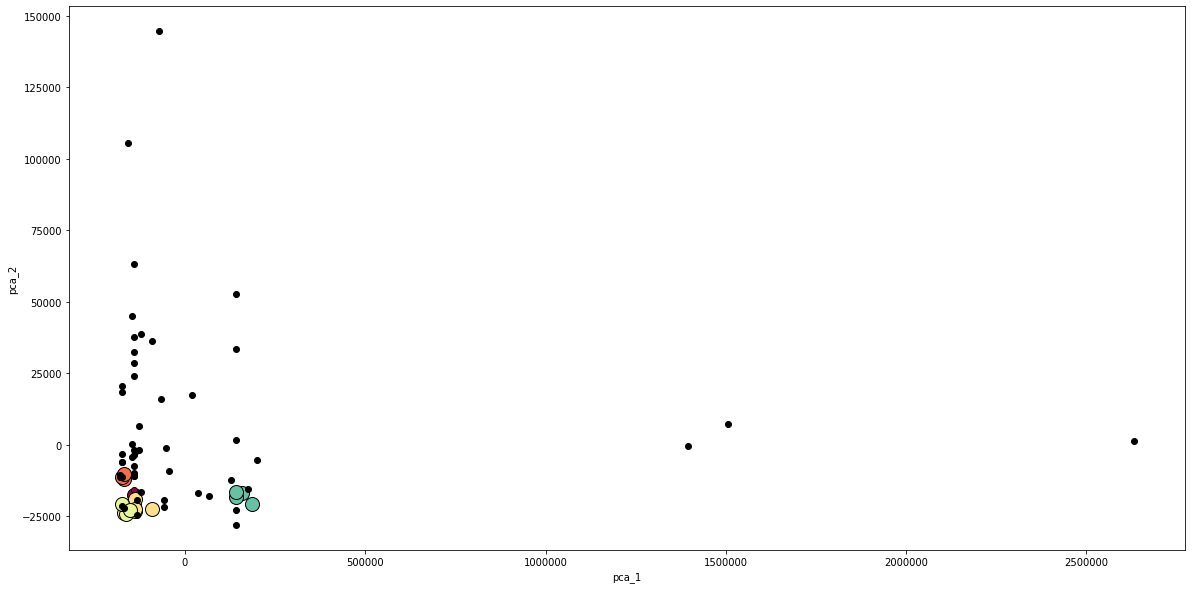

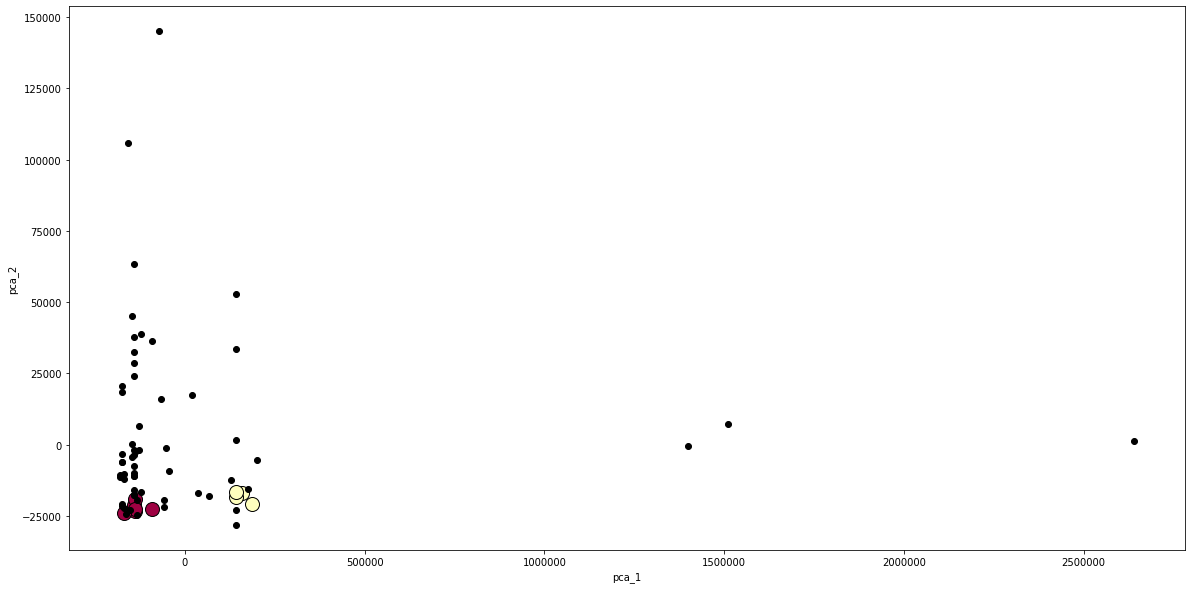

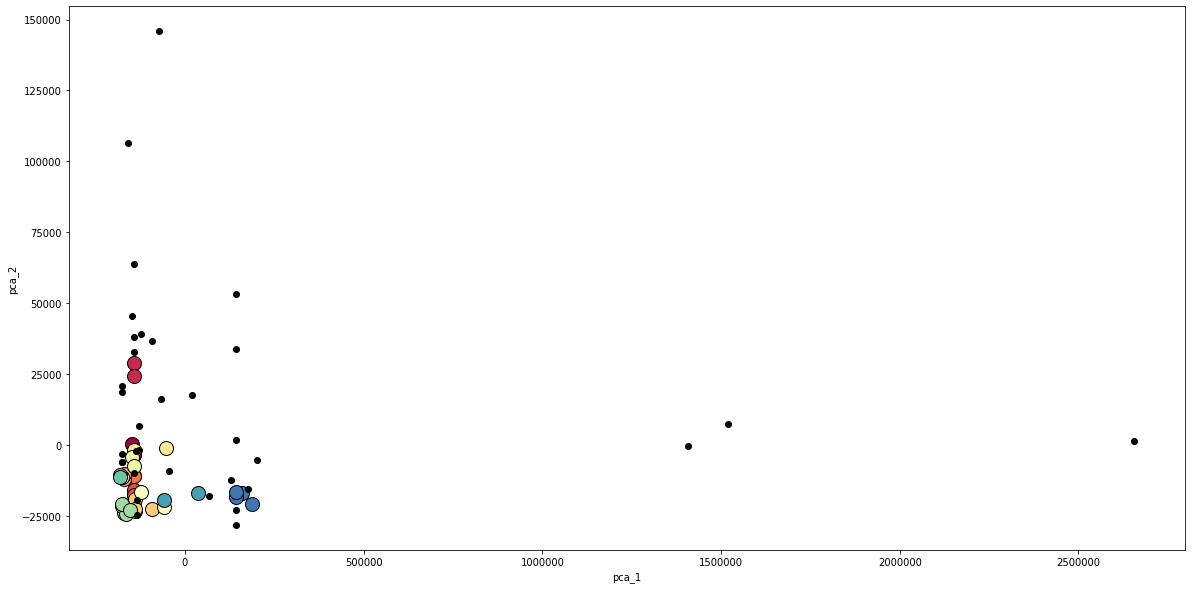

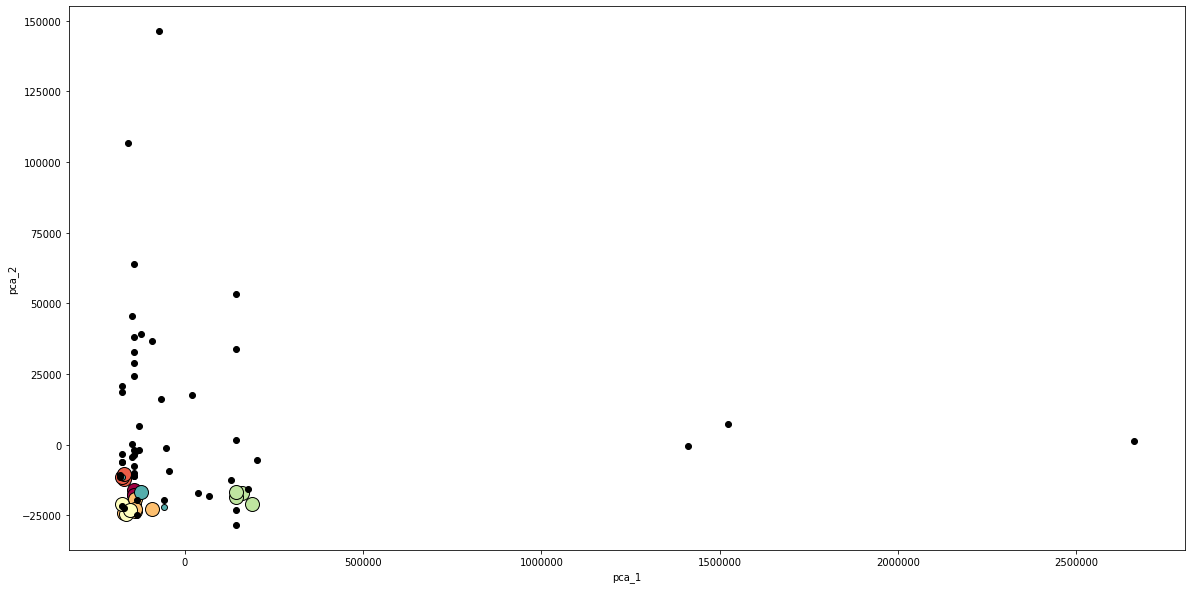

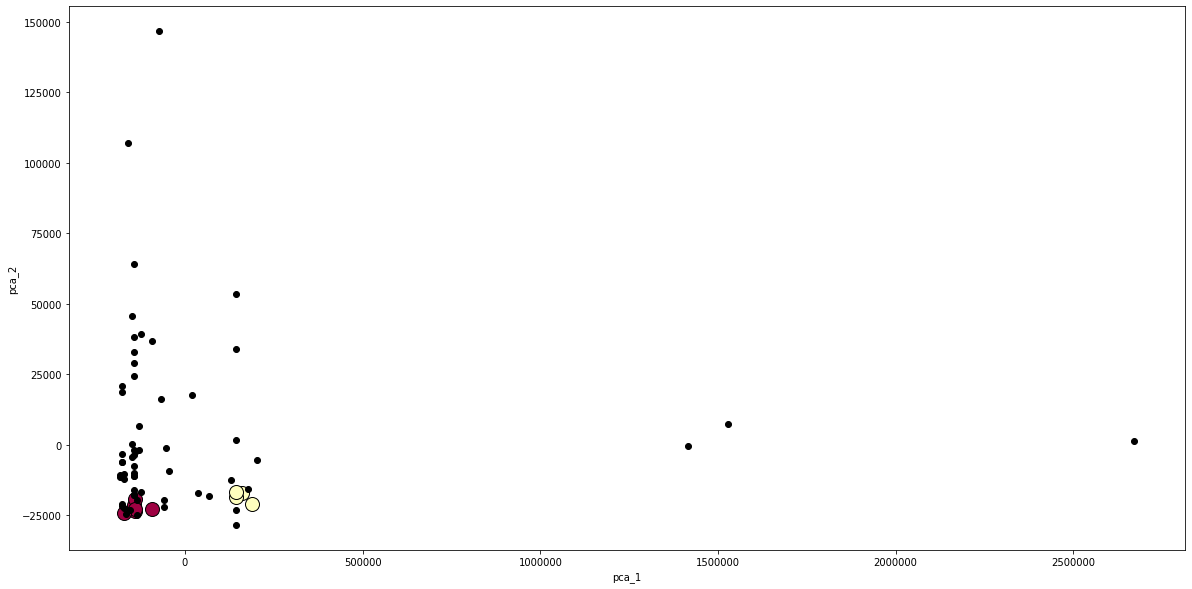

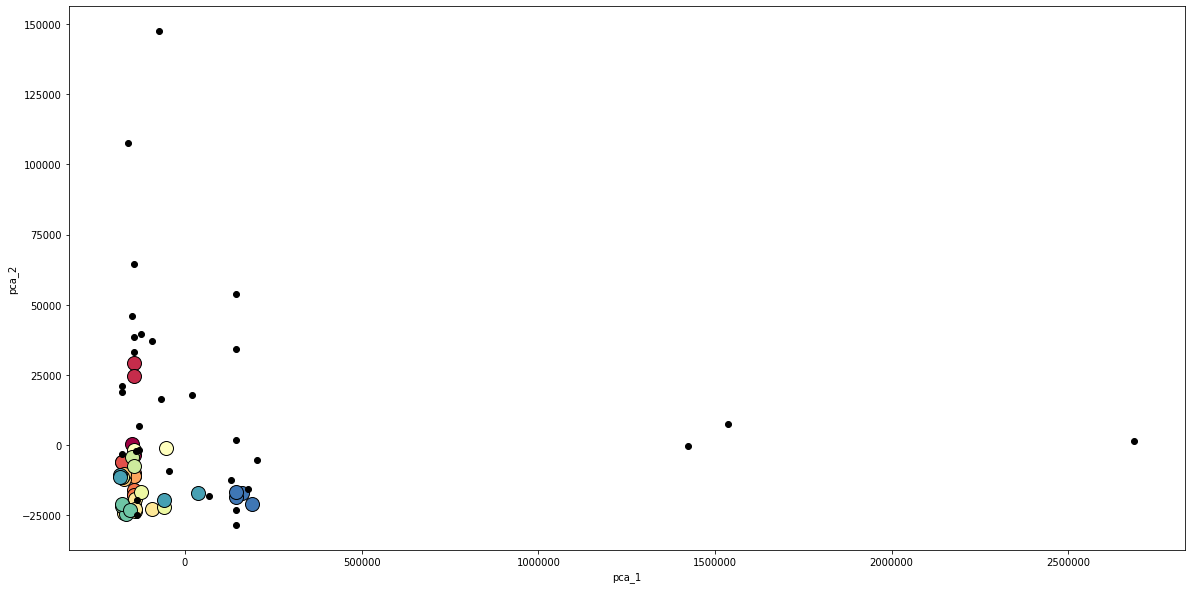

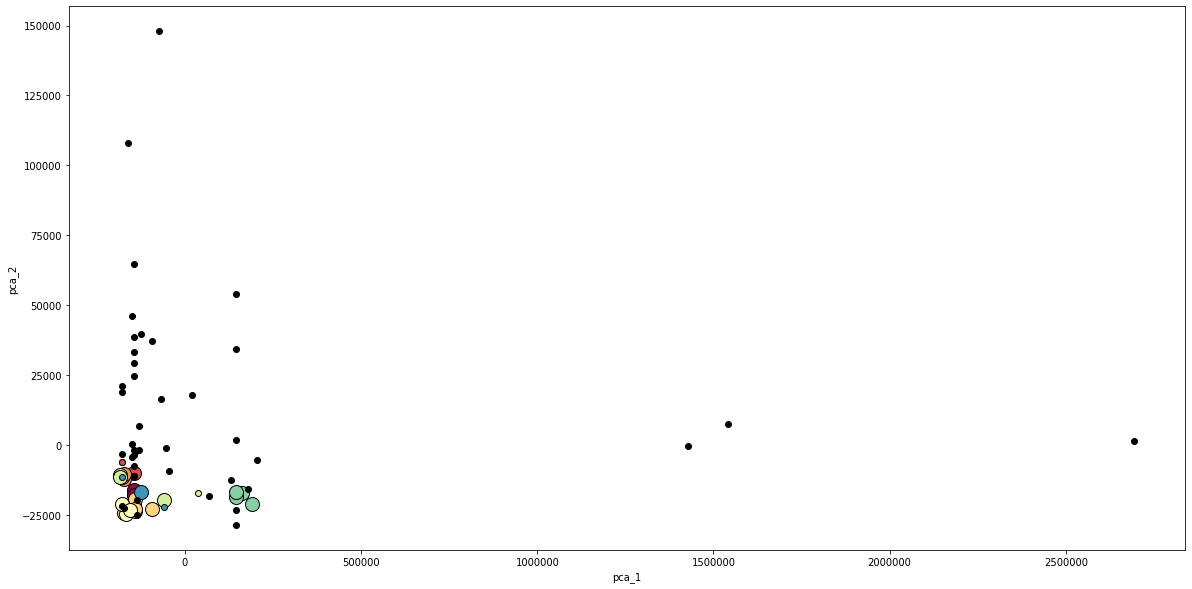

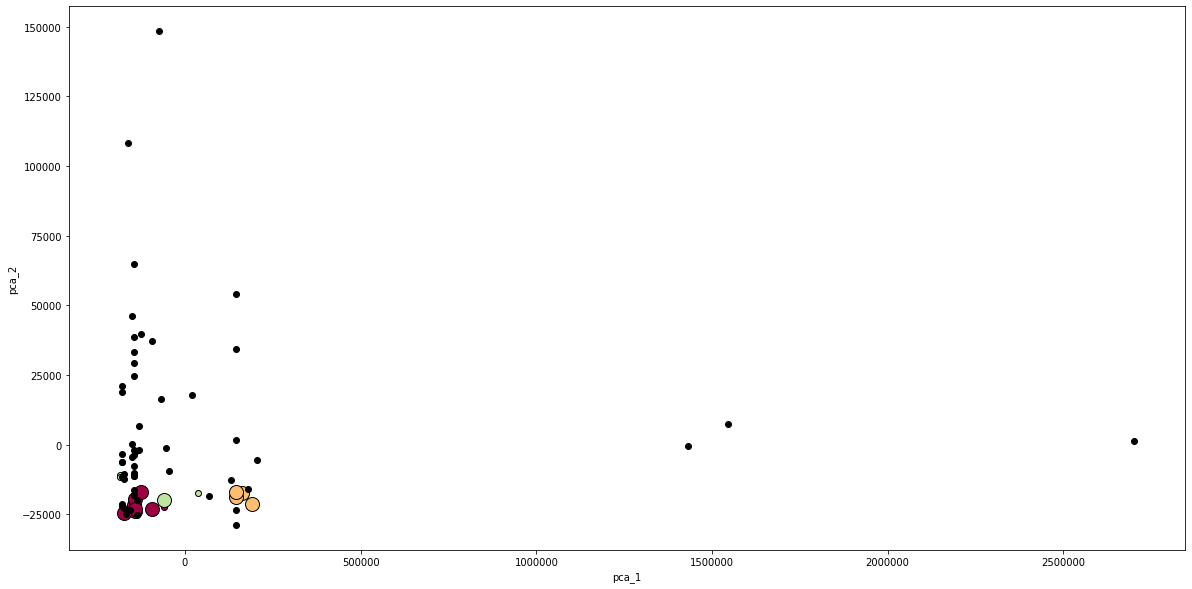

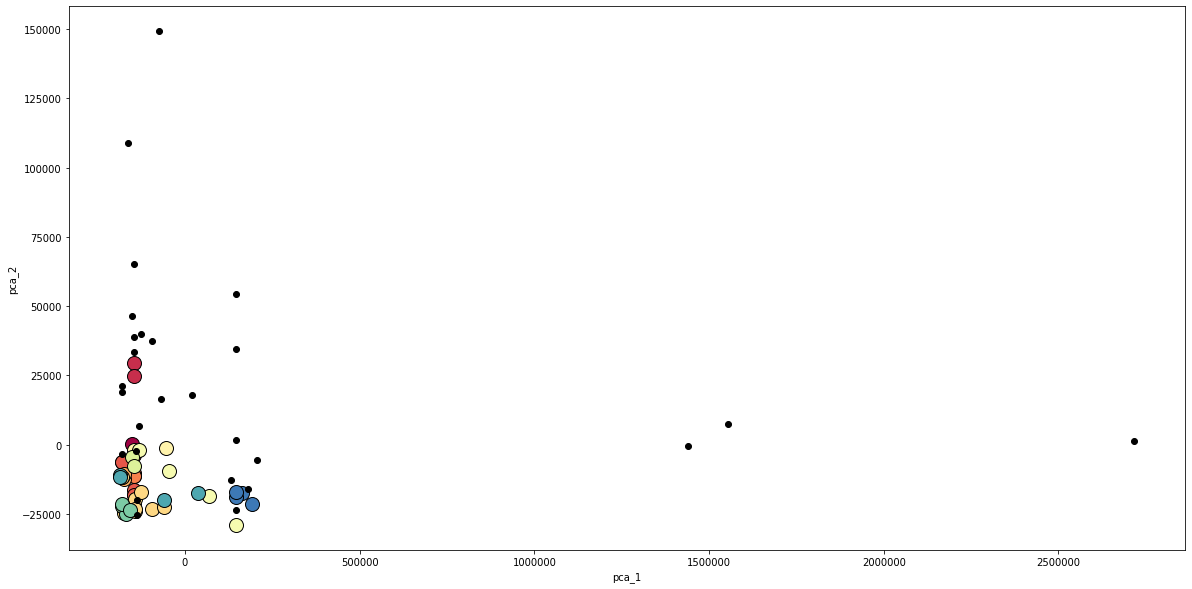

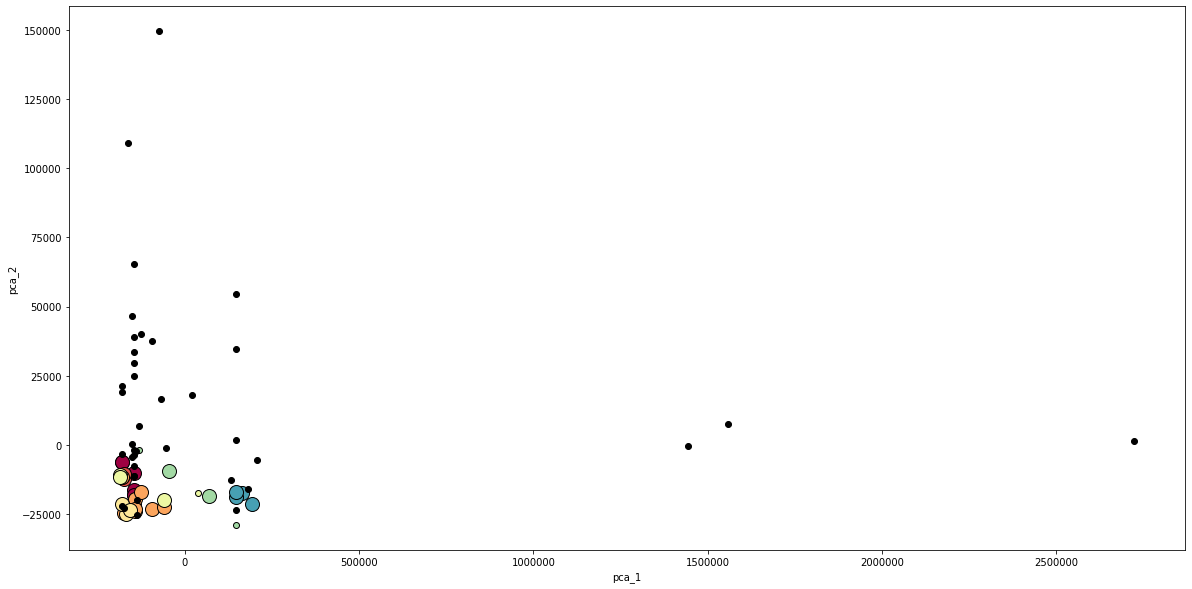

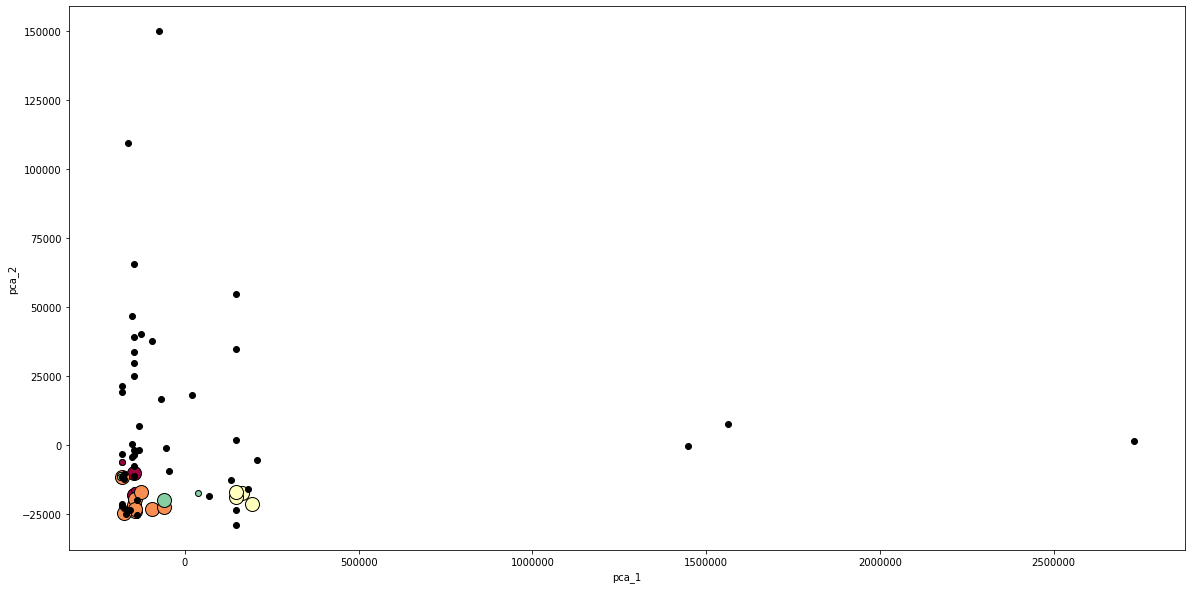

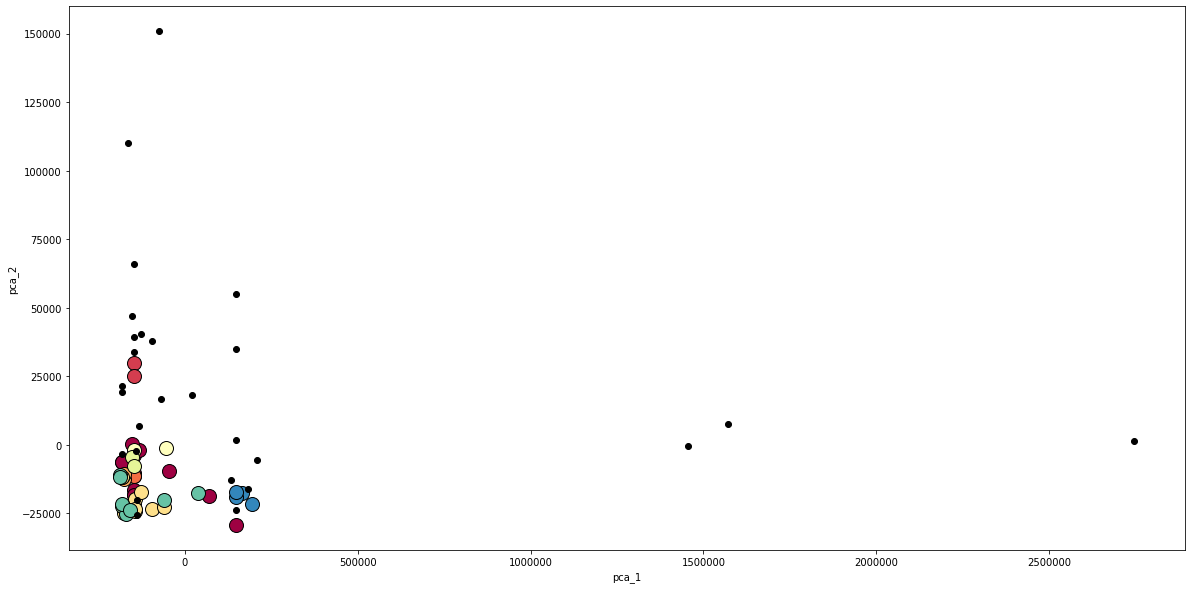

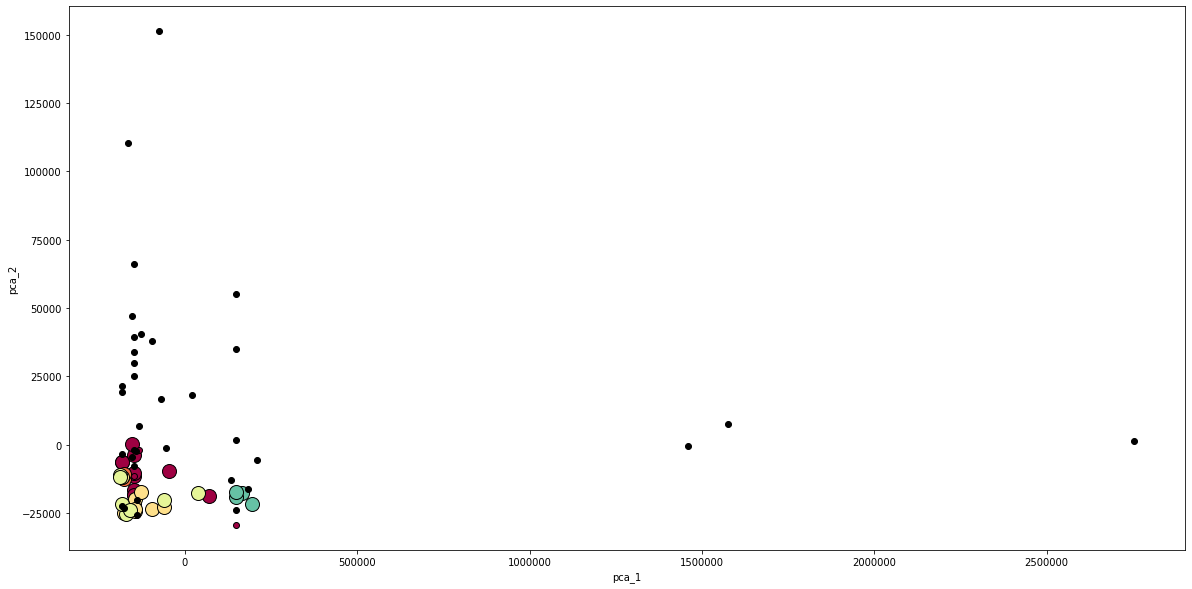

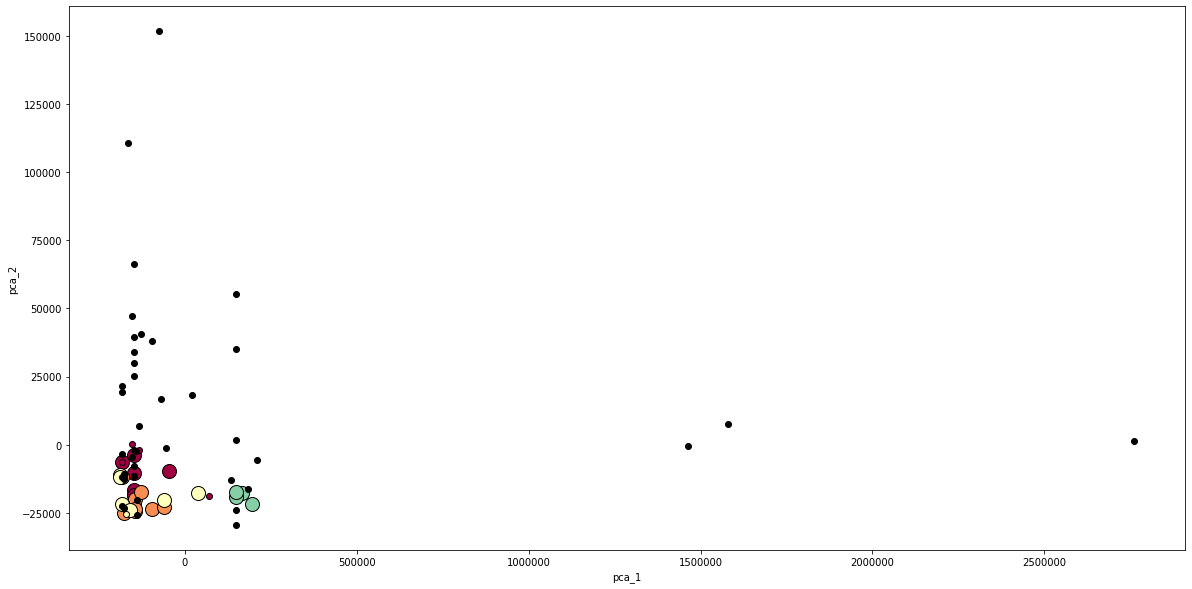

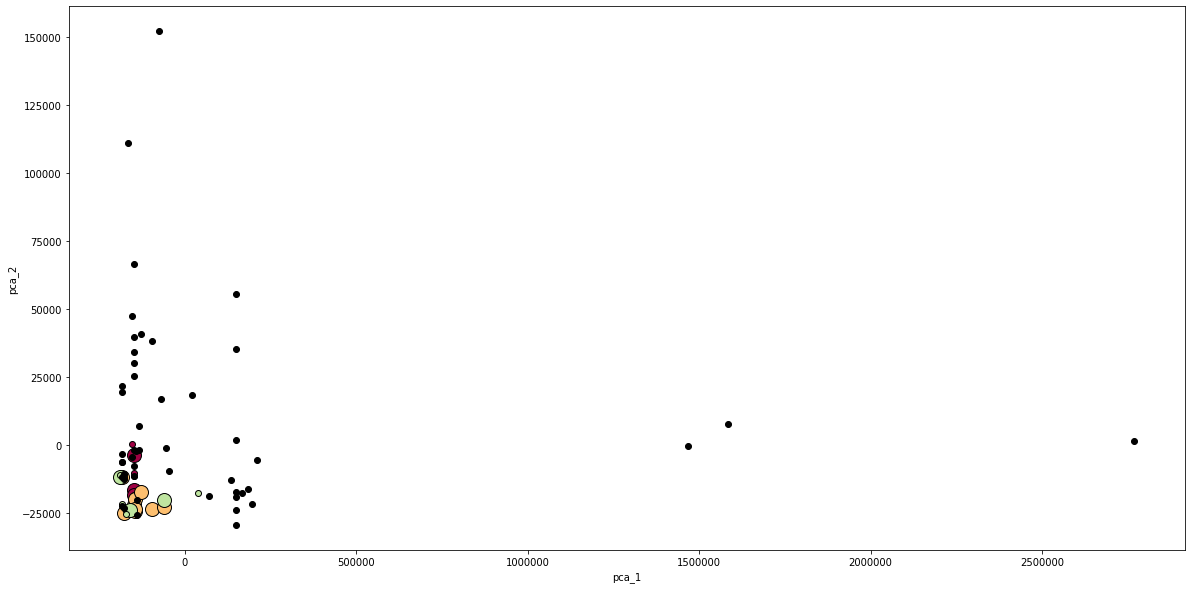

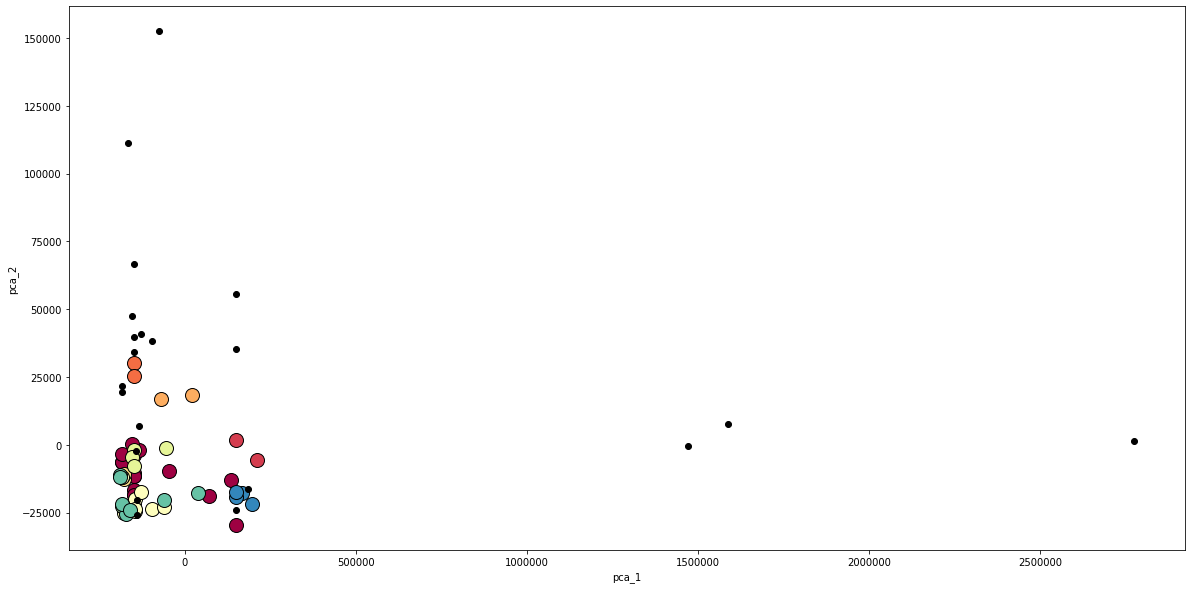

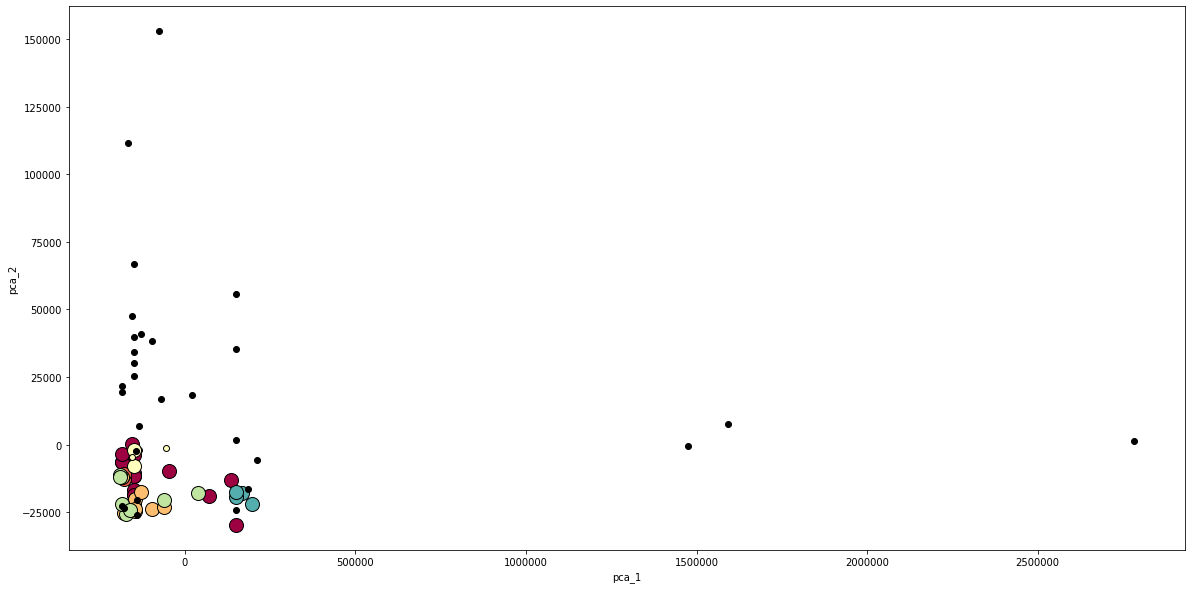

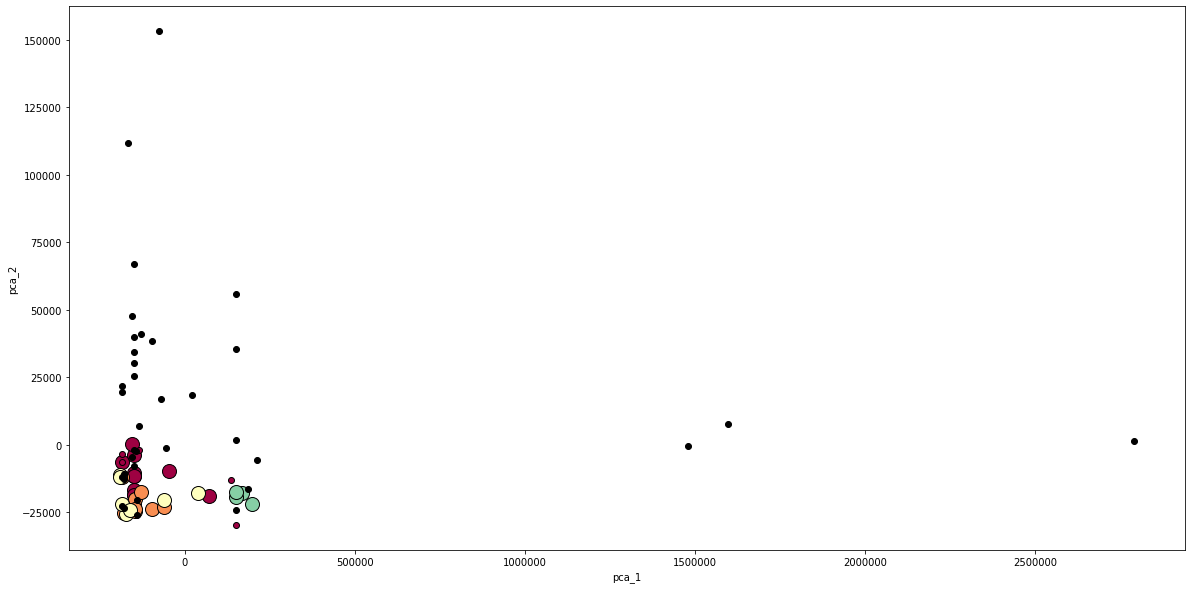

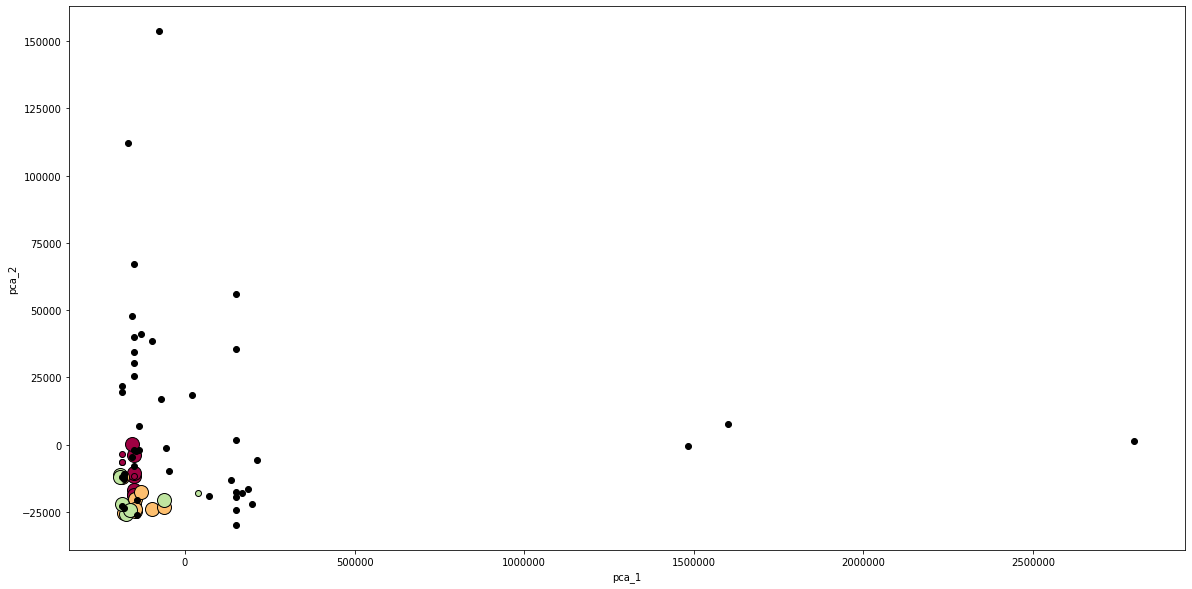

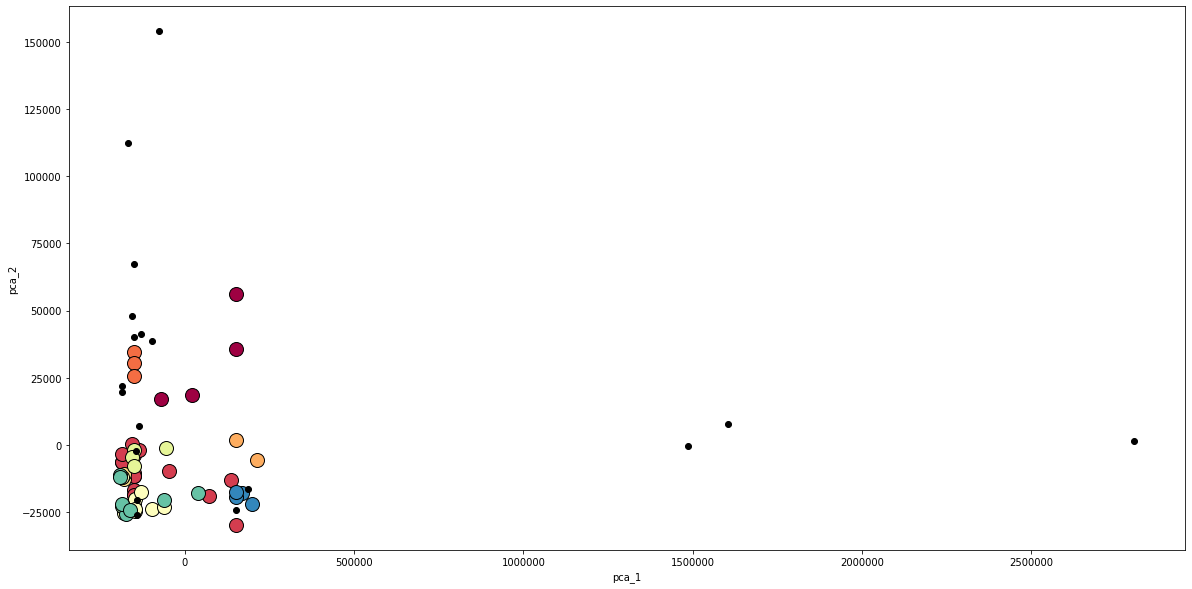

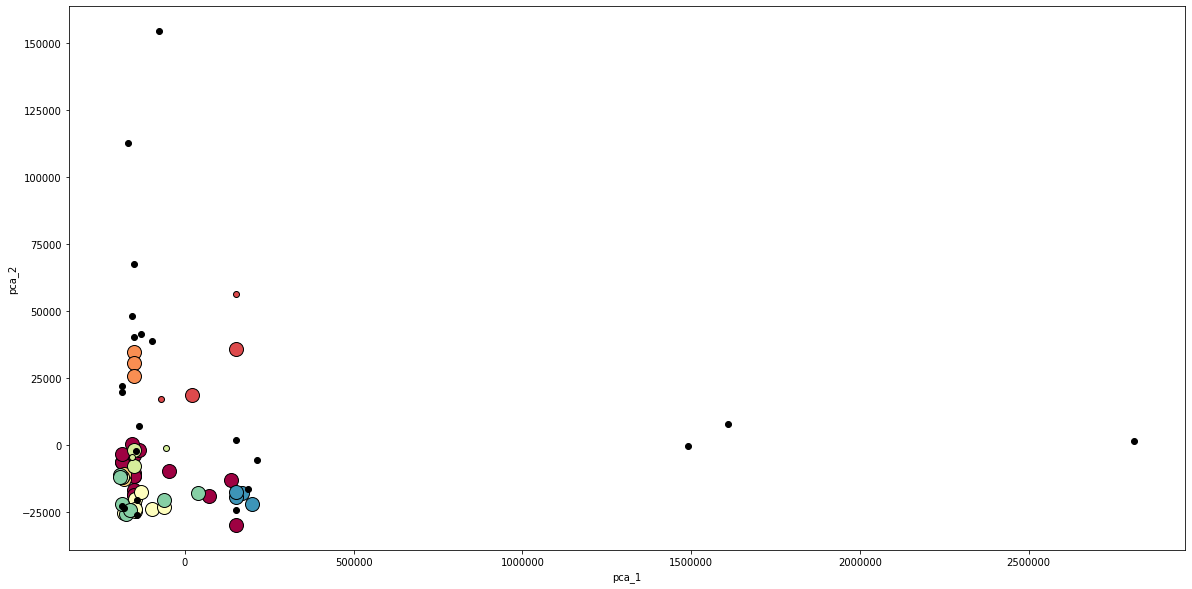

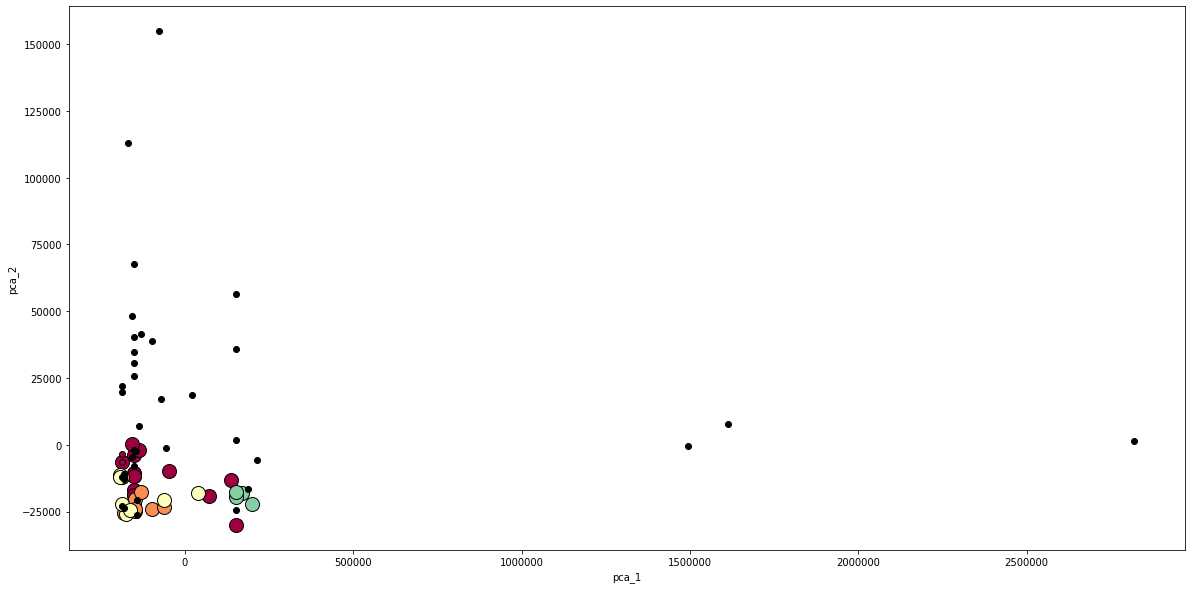

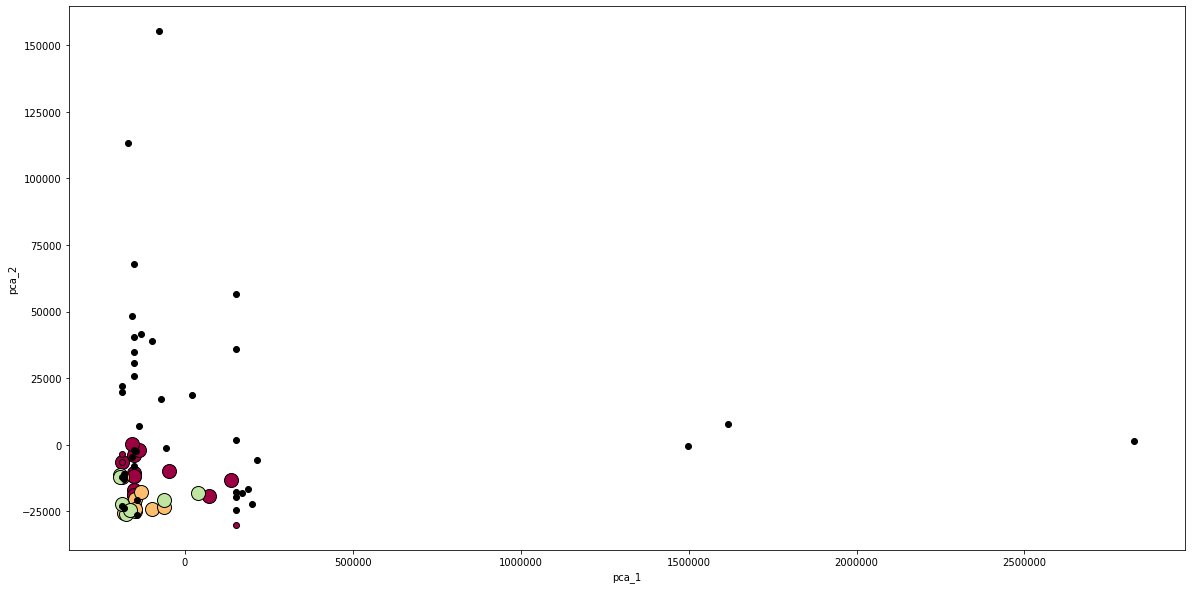

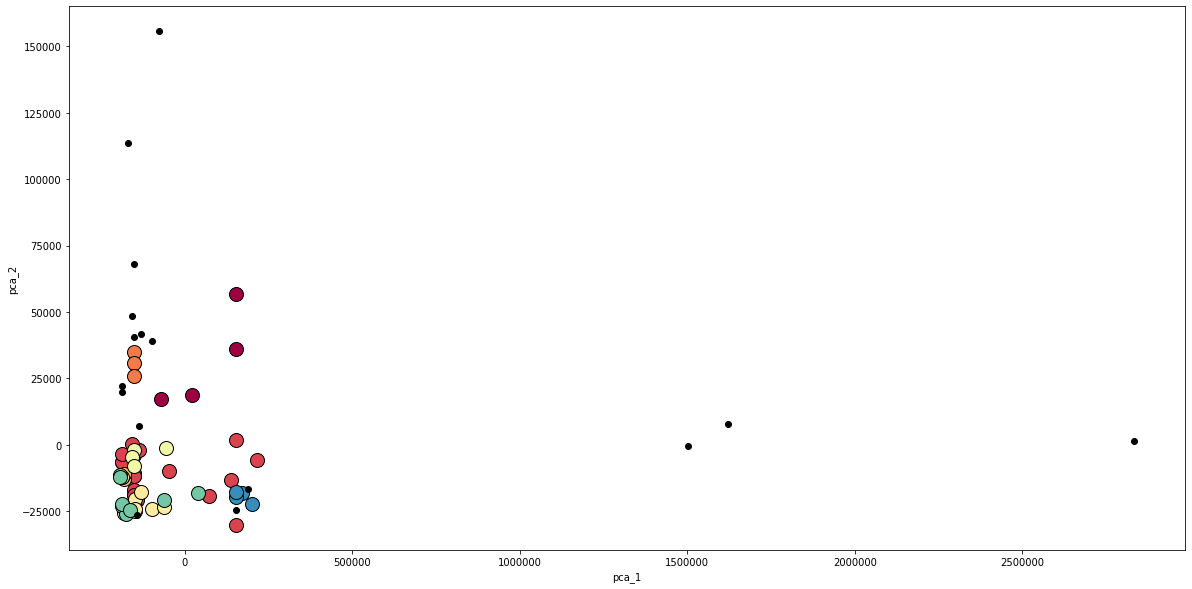

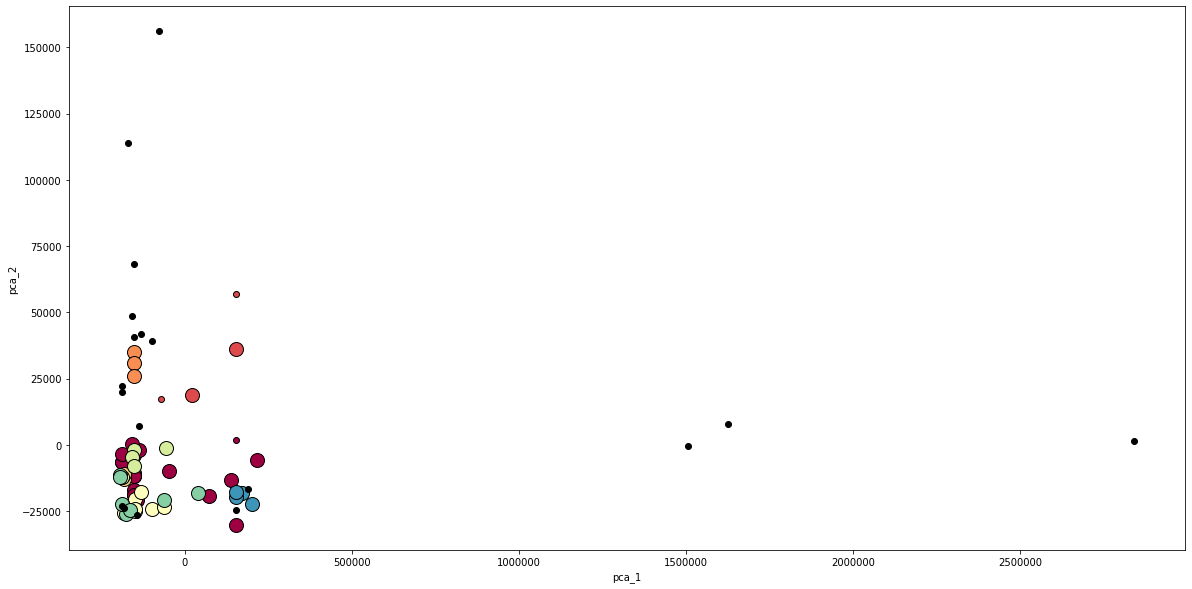

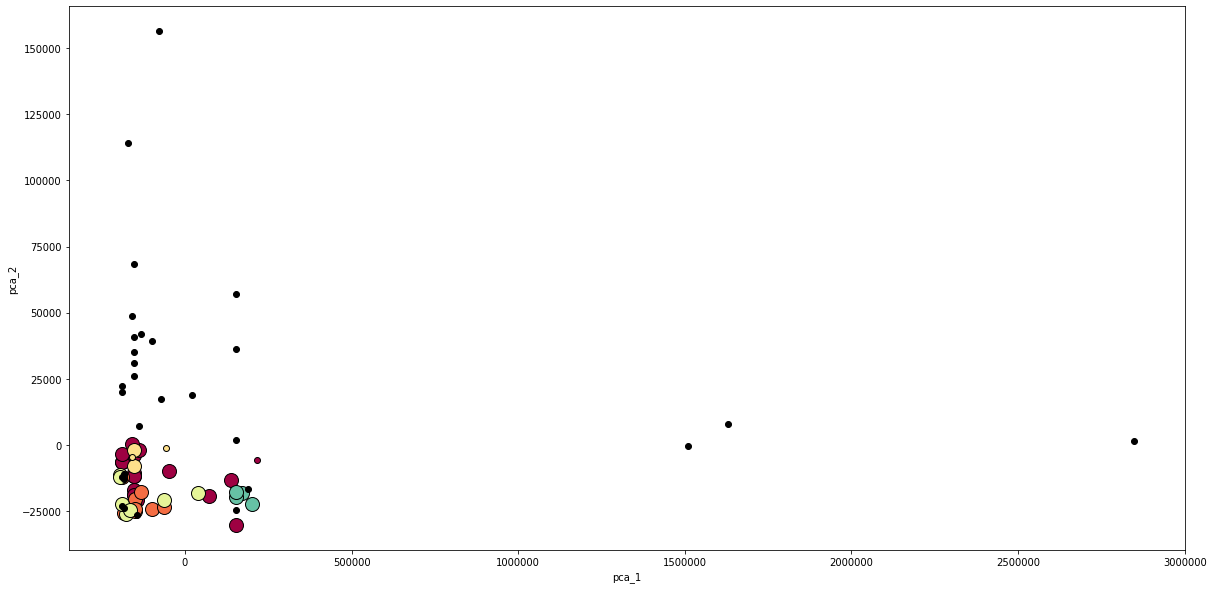

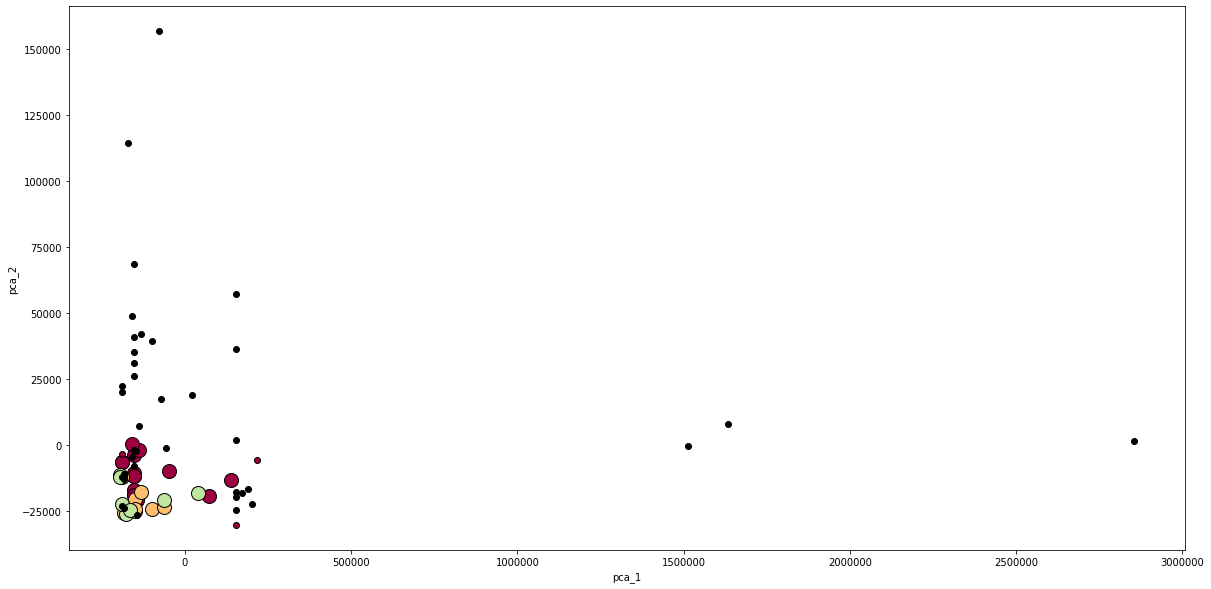

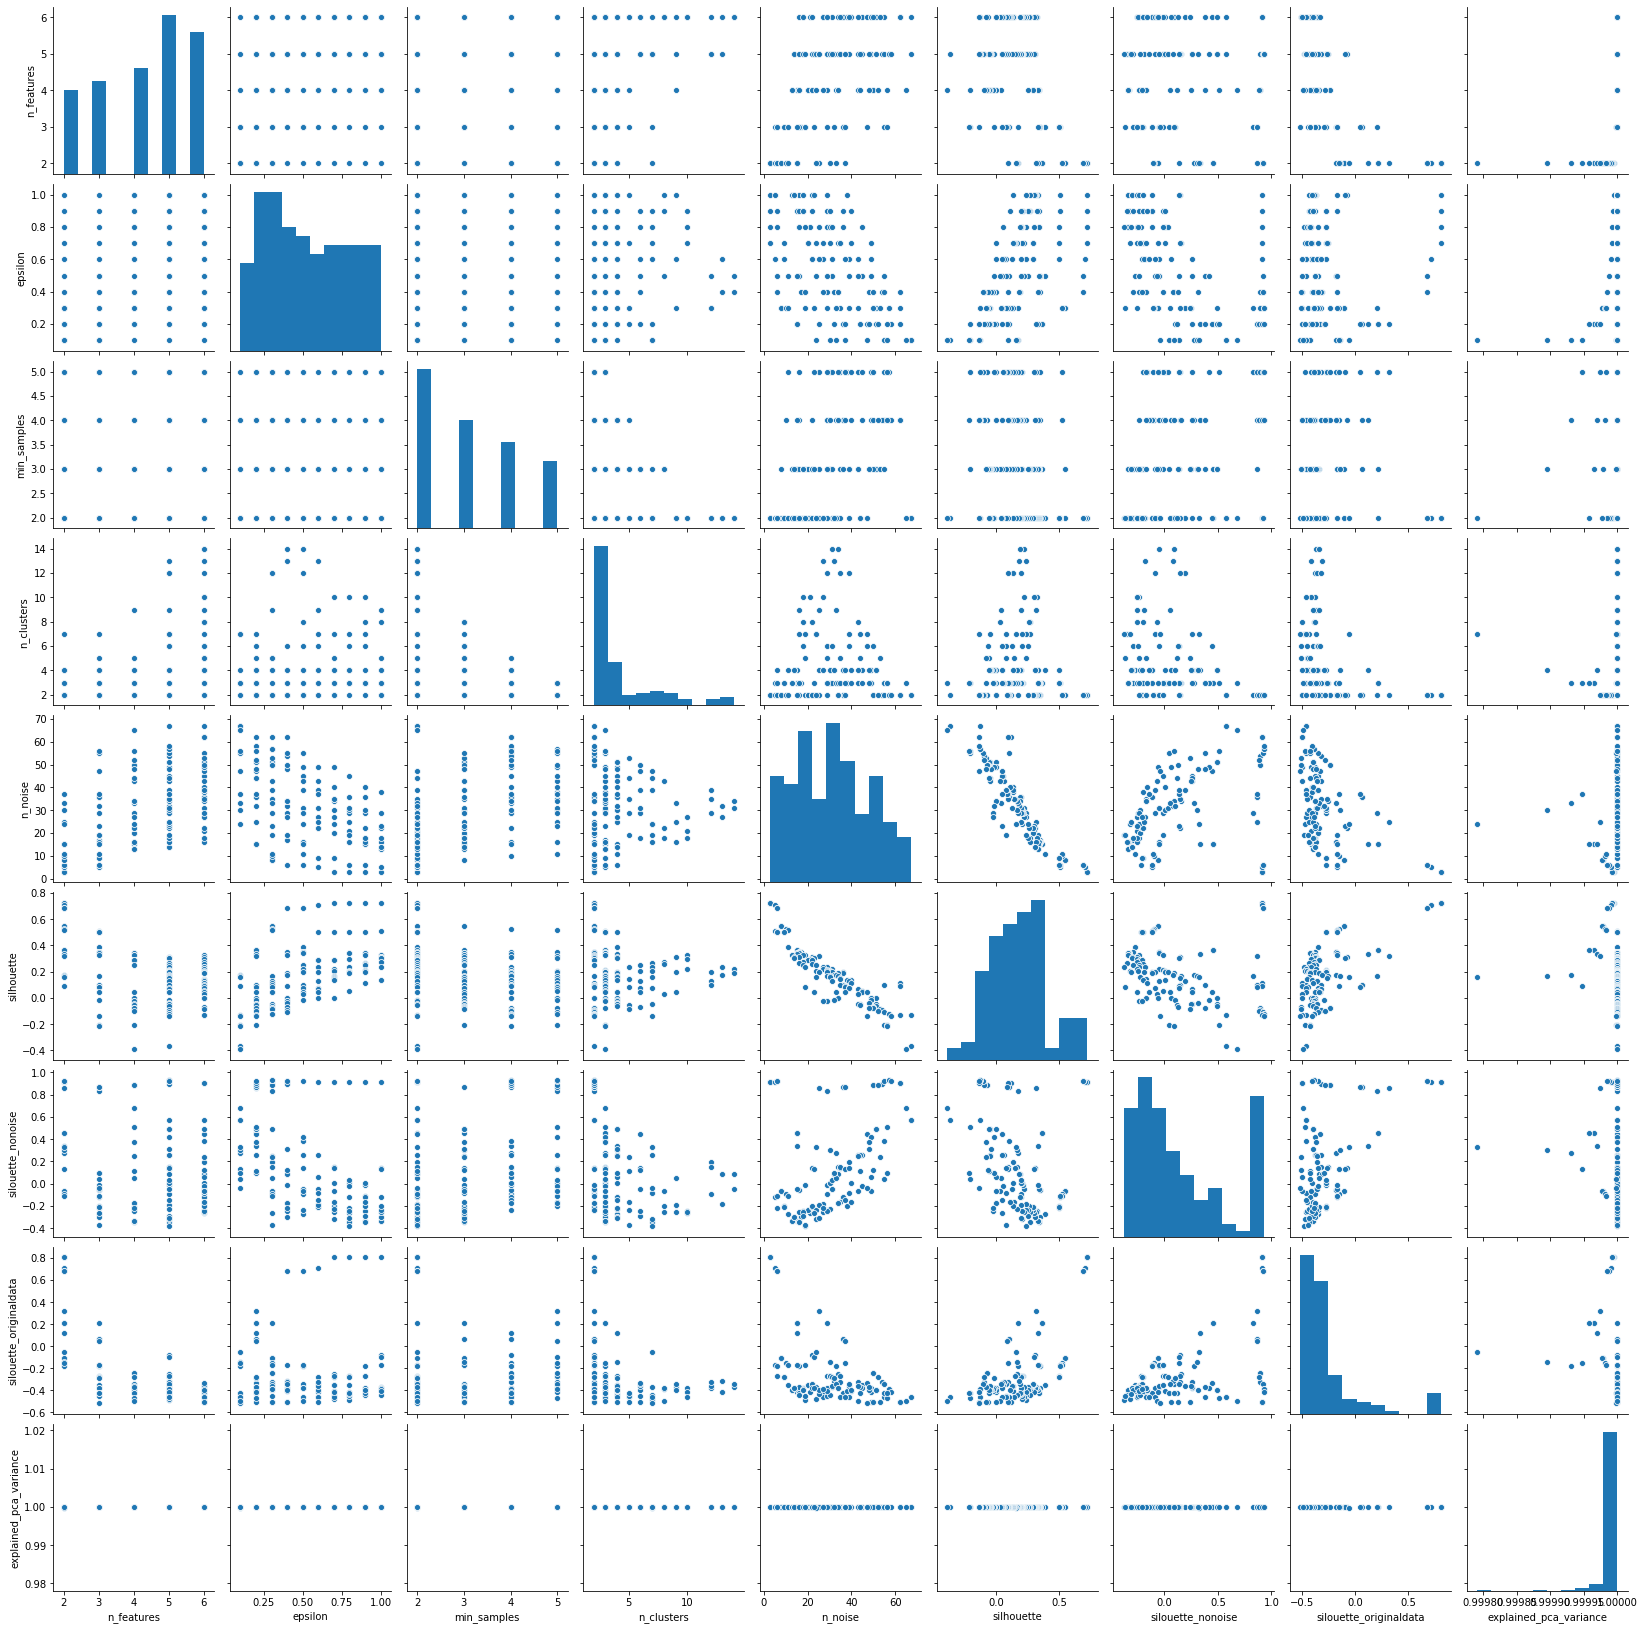

In [8]:
all_metrics = search_best(data)

In [9]:
all_metrics.loc[(all_metrics.n_clusters > 2) & (all_metrics.n_noise < 20)].sort_values(["silhouette", "silouette_nonoise"], ascending=False)

n_features  epsilon  min_samples  n_clusters  n_noise  silhouette  \
39            3      1.0            2           3        5    0.507037   
38            3      0.9            2           3        6    0.504381   
37            3      0.8            2           4        6    0.501548   
36            3      0.7            2           3        9    0.498544   
35            3      0.6            2           3        9    0.498544   
31            3      0.5            2           4       11    0.385754   
5             2      0.2            3           3       15    0.365225   
4             2      0.2            2           3       15    0.365225   
29            3      0.4            2           3       17    0.349965   
61            4      0.9            3           3       15    0.342701   
60            4      0.9            2           3       15    0.342701   
59            4      0.8            3           3       16    0.338635   
58            4      0.8            2           3       16    0.338635   
6             2      0.2            4           4       15    0.333343   
63            4      1.0            3           3       13    0.329488   
62            4      1.0            2           3       13    0.329488   
124           6      0.9            2          10       18    0.323420   
128           6      1.0            2           9       16    0.313636   
97            5      1.0            3           4       14    0.309064   
96            5      1.0            2           4       14    0.307304   
129           6      1.0            3           8       18    0.271407   
92            5      0.9            2           7       16    0.265929   
93            5      0.9            3           6       18    0.250310   
88            5      0.8            2           7       19    0.234529   
26            3      0.3            2           5       19    0.080886   

     silouette_nonoise  silouette_originaldata  explained_pca_variance  
39           -0.119710               -0.170494                0.999999  
38           -0.113055               -0.174975                0.999999  
37           -0.217427               -0.270661                0.999999  
36           -0.205384               -0.277003                0.999999  
35           -0.205723               -0.277301                0.999999  
31           -0.276560               -0.349401                0.999999  
5             0.453254                0.214315                0.999965  
4             0.453254                0.214232                0.999958  
29           -0.297918               -0.376424                0.999999  
61           -0.333376               -0.414336                1.000000  
60           -0.333384               -0.414345                1.000000  
59           -0.341577               -0.425097                1.000000  
58           -0.341586               -0.425108                1.000000  
6             0.335787                0.119736                0.999970  
63           -0.336947               -0.401487                1.000000  
62           -0.336956               -0.401496                1.000000  
124          -0.241521               -0.375039                1.000000  
128          -0.253279               -0.365571                1.000000  
97           -0.303289               -0.382204                1.000000  
96           -0.303294               -0.382209                1.000000  
129          -0.255664               -0.386553                1.000000  
92           -0.347987               -0.438598                1.000000  
93           -0.290697               -0.400391                1.000000  
88           -0.381186               -0.484659                1.000000  
26           -0.367482               -0.448168                0.999999

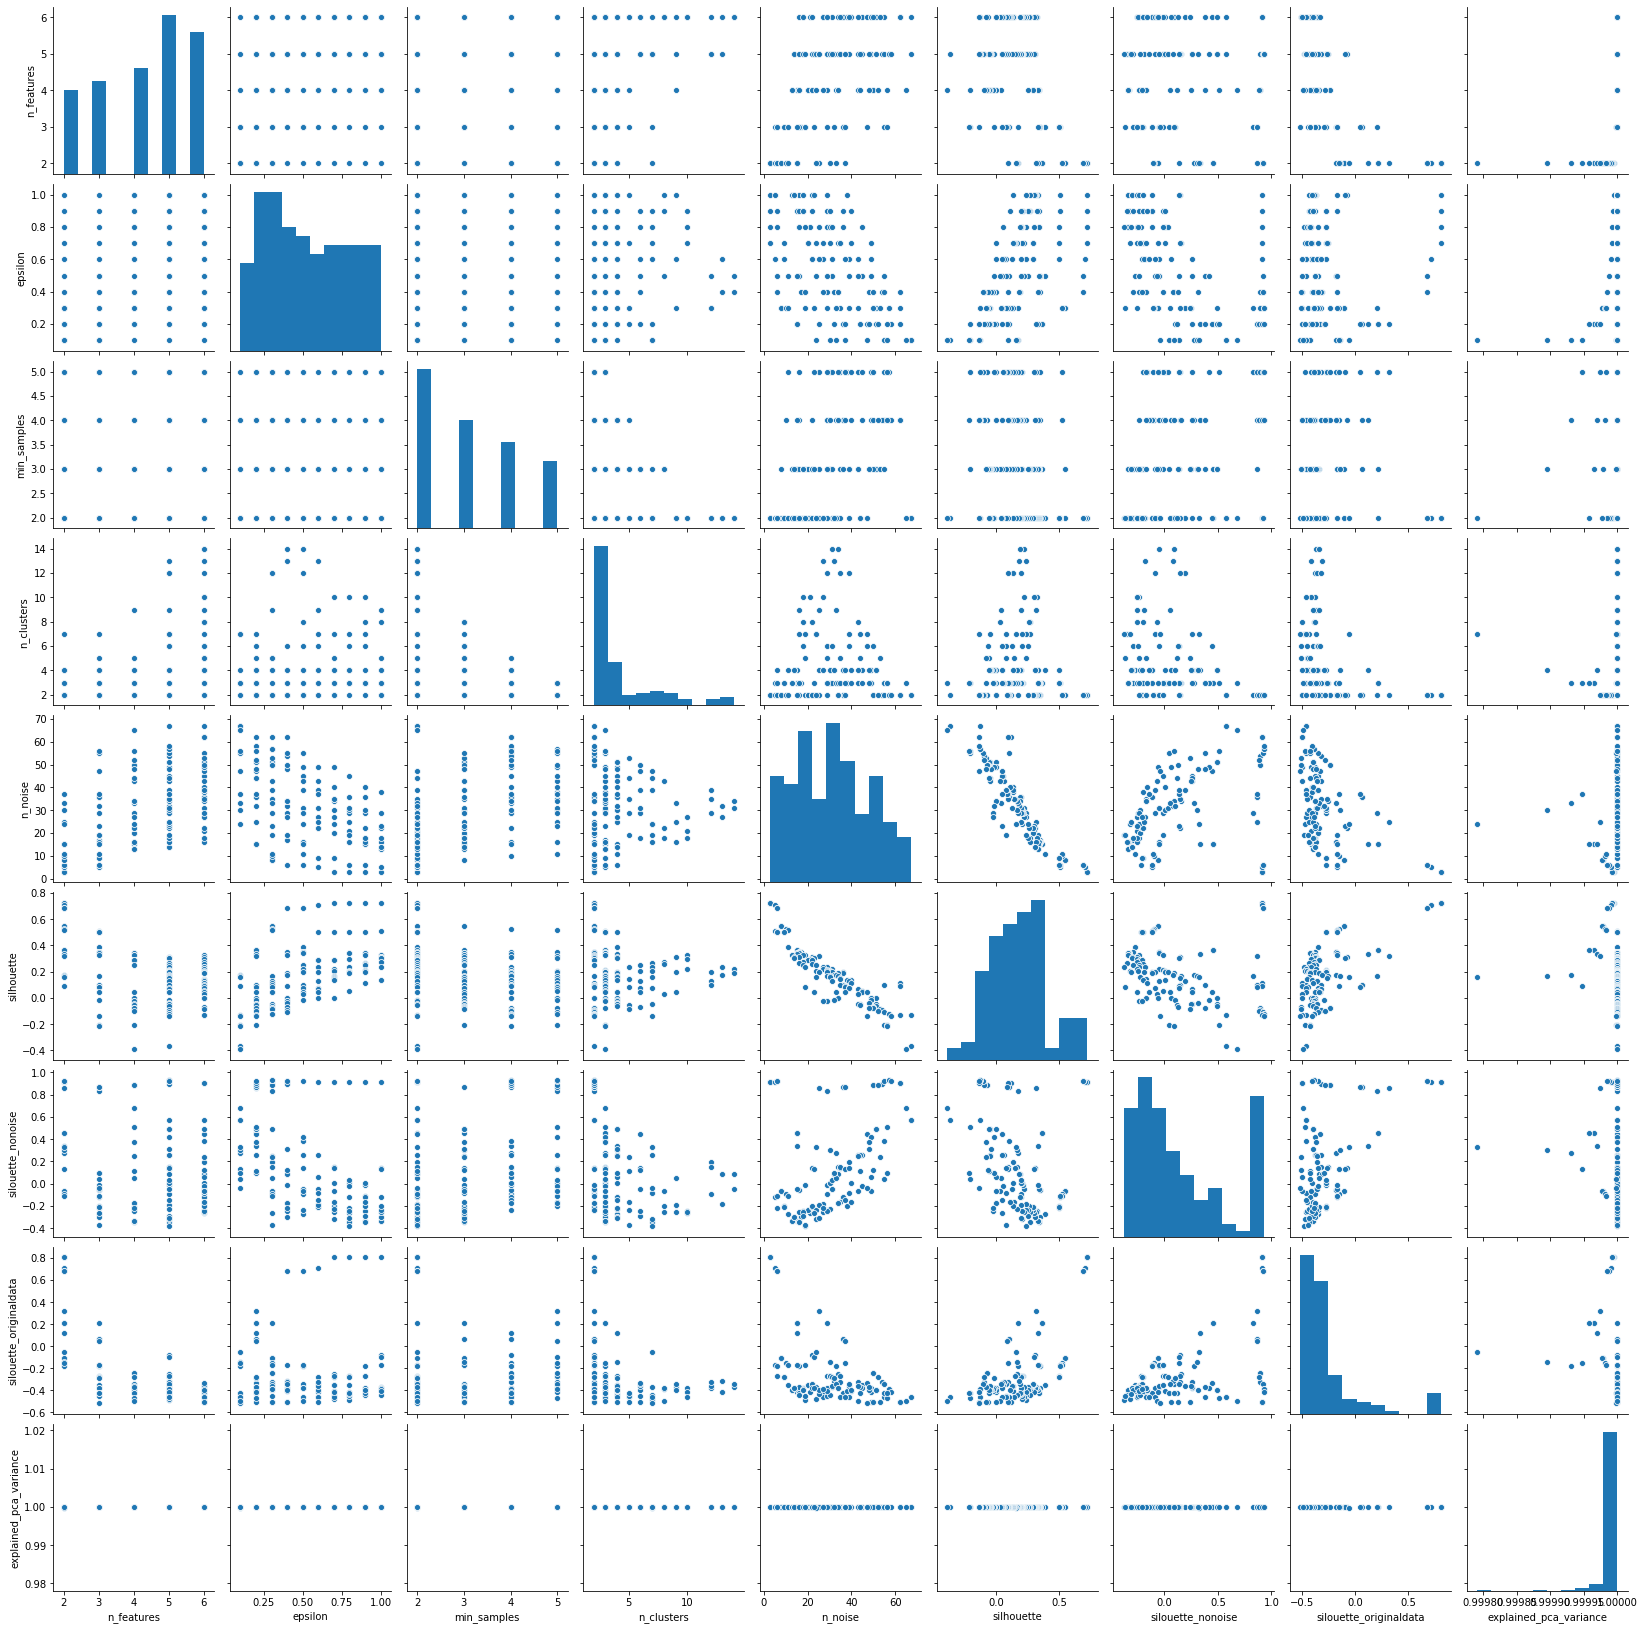

In [10]:
import seaborn as sns

sns.pairplot(all_metrics)

/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Metrics:
{'n_features': 2, 'epsilon': 0.2, 'min_samples': 3, 'n_clusters': 3, 'n_noise': 15, 'silhouette': 0.36522545485468216, 'silouette_nonoise': 0.4507131499117123, 'silouette_originaldata': 0.21325946877146018, 'explained_pca_variance': 0.999843089708745}


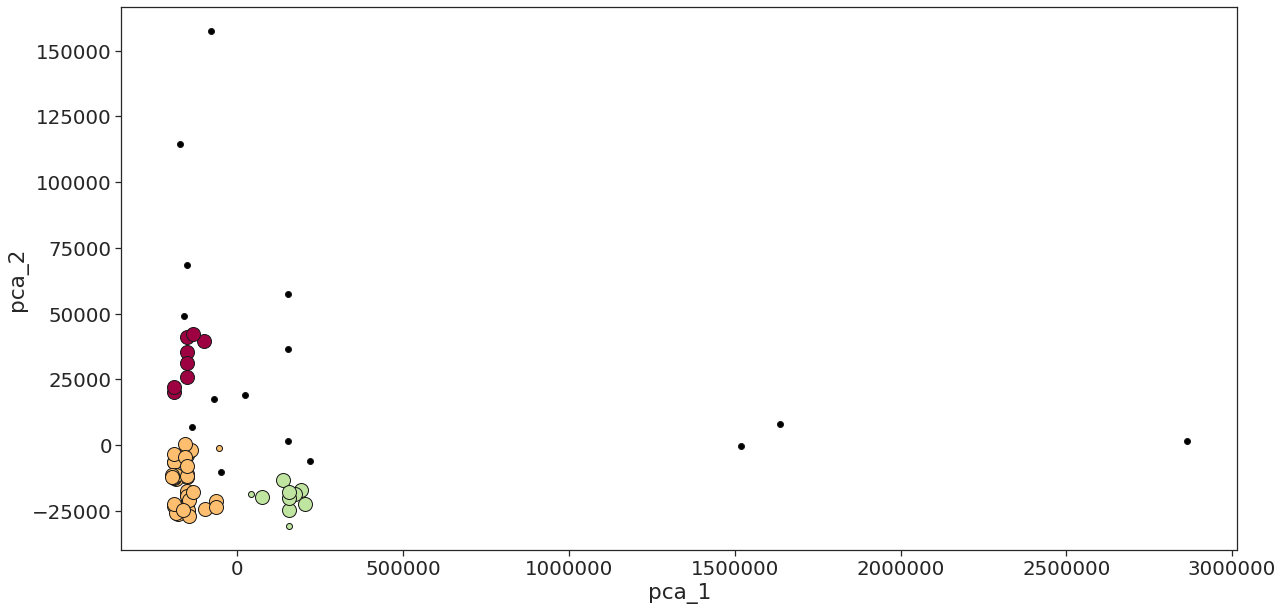

In [11]:
sns.set(style="ticks",font_scale = 1.8)
metrics, results = train_DBSCAN(data, 2, 0.2, 3)
plot_cluster(results)

In [12]:
results

intermitencia  venta_median  venta_q95  venta_iqr  venta_CV  \
producto                                                                
1         112358.744395        1889.0   12232.80    5668.00  1.480100   
10        128709.278351        1792.5    5186.75    3032.50  0.919488   
11        110867.256637        1653.0    4408.00    2204.00  1.178873   
12        107076.923077         870.0    1833.05     814.25  0.775033   
13        128709.278351        1549.0    3856.00    2442.50  0.875646   
...                 ...           ...        ...        ...       ...   
95        319792.207792           0.0     376.35       3.75  2.510755   
96        104400.000000         274.5     720.55     418.25  0.878619   
97        123002.955665         268.0     737.35     433.25  0.930844   
98        106169.491525         272.0     545.80     349.25  0.861580   
99        224951.351351           0.0    1173.15     387.25  2.706029   

                 pca_1          pca_2  labels  core_samples  \
producto                                                      
1        -7.954550e+04  157313.965408      -1         False   
10        1.532061e+05   57292.773880      -1         False   
11       -9.957776e+04   39637.426089       0          True   
12       -1.528660e+05   -3819.521928       1          True   
13        1.534132e+05   36516.606342      -1         False   
...                ...            ...     ...           ...   
95        2.863002e+06    1474.741741      -1         False   
96       -1.906148e+05  -22536.942920       1          True   
97        7.310923e+04  -19523.056497       2          True   
98       -1.655055e+05  -24838.453913       1          True   
99        1.518369e+06    -465.196775      -1         False   

          class_member_mask         pca_3        pca_4      pca_5     pca_6  
producto                                                                     
1                      True  25715.971734 -6021.847437   9.196262 -0.499862  
10                     True   1453.575951  4775.130373  -1.920346 -0.672241  
11                    False   -464.214500   294.001022  -6.647331 -0.215360  
12                    False  -1188.220131 -1052.178151 -10.410562  0.337974  
13                     True   -560.725509  5565.630932  -6.071709 -0.646039  
...                     ...           ...          ...        ...       ...  
95                     True  -5499.760738  1103.941101   6.218035  1.368650  
96                    False   2255.552739   -43.510138  20.653202  2.724404  
97                    False   1641.779727   329.434506 -12.524838  0.314263  
98                    False   1587.218177   212.949555  20.554716  2.702914  
99                     True   1516.801251  -929.598392  -6.476173  0.827124  

[72 rows x 14 columns]

In [13]:
results.loc[results.labels == 0].index

Index(['11', '14', '17', '18', '19', '24', '5', '9'], dtype='object', name='producto')

In [14]:
results.loc[results.labels == 1].index

Index(['12', '21', '22', '26', '30', '31', '32', '35', '36', '38', '40', '42',
       '43', '45', '46', '48', '49', '50', '52', '53', '55', '59', '60', '61',
       '62', '63', '64', '66', '67', '68', '69', '72', '77', '79', '84', '87',
       '94', '96', '98'],
      dtype='object', name='producto')

In [15]:
results.loc[results.labels == 2].index

Index(['37', '57', '58', '73', '78', '85', '88', '89', '91', '97'], dtype='object', name='producto')